# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1945: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]

In [3]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = regions
)


2023-02-08 01:24:18,913 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-02-08 01:24:18,914 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-02-08 01:24:18,915 - INFO - 	Setting export engine to 'sqlite'.
2023-02-08 01:24:18,934 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-02-08 01:24:18,935 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-02-08 01:24:18,937 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-02-08 01:24:18,938 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-02-08 01:24:18,940 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-02-08 01:24:18,941 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-02-08 01:24:18,944 - WARNING - No index

###  Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [4]:
#sisepuede.attribute_strategy.table


In [4]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0] + list(range(3001, 3025)) + [3027]
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2023-02-08 01:36:38,889 - INFO - Running AFOLU model
2023-02-08 01:36:39,146 - INFO - AFOLU model run successfully completed
2023-02-08 01:36:39,147 - INFO - Running CircularEconomy model
2023-02-08 01:36:39,234 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:36:39,235 - INFO - Running IPPU model
2023-02-08 01:36:39,323 - INFO - IPPU model run successfully completed
2023-02-08 01:36:39,324 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:36:39,355 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:36:39,472 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:36:39,473 - INFO - Running Energy model (Electricity: trying to call Julia)


2023-08-Feb 01:37:10.720 Started modeling scenario.
2023-08-Feb 01:37:43.067 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-08 01:37:43,285 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-08 01:37:43,312 - INFO - ElectricEnergy model run successfully completed
2023-02-08 01:37:43,394 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:37:43,398 - INFO - Model run for primary_id = 0 successfully completed in 64.51 seconds.
2023-02-08 01:37:43,412 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-08 01:37:43,680 - INFO - AFOLU model run successfully completed
2023-02-08 01:37:43,681 - INFO - Running CircularEconomy model
2023-02-08 01:37:43,762 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:37:43,762 - INFO - Running IPPU model
2023-02-08 01:37:43,843 - INFO - IPPU model run successfully completed
2023-02-08 01:37:43,843 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:37:43,873 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:37:43,985 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:37:43,986 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-08-Feb 01:37:44.963 Started modeling scenario.
2023-08-Feb 01:37:56.155 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:37:56,384 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:37:56,388 - INFO - Model run for primary_id = 5005 successfully completed in 12.98 seconds.
2023-02-08 01:37:56,818 - INFO - Table MODEL_OUTPUT successfully written to database.
2023-02-08 01:37:56,822 - INFO - Running AFOLU model
2023-02-08 01:37:57,060 - INFO - AFOLU model run successfully completed
2023-02-08 01:37:57,061 - INFO - Running CircularEconomy model
2023-02-08 01:37:57,141 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:37:57,142 - INFO - Running IPPU model
2023-02-08 01:37:57,238 - INFO - IPPU model run successfully completed
2023-02-08 01:37:57,239 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:37:57,270 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:37:57,390 - INFO - NonElectricEnergy without F

2023-08-Feb 01:37:58.322 Started modeling scenario.
2023-08-Feb 01:38:09.283 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:38:09,520 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:38:09,525 - INFO - Model run for primary_id = 6006 successfully completed in 12.7 seconds.
2023-02-08 01:38:09,531 - INFO - Running AFOLU model
2023-02-08 01:38:09,781 - INFO - AFOLU model run successfully completed
2023-02-08 01:38:09,782 - INFO - Running CircularEconomy model
2023-02-08 01:38:09,870 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:38:09,875 - INFO - Running IPPU model
2023-02-08 01:38:10,112 - INFO - IPPU model run successfully completed
2023-02-08 01:38:10,113 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:38:10,150 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:38:10,278 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:38:10,279 - INFO - Run

2023-08-Feb 01:38:11.221 Started modeling scenario.
2023-08-Feb 01:38:23.635 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:38:23,860 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:38:23,863 - INFO - Model run for primary_id = 7007 successfully completed in 14.33 seconds.
2023-02-08 01:38:24,238 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:38:24,249 - INFO - Running AFOLU model
2023-02-08 01:38:24,499 - INFO - AFOLU model run successfully completed
2023-02-08 01:38:24,500 - INFO - Running CircularEconomy model
2023-02-08 01:38:24,583 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:38:24,585 - INFO - Running IPPU model
2023-02-08 01:38:24,679 - INFO - IPPU model run successfully completed
2023-02-08 01:38:24,680 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:38:24,715 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:38:24,835 - INFO - NonElectricEnergy without 

2023-08-Feb 01:38:25.777 Started modeling scenario.
2023-08-Feb 01:38:37.587 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:38:37,803 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:38:37,806 - INFO - Model run for primary_id = 8008 successfully completed in 13.56 seconds.
2023-02-08 01:38:37,811 - INFO - Running AFOLU model
2023-02-08 01:38:38,054 - INFO - AFOLU model run successfully completed
2023-02-08 01:38:38,054 - INFO - Running CircularEconomy model
2023-02-08 01:38:38,133 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:38:38,134 - INFO - Running IPPU model
2023-02-08 01:38:38,221 - INFO - IPPU model run successfully completed
2023-02-08 01:38:38,221 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:38:38,252 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:38:38,369 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:38:38,369 - INFO - Ru

2023-08-Feb 01:38:39.308 Started modeling scenario.
2023-08-Feb 01:38:50.763 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:38:50,981 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:38:50,984 - INFO - Model run for primary_id = 9009 successfully completed in 13.17 seconds.
2023-02-08 01:38:51,343 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:38:51,347 - INFO - Running AFOLU model
2023-02-08 01:38:51,597 - INFO - AFOLU model run successfully completed
2023-02-08 01:38:51,598 - INFO - Running CircularEconomy model
2023-02-08 01:38:51,679 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:38:51,680 - INFO - Running IPPU model
2023-02-08 01:38:51,769 - INFO - IPPU model run successfully completed
2023-02-08 01:38:51,770 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:38:51,802 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:38:51,920 - INFO - NonElectricEnergy without 

2023-08-Feb 01:38:52.852 Started modeling scenario.
2023-08-Feb 01:39:03.991 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:39:04,213 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:39:04,216 - INFO - Model run for primary_id = 10010 successfully completed in 12.87 seconds.
2023-02-08 01:39:04,221 - INFO - Running AFOLU model
2023-02-08 01:39:04,466 - INFO - AFOLU model run successfully completed
2023-02-08 01:39:04,467 - INFO - Running CircularEconomy model
2023-02-08 01:39:04,548 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:39:04,548 - INFO - Running IPPU model
2023-02-08 01:39:04,635 - INFO - IPPU model run successfully completed
2023-02-08 01:39:04,635 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:39:04,668 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:39:04,786 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:39:04,787 - INFO - R

2023-08-Feb 01:39:05.715 Started modeling scenario.
2023-08-Feb 01:39:16.596 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:39:16,820 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:39:16,825 - INFO - Model run for primary_id = 11011 successfully completed in 12.6 seconds.
2023-02-08 01:39:17,221 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:39:17,225 - INFO - Running AFOLU model
2023-02-08 01:39:17,491 - INFO - AFOLU model run successfully completed
2023-02-08 01:39:17,492 - INFO - Running CircularEconomy model
2023-02-08 01:39:17,576 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:39:17,576 - INFO - Running IPPU model
2023-02-08 01:39:17,667 - INFO - IPPU model run successfully completed
2023-02-08 01:39:17,668 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:39:17,703 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:39:17,831 - INFO - NonElectricEnergy without 

2023-08-Feb 01:39:18.800 Started modeling scenario.
2023-08-Feb 01:39:29.690 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:39:29,902 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:39:29,905 - INFO - Model run for primary_id = 12012 successfully completed in 12.68 seconds.
2023-02-08 01:39:29,909 - INFO - Running AFOLU model
2023-02-08 01:39:30,140 - INFO - AFOLU model run successfully completed
2023-02-08 01:39:30,141 - INFO - Running CircularEconomy model
2023-02-08 01:39:30,217 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:39:30,218 - INFO - Running IPPU model
2023-02-08 01:39:30,302 - INFO - IPPU model run successfully completed
2023-02-08 01:39:30,302 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:39:30,333 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:39:30,445 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:39:30,446 - INFO - R

2023-08-Feb 01:39:31.369 Started modeling scenario.
2023-08-Feb 01:39:42.330 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:39:42,543 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:39:42,547 - INFO - Model run for primary_id = 13013 successfully completed in 12.64 seconds.
2023-02-08 01:39:42,889 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:39:42,893 - INFO - Running AFOLU model
2023-02-08 01:39:43,134 - INFO - AFOLU model run successfully completed
2023-02-08 01:39:43,135 - INFO - Running CircularEconomy model
2023-02-08 01:39:43,217 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:39:43,218 - INFO - Running IPPU model
2023-02-08 01:39:43,303 - INFO - IPPU model run successfully completed
2023-02-08 01:39:43,304 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:39:43,337 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:39:43,453 - INFO - NonElectricEnergy without

2023-08-Feb 01:39:44.388 Started modeling scenario.
2023-08-Feb 01:39:55.377 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:39:55,604 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:39:55,608 - INFO - Model run for primary_id = 14014 successfully completed in 12.71 seconds.
2023-02-08 01:39:55,612 - INFO - Running AFOLU model
2023-02-08 01:39:55,856 - INFO - AFOLU model run successfully completed
2023-02-08 01:39:55,857 - INFO - Running CircularEconomy model
2023-02-08 01:39:55,935 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:39:55,935 - INFO - Running IPPU model
2023-02-08 01:39:56,022 - INFO - IPPU model run successfully completed
2023-02-08 01:39:56,023 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:39:56,053 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:39:56,169 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:39:56,170 - INFO - R

2023-08-Feb 01:39:57.096 Started modeling scenario.
2023-08-Feb 01:40:08.770 Finished modeling scenario.


2023-02-08 01:40:09,041 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-08 01:40:09,062 - INFO - ElectricEnergy model run successfully completed
2023-02-08 01:40:09,130 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:40:09,135 - INFO - Model run for primary_id = 15015 successfully completed in 13.52 seconds.



	Running Energy (Fugitive Emissions)


2023-02-08 01:40:09,487 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:40:09,491 - INFO - Running AFOLU model
2023-02-08 01:40:09,740 - INFO - AFOLU model run successfully completed
2023-02-08 01:40:09,740 - INFO - Running CircularEconomy model
2023-02-08 01:40:09,822 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:40:09,822 - INFO - Running IPPU model
2023-02-08 01:40:09,908 - INFO - IPPU model run successfully completed
2023-02-08 01:40:09,909 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:40:09,941 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:40:10,057 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:40:10,057 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 01:40:10.970 Started modeling scenario.
2023-08-Feb 01:40:22.118 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:40:22,336 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:40:22,340 - INFO - Model run for primary_id = 16016 successfully completed in 12.85 seconds.
2023-02-08 01:40:22,344 - INFO - Running AFOLU model
2023-02-08 01:40:22,582 - INFO - AFOLU model run successfully completed
2023-02-08 01:40:22,583 - INFO - Running CircularEconomy model
2023-02-08 01:40:22,662 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:40:22,663 - INFO - Running IPPU model
2023-02-08 01:40:22,749 - INFO - IPPU model run successfully completed
2023-02-08 01:40:22,750 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:40:22,780 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:40:22,897 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:40:22,898 - INFO - R

2023-08-Feb 01:40:23.815 Started modeling scenario.
2023-08-Feb 01:40:35.113 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:40:35,332 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:40:35,336 - INFO - Model run for primary_id = 17017 successfully completed in 12.99 seconds.
2023-02-08 01:40:35,682 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:40:35,686 - INFO - Running AFOLU model
2023-02-08 01:40:35,988 - INFO - AFOLU model run successfully completed
2023-02-08 01:40:35,988 - INFO - Running CircularEconomy model
2023-02-08 01:40:36,068 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:40:36,069 - INFO - Running IPPU model
2023-02-08 01:40:36,153 - INFO - IPPU model run successfully completed
2023-02-08 01:40:36,153 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:40:36,186 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:40:36,303 - INFO - NonElectricEnergy without

2023-08-Feb 01:40:37.241 Started modeling scenario.
2023-08-Feb 01:40:48.797 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:40:49,027 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:40:49,031 - INFO - Model run for primary_id = 18018 successfully completed in 13.34 seconds.
2023-02-08 01:40:49,035 - INFO - Running AFOLU model
2023-02-08 01:40:49,292 - INFO - AFOLU model run successfully completed
2023-02-08 01:40:49,293 - INFO - Running CircularEconomy model
2023-02-08 01:40:49,375 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:40:49,376 - INFO - Running IPPU model
2023-02-08 01:40:49,467 - INFO - IPPU model run successfully completed
2023-02-08 01:40:49,468 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:40:49,501 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:40:49,624 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:40:49,625 - INFO - R

2023-08-Feb 01:40:50.565 Started modeling scenario.
2023-08-Feb 01:41:01.799 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:41:02,022 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:41:02,025 - INFO - Model run for primary_id = 19019 successfully completed in 12.99 seconds.
2023-02-08 01:41:02,375 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:41:02,380 - INFO - Running AFOLU model
2023-02-08 01:41:02,617 - INFO - AFOLU model run successfully completed
2023-02-08 01:41:02,618 - INFO - Running CircularEconomy model
2023-02-08 01:41:02,697 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:41:02,698 - INFO - Running IPPU model
2023-02-08 01:41:02,784 - INFO - IPPU model run successfully completed
2023-02-08 01:41:02,785 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:41:02,818 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:41:02,942 - INFO - NonElectricEnergy without

2023-08-Feb 01:41:03.916 Started modeling scenario.
2023-08-Feb 01:41:15.432 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:41:15,649 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:41:15,652 - INFO - Model run for primary_id = 20020 successfully completed in 13.27 seconds.
2023-02-08 01:41:15,656 - INFO - Running AFOLU model
2023-02-08 01:41:15,900 - INFO - AFOLU model run successfully completed
2023-02-08 01:41:15,901 - INFO - Running CircularEconomy model
2023-02-08 01:41:15,983 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:41:15,983 - INFO - Running IPPU model
2023-02-08 01:41:16,071 - INFO - IPPU model run successfully completed
2023-02-08 01:41:16,072 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:41:16,104 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:41:16,218 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:41:16,219 - INFO - R

2023-08-Feb 01:41:17.187 Started modeling scenario.
2023-08-Feb 01:41:28.539 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:41:28,758 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:41:28,761 - INFO - Model run for primary_id = 21021 successfully completed in 13.11 seconds.
2023-02-08 01:41:29,102 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:41:29,106 - INFO - Running AFOLU model
2023-02-08 01:41:29,353 - INFO - AFOLU model run successfully completed
2023-02-08 01:41:29,354 - INFO - Running CircularEconomy model
2023-02-08 01:41:29,436 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:41:29,436 - INFO - Running IPPU model
2023-02-08 01:41:29,522 - INFO - IPPU model run successfully completed
2023-02-08 01:41:29,522 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:41:29,552 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:41:29,669 - INFO - NonElectricEnergy without

2023-08-Feb 01:41:30.598 Started modeling scenario.
2023-08-Feb 01:41:41.699 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:41:41,909 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:41:41,912 - INFO - Model run for primary_id = 22022 successfully completed in 12.81 seconds.
2023-02-08 01:41:41,916 - INFO - Running AFOLU model
2023-02-08 01:41:42,155 - INFO - AFOLU model run successfully completed
2023-02-08 01:41:42,156 - INFO - Running CircularEconomy model
2023-02-08 01:41:42,236 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:41:42,237 - INFO - Running IPPU model
2023-02-08 01:41:42,322 - INFO - IPPU model run successfully completed
2023-02-08 01:41:42,322 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:41:42,352 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:41:42,467 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:41:42,468 - INFO - R

2023-08-Feb 01:41:43.386 Started modeling scenario.
2023-08-Feb 01:41:54.492 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:41:54,719 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:41:54,723 - INFO - Model run for primary_id = 23023 successfully completed in 12.81 seconds.
2023-02-08 01:41:55,070 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:41:55,074 - INFO - Running AFOLU model
2023-02-08 01:41:55,316 - INFO - AFOLU model run successfully completed
2023-02-08 01:41:55,317 - INFO - Running CircularEconomy model
2023-02-08 01:41:55,397 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:41:55,397 - INFO - Running IPPU model
2023-02-08 01:41:55,484 - INFO - IPPU model run successfully completed
2023-02-08 01:41:55,484 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:41:55,515 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:41:55,632 - INFO - NonElectricEnergy without

2023-08-Feb 01:41:56.566 Started modeling scenario.
2023-08-Feb 01:42:07.888 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:42:08,147 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:42:08,150 - INFO - Model run for primary_id = 24024 successfully completed in 13.08 seconds.
2023-02-08 01:42:08,154 - INFO - Running AFOLU model
2023-02-08 01:42:08,395 - INFO - AFOLU model run successfully completed
2023-02-08 01:42:08,396 - INFO - Running CircularEconomy model
2023-02-08 01:42:08,482 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:42:08,483 - INFO - Running IPPU model
2023-02-08 01:42:08,571 - INFO - IPPU model run successfully completed
2023-02-08 01:42:08,572 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:42:08,603 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:42:08,718 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:42:08,719 - INFO - R

2023-08-Feb 01:42:09.670 Started modeling scenario.
2023-08-Feb 01:42:21.458 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:42:21,704 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:42:21,707 - INFO - Model run for primary_id = 25025 successfully completed in 13.55 seconds.
2023-02-08 01:42:22,075 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:42:22,079 - INFO - Running AFOLU model
2023-02-08 01:42:22,332 - INFO - AFOLU model run successfully completed
2023-02-08 01:42:22,333 - INFO - Running CircularEconomy model
2023-02-08 01:42:22,415 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:42:22,415 - INFO - Running IPPU model
2023-02-08 01:42:22,500 - INFO - IPPU model run successfully completed
2023-02-08 01:42:22,501 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:42:22,532 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:42:22,652 - INFO - NonElectricEnergy without

2023-08-Feb 01:42:23.577 Started modeling scenario.
2023-08-Feb 01:42:35.370 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:42:35,590 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:42:35,594 - INFO - Model run for primary_id = 26026 successfully completed in 13.51 seconds.
2023-02-08 01:42:35,598 - INFO - Running AFOLU model
2023-02-08 01:42:35,839 - INFO - AFOLU model run successfully completed
2023-02-08 01:42:35,840 - INFO - Running CircularEconomy model
2023-02-08 01:42:35,907 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:42:35,907 - INFO - Running IPPU model
2023-02-08 01:42:35,985 - INFO - IPPU model run successfully completed
2023-02-08 01:42:35,985 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:42:36,014 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:42:36,125 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:42:36,126 - INFO - R

2023-08-Feb 01:42:37.028 Started modeling scenario.
2023-08-Feb 01:42:48.209 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:42:48,442 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:42:48,445 - INFO - Model run for primary_id = 27027 successfully completed in 12.85 seconds.
2023-02-08 01:42:48,798 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:42:48,802 - INFO - Running AFOLU model
2023-02-08 01:42:49,032 - INFO - AFOLU model run successfully completed
2023-02-08 01:42:49,033 - INFO - Running CircularEconomy model
2023-02-08 01:42:49,107 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:42:49,107 - INFO - Running IPPU model
2023-02-08 01:42:49,197 - INFO - IPPU model run successfully completed
2023-02-08 01:42:49,197 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:42:49,227 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:42:49,341 - INFO - NonElectricEnergy without

2023-08-Feb 01:42:50.220 Started modeling scenario.
2023-08-Feb 01:43:01.591 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:43:01,813 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:43:01,817 - INFO - Model run for primary_id = 28028 successfully completed in 13.01 seconds.
2023-02-08 01:43:01,822 - INFO - Running AFOLU model
2023-02-08 01:43:02,059 - INFO - AFOLU model run successfully completed
2023-02-08 01:43:02,060 - INFO - Running CircularEconomy model
2023-02-08 01:43:02,125 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:43:02,125 - INFO - Running IPPU model
2023-02-08 01:43:02,201 - INFO - IPPU model run successfully completed
2023-02-08 01:43:02,202 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:43:02,228 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:43:02,332 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:43:02,332 - INFO - R

2023-08-Feb 01:43:03.200 Started modeling scenario.
2023-08-Feb 01:43:14.229 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:43:14,434 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:43:14,436 - INFO - Model run for primary_id = 31031 successfully completed in 12.61 seconds.
2023-02-08 01:43:14,772 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:43:15,361 - INFO - Running AFOLU model
2023-02-08 01:43:15,605 - INFO - AFOLU model run successfully completed
2023-02-08 01:43:15,606 - INFO - Running CircularEconomy model
2023-02-08 01:43:15,683 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:43:15,684 - INFO - Running IPPU model
2023-02-08 01:43:15,765 - INFO - IPPU model run successfully completed
2023-02-08 01:43:15,765 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:43:15,794 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:43:15,900 - INFO - NonElectricEnergy without

2023-08-Feb 01:43:16.780 Started modeling scenario.
2023-08-Feb 01:43:26.477 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:43:26,701 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:43:26,705 - INFO - Model run for primary_id = 0 successfully completed in 11.34 seconds.
2023-02-08 01:43:26,709 - INFO - Running AFOLU model
2023-02-08 01:43:26,936 - INFO - AFOLU model run successfully completed
2023-02-08 01:43:26,937 - INFO - Running CircularEconomy model
2023-02-08 01:43:27,002 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:43:27,003 - INFO - Running IPPU model
2023-02-08 01:43:27,076 - INFO - IPPU model run successfully completed
2023-02-08 01:43:27,077 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:43:27,102 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:43:27,204 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:43:27,205 - INFO - Runni

2023-08-Feb 01:43:28.044 Started modeling scenario.
2023-08-Feb 01:43:37.995 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:43:38,200 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:43:38,203 - INFO - Model run for primary_id = 5005 successfully completed in 11.49 seconds.
2023-02-08 01:43:38,536 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:43:38,540 - INFO - Running AFOLU model
2023-02-08 01:43:38,769 - INFO - AFOLU model run successfully completed
2023-02-08 01:43:38,769 - INFO - Running CircularEconomy model
2023-02-08 01:43:38,838 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:43:38,839 - INFO - Running IPPU model
2023-02-08 01:43:38,912 - INFO - IPPU model run successfully completed
2023-02-08 01:43:38,913 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:43:38,939 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:43:39,044 - INFO - NonElectricEnergy without 

2023-08-Feb 01:43:39.901 Started modeling scenario.
2023-08-Feb 01:43:49.605 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:43:49,817 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:43:49,820 - INFO - Model run for primary_id = 6006 successfully completed in 11.28 seconds.
2023-02-08 01:43:49,822 - INFO - Running AFOLU model
2023-02-08 01:43:50,047 - INFO - AFOLU model run successfully completed
2023-02-08 01:43:50,048 - INFO - Running CircularEconomy model
2023-02-08 01:43:50,115 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:43:50,116 - INFO - Running IPPU model
2023-02-08 01:43:50,188 - INFO - IPPU model run successfully completed
2023-02-08 01:43:50,189 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:43:50,216 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:43:50,318 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:43:50,319 - INFO - Ru

2023-08-Feb 01:43:51.167 Started modeling scenario.
2023-08-Feb 01:44:01.417 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:44:01,660 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:44:01,663 - INFO - Model run for primary_id = 7007 successfully completed in 11.84 seconds.
2023-02-08 01:44:02,015 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:44:02,018 - INFO - Running AFOLU model
2023-02-08 01:44:02,246 - INFO - AFOLU model run successfully completed
2023-02-08 01:44:02,247 - INFO - Running CircularEconomy model
2023-02-08 01:44:02,314 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:44:02,314 - INFO - Running IPPU model
2023-02-08 01:44:02,388 - INFO - IPPU model run successfully completed
2023-02-08 01:44:02,388 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:44:02,416 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:44:02,520 - INFO - NonElectricEnergy without 

2023-08-Feb 01:44:03.440 Started modeling scenario.
2023-08-Feb 01:44:13.703 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:44:13,925 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:44:13,927 - INFO - Model run for primary_id = 8008 successfully completed in 11.91 seconds.
2023-02-08 01:44:13,932 - INFO - Running AFOLU model
2023-02-08 01:44:14,170 - INFO - AFOLU model run successfully completed
2023-02-08 01:44:14,171 - INFO - Running CircularEconomy model
2023-02-08 01:44:14,247 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:44:14,248 - INFO - Running IPPU model
2023-02-08 01:44:14,327 - INFO - IPPU model run successfully completed
2023-02-08 01:44:14,328 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:44:14,357 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:44:14,478 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:44:14,479 - INFO - Ru

2023-08-Feb 01:44:15.374 Started modeling scenario.
2023-08-Feb 01:44:25.294 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:44:25,507 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:44:25,509 - INFO - Model run for primary_id = 9009 successfully completed in 11.58 seconds.
2023-02-08 01:44:25,843 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:44:25,846 - INFO - Running AFOLU model
2023-02-08 01:44:26,078 - INFO - AFOLU model run successfully completed
2023-02-08 01:44:26,079 - INFO - Running CircularEconomy model
2023-02-08 01:44:26,145 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:44:26,146 - INFO - Running IPPU model
2023-02-08 01:44:26,218 - INFO - IPPU model run successfully completed
2023-02-08 01:44:26,218 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:44:26,245 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:44:26,351 - INFO - NonElectricEnergy without 

2023-08-Feb 01:44:27.220 Started modeling scenario.
2023-08-Feb 01:44:36.964 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:44:37,170 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:44:37,172 - INFO - Model run for primary_id = 10010 successfully completed in 11.33 seconds.
2023-02-08 01:44:37,176 - INFO - Running AFOLU model
2023-02-08 01:44:37,406 - INFO - AFOLU model run successfully completed
2023-02-08 01:44:37,406 - INFO - Running CircularEconomy model
2023-02-08 01:44:37,472 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:44:37,473 - INFO - Running IPPU model
2023-02-08 01:44:37,548 - INFO - IPPU model run successfully completed
2023-02-08 01:44:37,549 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:44:37,574 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:44:37,678 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:44:37,679 - INFO - R

2023-08-Feb 01:44:38.532 Started modeling scenario.
2023-08-Feb 01:44:48.221 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:44:48,444 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:44:48,447 - INFO - Model run for primary_id = 11011 successfully completed in 11.27 seconds.
2023-02-08 01:44:48,780 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:44:48,783 - INFO - Running AFOLU model
2023-02-08 01:44:49,009 - INFO - AFOLU model run successfully completed
2023-02-08 01:44:49,010 - INFO - Running CircularEconomy model
2023-02-08 01:44:49,077 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:44:49,078 - INFO - Running IPPU model
2023-02-08 01:44:49,151 - INFO - IPPU model run successfully completed
2023-02-08 01:44:49,152 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:44:49,179 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:44:49,285 - INFO - NonElectricEnergy without

2023-08-Feb 01:44:50.141 Started modeling scenario.
2023-08-Feb 01:45:00.310 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:45:00,529 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:45:00,532 - INFO - Model run for primary_id = 12012 successfully completed in 11.75 seconds.
2023-02-08 01:45:00,536 - INFO - Running AFOLU model
2023-02-08 01:45:00,768 - INFO - AFOLU model run successfully completed
2023-02-08 01:45:00,771 - INFO - Running CircularEconomy model
2023-02-08 01:45:00,839 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:45:00,841 - INFO - Running IPPU model
2023-02-08 01:45:00,921 - INFO - IPPU model run successfully completed
2023-02-08 01:45:00,922 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:45:00,954 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:45:01,065 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:45:01,065 - INFO - R

2023-08-Feb 01:45:01.925 Started modeling scenario.
2023-08-Feb 01:45:12.210 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:45:12,418 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:45:12,421 - INFO - Model run for primary_id = 13013 successfully completed in 11.89 seconds.
2023-02-08 01:45:12,744 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:45:12,747 - INFO - Running AFOLU model
2023-02-08 01:45:12,974 - INFO - AFOLU model run successfully completed
2023-02-08 01:45:12,974 - INFO - Running CircularEconomy model
2023-02-08 01:45:13,043 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:45:13,044 - INFO - Running IPPU model
2023-02-08 01:45:13,116 - INFO - IPPU model run successfully completed
2023-02-08 01:45:13,116 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:45:13,142 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:45:13,247 - INFO - NonElectricEnergy without

2023-08-Feb 01:45:14.102 Started modeling scenario.
2023-08-Feb 01:45:24.042 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:45:24,252 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:45:24,255 - INFO - Model run for primary_id = 14014 successfully completed in 11.51 seconds.
2023-02-08 01:45:24,259 - INFO - Running AFOLU model
2023-02-08 01:45:24,491 - INFO - AFOLU model run successfully completed
2023-02-08 01:45:24,491 - INFO - Running CircularEconomy model
2023-02-08 01:45:24,557 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:45:24,558 - INFO - Running IPPU model
2023-02-08 01:45:24,631 - INFO - IPPU model run successfully completed
2023-02-08 01:45:24,631 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:45:24,658 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:45:24,763 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:45:24,764 - INFO - R

2023-08-Feb 01:45:25.610 Started modeling scenario.
2023-08-Feb 01:45:35.583 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:45:35,790 - INFO - Model run for primary_id = 15015 successfully completed in 11.53 seconds.
2023-02-08 01:45:36,123 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:45:36,126 - INFO - Running AFOLU model
2023-02-08 01:45:36,355 - INFO - AFOLU model run successfully completed
2023-02-08 01:45:36,356 - INFO - Running CircularEconomy model
2023-02-08 01:45:36,424 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:45:36,425 - INFO - Running IPPU model
2023-02-08 01:45:36,495 - INFO - IPPU model run successfully completed
2023-02-08 01:45:36,496 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:45:36,522 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:45:36,633 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:45:36,634 - INFO - Running Ene

2023-08-Feb 01:45:37.486 Started modeling scenario.
2023-08-Feb 01:45:47.735 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:45:47,950 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:45:47,953 - INFO - Model run for primary_id = 16016 successfully completed in 11.83 seconds.
2023-02-08 01:45:47,957 - INFO - Running AFOLU model
2023-02-08 01:45:48,186 - INFO - AFOLU model run successfully completed
2023-02-08 01:45:48,186 - INFO - Running CircularEconomy model
2023-02-08 01:45:48,252 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:45:48,253 - INFO - Running IPPU model
2023-02-08 01:45:48,328 - INFO - IPPU model run successfully completed
2023-02-08 01:45:48,329 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:45:48,354 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:45:48,460 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:45:48,461 - INFO - R

2023-08-Feb 01:45:49.305 Started modeling scenario.
2023-08-Feb 01:45:59.878 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:46:00,121 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:46:00,124 - INFO - Model run for primary_id = 17017 successfully completed in 12.17 seconds.
2023-02-08 01:46:00,512 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:46:00,532 - INFO - Running AFOLU model
2023-02-08 01:46:00,779 - INFO - AFOLU model run successfully completed
2023-02-08 01:46:00,797 - INFO - Running CircularEconomy model
2023-02-08 01:46:00,878 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:46:00,886 - INFO - Running IPPU model
2023-02-08 01:46:00,984 - INFO - IPPU model run successfully completed
2023-02-08 01:46:00,985 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:46:01,014 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:46:01,143 - INFO - NonElectricEnergy without

2023-08-Feb 01:46:02.404 Started modeling scenario.
2023-08-Feb 01:46:12.620 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:46:12,883 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:46:12,886 - INFO - Model run for primary_id = 18018 successfully completed in 12.35 seconds.
2023-02-08 01:46:12,890 - INFO - Running AFOLU model
2023-02-08 01:46:13,201 - INFO - AFOLU model run successfully completed
2023-02-08 01:46:13,202 - INFO - Running CircularEconomy model
2023-02-08 01:46:13,280 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:46:13,280 - INFO - Running IPPU model
2023-02-08 01:46:13,353 - INFO - IPPU model run successfully completed
2023-02-08 01:46:13,354 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:46:13,380 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:46:13,482 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:46:13,483 - INFO - R

2023-08-Feb 01:46:14.436 Started modeling scenario.
2023-08-Feb 01:46:25.443 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:46:25,649 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:46:25,652 - INFO - Model run for primary_id = 19019 successfully completed in 12.76 seconds.
2023-02-08 01:46:32,362 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:46:32,369 - INFO - Running AFOLU model
2023-02-08 01:46:32,606 - INFO - AFOLU model run successfully completed
2023-02-08 01:46:32,606 - INFO - Running CircularEconomy model
2023-02-08 01:46:32,676 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:46:32,677 - INFO - Running IPPU model
2023-02-08 01:46:32,751 - INFO - IPPU model run successfully completed
2023-02-08 01:46:32,751 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:46:32,778 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:46:32,883 - INFO - NonElectricEnergy without

2023-08-Feb 01:46:33.776 Started modeling scenario.
2023-08-Feb 01:46:44.469 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:46:44,678 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:46:44,681 - INFO - Model run for primary_id = 20020 successfully completed in 12.31 seconds.
2023-02-08 01:46:44,686 - INFO - Running AFOLU model
2023-02-08 01:46:44,924 - INFO - AFOLU model run successfully completed
2023-02-08 01:46:44,925 - INFO - Running CircularEconomy model
2023-02-08 01:46:44,997 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:46:44,998 - INFO - Running IPPU model
2023-02-08 01:46:45,076 - INFO - IPPU model run successfully completed
2023-02-08 01:46:45,077 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:46:45,108 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:46:45,214 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:46:45,215 - INFO - R

2023-08-Feb 01:46:46.079 Started modeling scenario.
2023-08-Feb 01:46:55.938 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:46:56,151 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:46:56,154 - INFO - Model run for primary_id = 21021 successfully completed in 11.47 seconds.
2023-02-08 01:46:56,486 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:46:56,490 - INFO - Running AFOLU model
2023-02-08 01:46:56,747 - INFO - AFOLU model run successfully completed
2023-02-08 01:46:56,748 - INFO - Running CircularEconomy model
2023-02-08 01:46:56,831 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:46:56,831 - INFO - Running IPPU model
2023-02-08 01:46:56,907 - INFO - IPPU model run successfully completed
2023-02-08 01:46:56,907 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:46:56,935 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:46:57,049 - INFO - NonElectricEnergy without

2023-08-Feb 01:46:57.936 Started modeling scenario.
2023-08-Feb 01:47:08.987 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:47:09,243 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:47:09,246 - INFO - Model run for primary_id = 22022 successfully completed in 12.76 seconds.
2023-02-08 01:47:09,256 - INFO - Running AFOLU model
2023-02-08 01:47:09,495 - INFO - AFOLU model run successfully completed
2023-02-08 01:47:09,496 - INFO - Running CircularEconomy model
2023-02-08 01:47:09,567 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:47:09,567 - INFO - Running IPPU model
2023-02-08 01:47:09,640 - INFO - IPPU model run successfully completed
2023-02-08 01:47:09,641 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:47:09,667 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:47:09,775 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:47:09,776 - INFO - R

2023-08-Feb 01:47:10.667 Started modeling scenario.
2023-08-Feb 01:47:21.316 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:47:21,552 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:47:21,554 - INFO - Model run for primary_id = 23023 successfully completed in 12.3 seconds.
2023-02-08 01:47:21,930 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:47:21,939 - INFO - Running AFOLU model
2023-02-08 01:47:22,163 - INFO - AFOLU model run successfully completed
2023-02-08 01:47:22,164 - INFO - Running CircularEconomy model
2023-02-08 01:47:22,231 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:47:22,232 - INFO - Running IPPU model
2023-02-08 01:47:22,314 - INFO - IPPU model run successfully completed
2023-02-08 01:47:22,314 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:47:22,346 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:47:22,454 - INFO - NonElectricEnergy without 

2023-08-Feb 01:47:23.338 Started modeling scenario.
2023-08-Feb 01:47:33.623 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:47:33,839 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:47:33,841 - INFO - Model run for primary_id = 24024 successfully completed in 11.9 seconds.
2023-02-08 01:47:33,844 - INFO - Running AFOLU model
2023-02-08 01:47:34,079 - INFO - AFOLU model run successfully completed
2023-02-08 01:47:34,080 - INFO - Running CircularEconomy model
2023-02-08 01:47:34,147 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:47:34,148 - INFO - Running IPPU model
2023-02-08 01:47:34,224 - INFO - IPPU model run successfully completed
2023-02-08 01:47:34,224 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:47:34,250 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:47:34,355 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:47:34,355 - INFO - Ru

2023-08-Feb 01:47:35.214 Started modeling scenario.
2023-08-Feb 01:47:44.804 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:47:45,010 - INFO - Model run for primary_id = 25025 successfully completed in 11.17 seconds.
2023-02-08 01:47:45,360 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:47:45,364 - INFO - Running AFOLU model
2023-02-08 01:47:45,590 - INFO - AFOLU model run successfully completed
2023-02-08 01:47:45,591 - INFO - Running CircularEconomy model
2023-02-08 01:47:45,660 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:47:45,661 - INFO - Running IPPU model
2023-02-08 01:47:45,741 - INFO - IPPU model run successfully completed
2023-02-08 01:47:45,742 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:47:45,770 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:47:45,875 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:47:45,876 - INFO - Running Ene

2023-08-Feb 01:47:46.742 Started modeling scenario.
2023-08-Feb 01:47:56.690 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:47:56,905 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:47:56,909 - INFO - Model run for primary_id = 26026 successfully completed in 11.54 seconds.
2023-02-08 01:47:56,913 - INFO - Running AFOLU model
2023-02-08 01:47:57,152 - INFO - AFOLU model run successfully completed
2023-02-08 01:47:57,152 - INFO - Running CircularEconomy model
2023-02-08 01:47:57,220 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:47:57,221 - INFO - Running IPPU model
2023-02-08 01:47:57,296 - INFO - IPPU model run successfully completed
2023-02-08 01:47:57,296 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:47:57,324 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:47:57,431 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:47:57,432 - INFO - R

2023-08-Feb 01:47:58.316 Started modeling scenario.
2023-08-Feb 01:48:07.854 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:48:08,068 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:48:08,070 - INFO - Model run for primary_id = 27027 successfully completed in 11.16 seconds.
2023-02-08 01:48:08,411 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:48:08,414 - INFO - Running AFOLU model
2023-02-08 01:48:08,650 - INFO - AFOLU model run successfully completed
2023-02-08 01:48:08,651 - INFO - Running CircularEconomy model
2023-02-08 01:48:08,722 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:48:08,723 - INFO - Running IPPU model
2023-02-08 01:48:08,797 - INFO - IPPU model run successfully completed
2023-02-08 01:48:08,797 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:48:08,823 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:48:08,933 - INFO - NonElectricEnergy without

2023-08-Feb 01:48:09.818 Started modeling scenario.
2023-08-Feb 01:48:20.232 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:48:20,451 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:48:20,453 - INFO - Model run for primary_id = 28028 successfully completed in 12.04 seconds.
2023-02-08 01:48:20,458 - INFO - Running AFOLU model
2023-02-08 01:48:20,692 - INFO - AFOLU model run successfully completed
2023-02-08 01:48:20,693 - INFO - Running CircularEconomy model
2023-02-08 01:48:20,762 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:48:20,763 - INFO - Running IPPU model
2023-02-08 01:48:20,838 - INFO - IPPU model run successfully completed
2023-02-08 01:48:20,839 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:48:20,866 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:48:20,971 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:48:20,972 - INFO - R

2023-08-Feb 01:48:21.860 Started modeling scenario.
2023-08-Feb 01:48:32.138 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:48:32,353 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:48:32,356 - INFO - Model run for primary_id = 31031 successfully completed in 11.9 seconds.
2023-02-08 01:48:32,709 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:48:33,220 - INFO - Running AFOLU model
2023-02-08 01:48:33,480 - INFO - AFOLU model run successfully completed
2023-02-08 01:48:33,481 - INFO - Running CircularEconomy model
2023-02-08 01:48:33,552 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:48:33,553 - INFO - Running IPPU model
2023-02-08 01:48:33,629 - INFO - IPPU model run successfully completed
2023-02-08 01:48:33,630 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:48:33,658 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:48:33,766 - INFO - NonElectricEnergy without 

2023-08-Feb 01:48:34.644 Started modeling scenario.
2023-08-Feb 01:48:48.189 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:48:48,394 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:48:48,396 - INFO - Model run for primary_id = 0 successfully completed in 15.18 seconds.
2023-02-08 01:48:48,402 - INFO - Running AFOLU model
2023-02-08 01:48:48,630 - INFO - AFOLU model run successfully completed
2023-02-08 01:48:48,631 - INFO - Running CircularEconomy model
2023-02-08 01:48:48,699 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:48:48,699 - INFO - Running IPPU model
2023-02-08 01:48:48,777 - INFO - IPPU model run successfully completed
2023-02-08 01:48:48,778 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:48:48,803 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:48:48,907 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:48:48,908 - INFO - Runni

2023-08-Feb 01:48:49.771 Started modeling scenario.
2023-08-Feb 01:49:03.564 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:49:03,774 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:49:03,777 - INFO - Model run for primary_id = 5005 successfully completed in 15.38 seconds.
2023-02-08 01:49:04,129 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:49:04,133 - INFO - Running AFOLU model
2023-02-08 01:49:04,369 - INFO - AFOLU model run successfully completed
2023-02-08 01:49:04,370 - INFO - Running CircularEconomy model
2023-02-08 01:49:04,435 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:49:04,436 - INFO - Running IPPU model
2023-02-08 01:49:04,508 - INFO - IPPU model run successfully completed
2023-02-08 01:49:04,509 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:49:04,535 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:49:04,642 - INFO - NonElectricEnergy without 

2023-08-Feb 01:49:05.516 Started modeling scenario.
2023-08-Feb 01:49:19.380 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:49:19,584 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:49:19,586 - INFO - Model run for primary_id = 6006 successfully completed in 15.45 seconds.
2023-02-08 01:49:19,590 - INFO - Running AFOLU model
2023-02-08 01:49:19,821 - INFO - AFOLU model run successfully completed
2023-02-08 01:49:19,822 - INFO - Running CircularEconomy model
2023-02-08 01:49:19,895 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:49:19,896 - INFO - Running IPPU model
2023-02-08 01:49:19,971 - INFO - IPPU model run successfully completed
2023-02-08 01:49:19,971 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:49:19,997 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:49:20,099 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:49:20,099 - INFO - Ru

2023-08-Feb 01:49:20.940 Started modeling scenario.
2023-08-Feb 01:49:33.578 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:49:33,792 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:49:33,795 - INFO - Model run for primary_id = 7007 successfully completed in 14.21 seconds.
2023-02-08 01:49:34,149 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:49:34,153 - INFO - Running AFOLU model
2023-02-08 01:49:34,385 - INFO - AFOLU model run successfully completed
2023-02-08 01:49:34,385 - INFO - Running CircularEconomy model
2023-02-08 01:49:34,453 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:49:34,453 - INFO - Running IPPU model
2023-02-08 01:49:34,525 - INFO - IPPU model run successfully completed
2023-02-08 01:49:34,526 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:49:34,552 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:49:34,659 - INFO - NonElectricEnergy without 

2023-08-Feb 01:49:35.515 Started modeling scenario.
2023-08-Feb 01:49:49.463 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:49:49,690 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:49:49,693 - INFO - Model run for primary_id = 8008 successfully completed in 15.54 seconds.
2023-02-08 01:49:49,696 - INFO - Running AFOLU model
2023-02-08 01:49:49,926 - INFO - AFOLU model run successfully completed
2023-02-08 01:49:49,927 - INFO - Running CircularEconomy model
2023-02-08 01:49:50,004 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:49:50,004 - INFO - Running IPPU model
2023-02-08 01:49:50,081 - INFO - IPPU model run successfully completed
2023-02-08 01:49:50,081 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:49:50,106 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:49:50,207 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:49:50,208 - INFO - Ru

2023-08-Feb 01:49:51.052 Started modeling scenario.
2023-08-Feb 01:50:04.690 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:50:04,936 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:50:04,940 - INFO - Model run for primary_id = 9009 successfully completed in 15.24 seconds.
2023-02-08 01:50:05,304 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:50:05,307 - INFO - Running AFOLU model
2023-02-08 01:50:05,539 - INFO - AFOLU model run successfully completed
2023-02-08 01:50:05,539 - INFO - Running CircularEconomy model
2023-02-08 01:50:05,607 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:50:05,607 - INFO - Running IPPU model
2023-02-08 01:50:05,680 - INFO - IPPU model run successfully completed
2023-02-08 01:50:05,681 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:50:05,713 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:50:05,826 - INFO - NonElectricEnergy without 

2023-08-Feb 01:50:06.916 Started modeling scenario.
2023-08-Feb 01:50:20.528 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:50:20,734 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:50:20,738 - INFO - Model run for primary_id = 10010 successfully completed in 15.43 seconds.
2023-02-08 01:50:20,740 - INFO - Running AFOLU model
2023-02-08 01:50:20,979 - INFO - AFOLU model run successfully completed
2023-02-08 01:50:20,980 - INFO - Running CircularEconomy model
2023-02-08 01:50:21,048 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:50:21,049 - INFO - Running IPPU model
2023-02-08 01:50:21,129 - INFO - IPPU model run successfully completed
2023-02-08 01:50:21,130 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:50:21,156 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:50:21,259 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:50:21,260 - INFO - R

2023-08-Feb 01:50:22.114 Started modeling scenario.
2023-08-Feb 01:50:35.125 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:50:35,337 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:50:35,339 - INFO - Model run for primary_id = 11011 successfully completed in 14.6 seconds.
2023-02-08 01:50:35,688 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:50:35,691 - INFO - Running AFOLU model
2023-02-08 01:50:35,926 - INFO - AFOLU model run successfully completed
2023-02-08 01:50:35,926 - INFO - Running CircularEconomy model
2023-02-08 01:50:35,993 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:50:35,994 - INFO - Running IPPU model
2023-02-08 01:50:36,067 - INFO - IPPU model run successfully completed
2023-02-08 01:50:36,068 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:50:36,094 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:50:36,200 - INFO - NonElectricEnergy without 

2023-08-Feb 01:50:37.077 Started modeling scenario.
2023-08-Feb 01:50:50.926 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:50:51,137 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:50:51,140 - INFO - Model run for primary_id = 12012 successfully completed in 15.45 seconds.
2023-02-08 01:50:51,144 - INFO - Running AFOLU model
2023-02-08 01:50:51,379 - INFO - AFOLU model run successfully completed
2023-02-08 01:50:51,380 - INFO - Running CircularEconomy model
2023-02-08 01:50:51,447 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:50:51,448 - INFO - Running IPPU model
2023-02-08 01:50:51,528 - INFO - IPPU model run successfully completed
2023-02-08 01:50:51,529 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:50:51,555 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:50:51,663 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:50:51,664 - INFO - R

2023-08-Feb 01:50:52.662 Started modeling scenario.
2023-08-Feb 01:51:06.335 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:51:06,544 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:51:06,547 - INFO - Model run for primary_id = 13013 successfully completed in 15.4 seconds.
2023-02-08 01:51:06,889 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:51:06,893 - INFO - Running AFOLU model
2023-02-08 01:51:07,120 - INFO - AFOLU model run successfully completed
2023-02-08 01:51:07,121 - INFO - Running CircularEconomy model
2023-02-08 01:51:07,186 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:51:07,186 - INFO - Running IPPU model
2023-02-08 01:51:07,259 - INFO - IPPU model run successfully completed
2023-02-08 01:51:07,260 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:51:07,286 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:51:07,393 - INFO - NonElectricEnergy without 

2023-08-Feb 01:51:08.250 Started modeling scenario.
2023-08-Feb 01:51:21.095 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:51:21,320 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:51:21,323 - INFO - Model run for primary_id = 14014 successfully completed in 14.43 seconds.
2023-02-08 01:51:21,327 - INFO - Running AFOLU model
2023-02-08 01:51:21,572 - INFO - AFOLU model run successfully completed
2023-02-08 01:51:21,573 - INFO - Running CircularEconomy model
2023-02-08 01:51:21,648 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:51:21,648 - INFO - Running IPPU model
2023-02-08 01:51:21,727 - INFO - IPPU model run successfully completed
2023-02-08 01:51:21,728 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:51:21,756 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:51:21,868 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:51:21,869 - INFO - R

2023-08-Feb 01:51:22.757 Started modeling scenario.
2023-08-Feb 01:51:36.431 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:51:36,637 - INFO - Model run for primary_id = 15015 successfully completed in 15.31 seconds.
2023-02-08 01:51:36,968 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:51:36,971 - INFO - Running AFOLU model
2023-02-08 01:51:37,203 - INFO - AFOLU model run successfully completed
2023-02-08 01:51:37,204 - INFO - Running CircularEconomy model
2023-02-08 01:51:37,276 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:51:37,277 - INFO - Running IPPU model
2023-02-08 01:51:37,350 - INFO - IPPU model run successfully completed
2023-02-08 01:51:37,351 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:51:37,381 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:51:37,490 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:51:37,491 - INFO - Running Ene

2023-08-Feb 01:51:38.332 Started modeling scenario.
2023-08-Feb 01:51:51.742 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:51:51,948 - INFO - Running AFOLU model
2023-02-08 01:51:52,178 - INFO - AFOLU model run successfully completed
2023-02-08 01:51:52,179 - INFO - Running CircularEconomy model
2023-02-08 01:51:52,247 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:51:52,247 - INFO - Running IPPU model
2023-02-08 01:51:52,323 - INFO - IPPU model run successfully completed
2023-02-08 01:51:52,324 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:51:52,351 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:51:52,455 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:51:52,455 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 01:51:53.312 Started modeling scenario.
2023-08-Feb 01:52:06.913 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:52:07,155 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:52:07,159 - INFO - Model run for primary_id = 17017 successfully completed in 15.21 seconds.
2023-02-08 01:52:07,533 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:52:07,537 - INFO - Running AFOLU model
2023-02-08 01:52:07,767 - INFO - AFOLU model run successfully completed
2023-02-08 01:52:07,768 - INFO - Running CircularEconomy model
2023-02-08 01:52:07,836 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:52:07,836 - INFO - Running IPPU model
2023-02-08 01:52:07,913 - INFO - IPPU model run successfully completed
2023-02-08 01:52:07,914 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:52:07,941 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:52:08,048 - INFO - NonElectricEnergy without

2023-08-Feb 01:52:08.916 Started modeling scenario.
2023-08-Feb 01:52:22.549 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:52:22,754 - INFO - Running AFOLU model
2023-02-08 01:52:22,978 - INFO - AFOLU model run successfully completed
2023-02-08 01:52:22,979 - INFO - Running CircularEconomy model
2023-02-08 01:52:23,045 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:52:23,045 - INFO - Running IPPU model
2023-02-08 01:52:23,119 - INFO - IPPU model run successfully completed
2023-02-08 01:52:23,120 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:52:23,145 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:52:23,249 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:52:23,250 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 01:52:24.094 Started modeling scenario.
2023-08-Feb 01:52:37.870 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:52:38,399 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:52:38,402 - INFO - Running AFOLU model
2023-02-08 01:52:38,654 - INFO - AFOLU model run successfully completed
2023-02-08 01:52:38,655 - INFO - Running CircularEconomy model
2023-02-08 01:52:38,731 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:52:38,731 - INFO - Running IPPU model
2023-02-08 01:52:38,812 - INFO - IPPU model run successfully completed
2023-02-08 01:52:38,813 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:52:38,842 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:52:38,956 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:52:38,957 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 01:52:39.873 Started modeling scenario.
2023-08-Feb 01:52:54.005 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:52:54,209 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:52:54,213 - INFO - Model run for primary_id = 20020 successfully completed in 15.81 seconds.
2023-02-08 01:52:54,216 - INFO - Running AFOLU model
2023-02-08 01:52:54,441 - INFO - AFOLU model run successfully completed
2023-02-08 01:52:54,441 - INFO - Running CircularEconomy model
2023-02-08 01:52:54,508 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:52:54,509 - INFO - Running IPPU model
2023-02-08 01:52:54,582 - INFO - IPPU model run successfully completed
2023-02-08 01:52:54,583 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:52:54,609 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:52:54,715 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:52:54,715 - INFO - R

2023-08-Feb 01:52:55.566 Started modeling scenario.
2023-08-Feb 01:53:08.430 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:53:08,637 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:53:08,640 - INFO - Model run for primary_id = 21021 successfully completed in 14.42 seconds.
2023-02-08 01:53:08,981 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:53:08,984 - INFO - Running AFOLU model
2023-02-08 01:53:09,211 - INFO - AFOLU model run successfully completed
2023-02-08 01:53:09,212 - INFO - Running CircularEconomy model
2023-02-08 01:53:09,279 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:53:09,280 - INFO - Running IPPU model
2023-02-08 01:53:09,351 - INFO - IPPU model run successfully completed
2023-02-08 01:53:09,352 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:53:09,378 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:53:09,484 - INFO - NonElectricEnergy without

2023-08-Feb 01:53:10.349 Started modeling scenario.
2023-08-Feb 01:53:24.467 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:53:24,671 - INFO - Model run for primary_id = 22022 successfully completed in 15.69 seconds.
2023-02-08 01:53:24,674 - INFO - Running AFOLU model
2023-02-08 01:53:24,906 - INFO - AFOLU model run successfully completed
2023-02-08 01:53:24,907 - INFO - Running CircularEconomy model
2023-02-08 01:53:24,976 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:53:24,976 - INFO - Running IPPU model
2023-02-08 01:53:25,051 - INFO - IPPU model run successfully completed
2023-02-08 01:53:25,052 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:53:25,078 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:53:25,182 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:53:25,182 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-08-Feb 01:53:26.035 Started modeling scenario.
2023-08-Feb 01:53:40.016 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:53:40,552 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:53:40,556 - INFO - Running AFOLU model
2023-02-08 01:53:40,783 - INFO - AFOLU model run successfully completed
2023-02-08 01:53:40,783 - INFO - Running CircularEconomy model
2023-02-08 01:53:40,851 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:53:40,852 - INFO - Running IPPU model
2023-02-08 01:53:40,925 - INFO - IPPU model run successfully completed
2023-02-08 01:53:40,926 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:53:40,954 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:53:41,060 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:53:41,061 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 01:53:41.909 Started modeling scenario.
2023-08-Feb 01:53:54.939 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:53:55,148 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:53:55,151 - INFO - Model run for primary_id = 24024 successfully completed in 14.59 seconds.
2023-02-08 01:53:55,155 - INFO - Running AFOLU model
2023-02-08 01:53:55,385 - INFO - AFOLU model run successfully completed
2023-02-08 01:53:55,386 - INFO - Running CircularEconomy model
2023-02-08 01:53:55,453 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:53:55,454 - INFO - Running IPPU model
2023-02-08 01:53:55,529 - INFO - IPPU model run successfully completed
2023-02-08 01:53:55,530 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:53:55,556 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:53:55,663 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:53:55,664 - INFO - R

2023-08-Feb 01:53:56.578 Started modeling scenario.
2023-08-Feb 01:54:10.809 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:54:11,031 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:54:11,034 - INFO - Model run for primary_id = 25025 successfully completed in 15.88 seconds.
2023-02-08 01:54:11,371 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:54:11,375 - INFO - Running AFOLU model
2023-02-08 01:54:11,604 - INFO - AFOLU model run successfully completed
2023-02-08 01:54:11,605 - INFO - Running CircularEconomy model
2023-02-08 01:54:11,671 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:54:11,672 - INFO - Running IPPU model
2023-02-08 01:54:11,744 - INFO - IPPU model run successfully completed
2023-02-08 01:54:11,744 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:54:11,771 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:54:11,879 - INFO - NonElectricEnergy without

2023-08-Feb 01:54:12.742 Started modeling scenario.
2023-08-Feb 01:54:25.643 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:54:25,849 - INFO - Running AFOLU model
2023-02-08 01:54:26,079 - INFO - AFOLU model run successfully completed
2023-02-08 01:54:26,080 - INFO - Running CircularEconomy model
2023-02-08 01:54:26,145 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:54:26,146 - INFO - Running IPPU model
2023-02-08 01:54:26,222 - INFO - IPPU model run successfully completed
2023-02-08 01:54:26,222 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:54:26,249 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:54:26,354 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:54:26,355 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 01:54:27.211 Started modeling scenario.
2023-08-Feb 01:54:39.837 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:54:40,374 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:54:40,378 - INFO - Running AFOLU model
2023-02-08 01:54:40,610 - INFO - AFOLU model run successfully completed
2023-02-08 01:54:40,610 - INFO - Running CircularEconomy model
2023-02-08 01:54:40,683 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:54:40,684 - INFO - Running IPPU model
2023-02-08 01:54:40,755 - INFO - IPPU model run successfully completed
2023-02-08 01:54:40,755 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:54:40,782 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:54:40,886 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:54:40,886 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 01:54:41.759 Started modeling scenario.
2023-08-Feb 01:54:55.357 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:54:55,561 - INFO - Running AFOLU model
2023-02-08 01:54:55,793 - INFO - AFOLU model run successfully completed
2023-02-08 01:54:55,794 - INFO - Running CircularEconomy model
2023-02-08 01:54:55,861 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:54:55,861 - INFO - Running IPPU model
2023-02-08 01:54:55,934 - INFO - IPPU model run successfully completed
2023-02-08 01:54:55,934 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:54:55,960 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:54:56,066 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:54:56,066 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 01:54:56.912 Started modeling scenario.
2023-08-Feb 01:55:09.252 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:55:09,471 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:55:09,474 - INFO - Model run for primary_id = 31031 successfully completed in 13.91 seconds.
2023-02-08 01:55:09,804 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:55:10,413 - INFO - Running AFOLU model
2023-02-08 01:55:10,641 - INFO - AFOLU model run successfully completed
2023-02-08 01:55:10,642 - INFO - Running CircularEconomy model
2023-02-08 01:55:10,713 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:55:10,713 - INFO - Running IPPU model
2023-02-08 01:55:10,786 - INFO - IPPU model run successfully completed
2023-02-08 01:55:10,787 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:55:10,814 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:55:10,919 - INFO - NonElectricEnergy without

2023-08-Feb 01:55:11.781 Started modeling scenario.
2023-08-Feb 01:55:22.323 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:55:22,565 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:55:22,568 - INFO - Model run for primary_id = 0 successfully completed in 12.16 seconds.
2023-02-08 01:55:22,574 - INFO - Running AFOLU model
2023-02-08 01:55:22,813 - INFO - AFOLU model run successfully completed
2023-02-08 01:55:22,814 - INFO - Running CircularEconomy model
2023-02-08 01:55:22,888 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:55:22,889 - INFO - Running IPPU model
2023-02-08 01:55:22,968 - INFO - IPPU model run successfully completed
2023-02-08 01:55:22,969 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:55:22,996 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:55:23,107 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:55:23,108 - INFO - Runni

2023-08-Feb 01:55:23.952 Started modeling scenario.
2023-08-Feb 01:55:34.549 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:55:39,335 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:55:39,339 - INFO - Running AFOLU model
2023-02-08 01:55:39,570 - INFO - AFOLU model run successfully completed
2023-02-08 01:55:39,571 - INFO - Running CircularEconomy model
2023-02-08 01:55:39,636 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:55:39,637 - INFO - Running IPPU model
2023-02-08 01:55:39,706 - INFO - IPPU model run successfully completed
2023-02-08 01:55:39,707 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:55:39,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:55:39,838 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:55:39,839 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 01:55:40.705 Started modeling scenario.
2023-08-Feb 01:55:51.210 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:55:51,418 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:55:51,421 - INFO - Model run for primary_id = 6006 successfully completed in 12.08 seconds.
2023-02-08 01:55:51,424 - INFO - Running AFOLU model
2023-02-08 01:55:51,651 - INFO - AFOLU model run successfully completed
2023-02-08 01:55:51,652 - INFO - Running CircularEconomy model
2023-02-08 01:55:51,718 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:55:51,719 - INFO - Running IPPU model
2023-02-08 01:55:51,791 - INFO - IPPU model run successfully completed
2023-02-08 01:55:51,792 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:55:51,818 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:55:51,922 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:55:51,922 - INFO - Ru

2023-08-Feb 01:55:52.793 Started modeling scenario.
2023-08-Feb 01:56:03.126 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:56:03,379 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:56:03,382 - INFO - Model run for primary_id = 7007 successfully completed in 11.96 seconds.
2023-02-08 01:56:03,729 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:56:03,733 - INFO - Running AFOLU model
2023-02-08 01:56:03,960 - INFO - AFOLU model run successfully completed
2023-02-08 01:56:03,961 - INFO - Running CircularEconomy model
2023-02-08 01:56:04,028 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:56:04,029 - INFO - Running IPPU model
2023-02-08 01:56:04,101 - INFO - IPPU model run successfully completed
2023-02-08 01:56:04,101 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:56:04,128 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:56:04,233 - INFO - NonElectricEnergy without 

2023-08-Feb 01:56:05.086 Started modeling scenario.
2023-08-Feb 01:56:15.431 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:56:15,681 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:56:15,684 - INFO - Model run for primary_id = 8008 successfully completed in 11.95 seconds.
2023-02-08 01:56:15,688 - INFO - Running AFOLU model
2023-02-08 01:56:15,927 - INFO - AFOLU model run successfully completed
2023-02-08 01:56:15,927 - INFO - Running CircularEconomy model
2023-02-08 01:56:16,003 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:56:16,004 - INFO - Running IPPU model
2023-02-08 01:56:16,086 - INFO - IPPU model run successfully completed
2023-02-08 01:56:16,086 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:56:16,115 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:56:16,228 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:56:16,229 - INFO - Ru

2023-08-Feb 01:56:17.114 Started modeling scenario.
2023-08-Feb 01:56:27.236 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:56:27,470 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:56:27,473 - INFO - Model run for primary_id = 9009 successfully completed in 11.79 seconds.
2023-02-08 01:56:27,815 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:56:27,818 - INFO - Running AFOLU model
2023-02-08 01:56:28,048 - INFO - AFOLU model run successfully completed
2023-02-08 01:56:28,049 - INFO - Running CircularEconomy model
2023-02-08 01:56:28,116 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:56:28,117 - INFO - Running IPPU model
2023-02-08 01:56:28,190 - INFO - IPPU model run successfully completed
2023-02-08 01:56:28,190 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:56:28,218 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:56:28,323 - INFO - NonElectricEnergy without 

2023-08-Feb 01:56:29.187 Started modeling scenario.
2023-08-Feb 01:56:40.093 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:56:40,301 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:56:40,304 - INFO - Model run for primary_id = 10010 successfully completed in 12.49 seconds.
2023-02-08 01:56:40,307 - INFO - Running AFOLU model
2023-02-08 01:56:40,541 - INFO - AFOLU model run successfully completed
2023-02-08 01:56:40,541 - INFO - Running CircularEconomy model
2023-02-08 01:56:40,607 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:56:40,608 - INFO - Running IPPU model
2023-02-08 01:56:40,681 - INFO - IPPU model run successfully completed
2023-02-08 01:56:40,681 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:56:40,707 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:56:40,812 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:56:40,813 - INFO - R

2023-08-Feb 01:56:41.688 Started modeling scenario.
2023-08-Feb 01:56:52.568 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:56:52,775 - INFO - Model run for primary_id = 11011 successfully completed in 12.47 seconds.
2023-02-08 01:56:53,113 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:56:53,117 - INFO - Running AFOLU model
2023-02-08 01:56:53,342 - INFO - AFOLU model run successfully completed
2023-02-08 01:56:53,343 - INFO - Running CircularEconomy model
2023-02-08 01:56:53,410 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:56:53,410 - INFO - Running IPPU model
2023-02-08 01:56:53,484 - INFO - IPPU model run successfully completed
2023-02-08 01:56:53,485 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:56:53,511 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:56:53,616 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:56:53,616 - INFO - Running Ene

2023-08-Feb 01:56:54.506 Started modeling scenario.
2023-08-Feb 01:57:04.963 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:57:05,210 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:57:05,213 - INFO - Model run for primary_id = 12012 successfully completed in 12.1 seconds.
2023-02-08 01:57:05,216 - INFO - Running AFOLU model
2023-02-08 01:57:05,459 - INFO - AFOLU model run successfully completed
2023-02-08 01:57:05,460 - INFO - Running CircularEconomy model
2023-02-08 01:57:05,533 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:57:05,533 - INFO - Running IPPU model
2023-02-08 01:57:05,616 - INFO - IPPU model run successfully completed
2023-02-08 01:57:05,616 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:57:05,646 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:57:05,757 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:57:05,757 - INFO - Ru

2023-08-Feb 01:57:06.695 Started modeling scenario.
2023-08-Feb 01:57:17.177 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:57:17,399 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:57:17,401 - INFO - Model run for primary_id = 13013 successfully completed in 12.18 seconds.
2023-02-08 01:57:17,744 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:57:17,748 - INFO - Running AFOLU model
2023-02-08 01:57:17,977 - INFO - AFOLU model run successfully completed
2023-02-08 01:57:17,978 - INFO - Running CircularEconomy model
2023-02-08 01:57:18,044 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:57:18,045 - INFO - Running IPPU model
2023-02-08 01:57:18,120 - INFO - IPPU model run successfully completed
2023-02-08 01:57:18,121 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:57:18,148 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:57:18,258 - INFO - NonElectricEnergy without

2023-08-Feb 01:57:19.134 Started modeling scenario.
2023-08-Feb 01:57:29.375 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:57:29,595 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:57:29,597 - INFO - Model run for primary_id = 14014 successfully completed in 11.85 seconds.
2023-02-08 01:57:29,601 - INFO - Running AFOLU model
2023-02-08 01:57:29,831 - INFO - AFOLU model run successfully completed
2023-02-08 01:57:29,832 - INFO - Running CircularEconomy model
2023-02-08 01:57:29,902 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:57:29,903 - INFO - Running IPPU model
2023-02-08 01:57:29,976 - INFO - IPPU model run successfully completed
2023-02-08 01:57:29,977 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:57:30,004 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:57:30,108 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:57:30,109 - INFO - R

2023-08-Feb 01:57:30.959 Started modeling scenario.
2023-08-Feb 01:57:41.390 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:57:41,612 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:57:41,615 - INFO - Model run for primary_id = 15015 successfully completed in 12.01 seconds.
2023-02-08 01:57:41,956 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:57:41,960 - INFO - Running AFOLU model
2023-02-08 01:57:42,198 - INFO - AFOLU model run successfully completed
2023-02-08 01:57:42,199 - INFO - Running CircularEconomy model
2023-02-08 01:57:42,268 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:57:42,269 - INFO - Running IPPU model
2023-02-08 01:57:42,341 - INFO - IPPU model run successfully completed
2023-02-08 01:57:42,342 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:57:42,368 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:57:42,476 - INFO - NonElectricEnergy without

2023-08-Feb 01:57:43.353 Started modeling scenario.
2023-08-Feb 01:57:53.591 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:57:53,798 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:57:53,801 - INFO - Model run for primary_id = 16016 successfully completed in 11.84 seconds.
2023-02-08 01:57:53,804 - INFO - Running AFOLU model
2023-02-08 01:57:54,029 - INFO - AFOLU model run successfully completed
2023-02-08 01:57:54,029 - INFO - Running CircularEconomy model
2023-02-08 01:57:54,097 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:57:54,097 - INFO - Running IPPU model
2023-02-08 01:57:54,176 - INFO - IPPU model run successfully completed
2023-02-08 01:57:54,177 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:57:54,203 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:57:54,307 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:57:54,308 - INFO - R

2023-08-Feb 01:57:55.162 Started modeling scenario.
2023-08-Feb 01:58:05.438 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:58:05,648 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:58:05,651 - INFO - Model run for primary_id = 17017 successfully completed in 11.85 seconds.
2023-02-08 01:58:05,987 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:58:05,990 - INFO - Running AFOLU model
2023-02-08 01:58:06,226 - INFO - AFOLU model run successfully completed
2023-02-08 01:58:06,226 - INFO - Running CircularEconomy model
2023-02-08 01:58:06,312 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:58:06,312 - INFO - Running IPPU model
2023-02-08 01:58:06,387 - INFO - IPPU model run successfully completed
2023-02-08 01:58:06,388 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:58:06,415 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:58:06,520 - INFO - NonElectricEnergy without

2023-08-Feb 01:58:07.389 Started modeling scenario.
2023-08-Feb 01:58:17.492 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:58:17,707 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:58:17,710 - INFO - Model run for primary_id = 18018 successfully completed in 11.72 seconds.
2023-02-08 01:58:17,713 - INFO - Running AFOLU model
2023-02-08 01:58:17,936 - INFO - AFOLU model run successfully completed
2023-02-08 01:58:17,936 - INFO - Running CircularEconomy model
2023-02-08 01:58:18,002 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:58:18,003 - INFO - Running IPPU model
2023-02-08 01:58:18,078 - INFO - IPPU model run successfully completed
2023-02-08 01:58:18,078 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:58:18,104 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:58:18,211 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:58:18,212 - INFO - R

2023-08-Feb 01:58:19.108 Started modeling scenario.
2023-08-Feb 01:58:29.527 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:58:29,763 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:58:29,766 - INFO - Model run for primary_id = 19019 successfully completed in 12.05 seconds.
2023-02-08 01:58:30,126 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:58:30,130 - INFO - Running AFOLU model
2023-02-08 01:58:30,365 - INFO - AFOLU model run successfully completed
2023-02-08 01:58:30,366 - INFO - Running CircularEconomy model
2023-02-08 01:58:30,434 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:58:30,435 - INFO - Running IPPU model
2023-02-08 01:58:30,514 - INFO - IPPU model run successfully completed
2023-02-08 01:58:30,514 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:58:30,541 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:58:30,645 - INFO - NonElectricEnergy without

2023-08-Feb 01:58:31.510 Started modeling scenario.
2023-08-Feb 01:58:41.945 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:58:42,156 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:58:42,159 - INFO - Model run for primary_id = 20020 successfully completed in 12.03 seconds.
2023-02-08 01:58:42,163 - INFO - Running AFOLU model
2023-02-08 01:58:42,397 - INFO - AFOLU model run successfully completed
2023-02-08 01:58:42,397 - INFO - Running CircularEconomy model
2023-02-08 01:58:42,463 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:58:42,464 - INFO - Running IPPU model
2023-02-08 01:58:42,538 - INFO - IPPU model run successfully completed
2023-02-08 01:58:42,539 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:58:42,565 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:58:42,671 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:58:42,671 - INFO - R

2023-08-Feb 01:58:43.551 Started modeling scenario.
2023-08-Feb 01:58:54.209 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:58:54,437 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:58:54,439 - INFO - Model run for primary_id = 21021 successfully completed in 12.28 seconds.
2023-02-08 01:58:54,776 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:58:54,780 - INFO - Running AFOLU model
2023-02-08 01:58:55,014 - INFO - AFOLU model run successfully completed
2023-02-08 01:58:55,014 - INFO - Running CircularEconomy model
2023-02-08 01:58:55,083 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:58:55,083 - INFO - Running IPPU model
2023-02-08 01:58:55,157 - INFO - IPPU model run successfully completed
2023-02-08 01:58:55,157 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:58:55,184 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:58:55,294 - INFO - NonElectricEnergy without

2023-08-Feb 01:58:56.151 Started modeling scenario.
2023-08-Feb 01:59:07.073 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:59:07,295 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:59:07,298 - INFO - Model run for primary_id = 22022 successfully completed in 12.52 seconds.
2023-02-08 01:59:07,302 - INFO - Running AFOLU model
2023-02-08 01:59:07,536 - INFO - AFOLU model run successfully completed
2023-02-08 01:59:07,537 - INFO - Running CircularEconomy model
2023-02-08 01:59:07,604 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:59:07,605 - INFO - Running IPPU model
2023-02-08 01:59:07,677 - INFO - IPPU model run successfully completed
2023-02-08 01:59:07,677 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:59:07,704 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:59:07,807 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:59:07,808 - INFO - R

2023-08-Feb 01:59:08.678 Started modeling scenario.
2023-08-Feb 01:59:19.067 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:59:19,307 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:59:19,310 - INFO - Model run for primary_id = 23023 successfully completed in 12.01 seconds.
2023-02-08 01:59:19,674 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:59:19,677 - INFO - Running AFOLU model
2023-02-08 01:59:19,908 - INFO - AFOLU model run successfully completed
2023-02-08 01:59:19,909 - INFO - Running CircularEconomy model
2023-02-08 01:59:19,978 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:59:19,978 - INFO - Running IPPU model
2023-02-08 01:59:20,055 - INFO - IPPU model run successfully completed
2023-02-08 01:59:20,056 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:59:20,091 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:59:20,202 - INFO - NonElectricEnergy without

2023-08-Feb 01:59:21.047 Started modeling scenario.
2023-08-Feb 01:59:31.571 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:59:31,785 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:59:31,788 - INFO - Model run for primary_id = 24024 successfully completed in 12.11 seconds.
2023-02-08 01:59:31,793 - INFO - Running AFOLU model
2023-02-08 01:59:32,021 - INFO - AFOLU model run successfully completed
2023-02-08 01:59:32,021 - INFO - Running CircularEconomy model
2023-02-08 01:59:32,092 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:59:32,093 - INFO - Running IPPU model
2023-02-08 01:59:32,174 - INFO - IPPU model run successfully completed
2023-02-08 01:59:32,174 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:59:32,201 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:59:32,307 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:59:32,307 - INFO - R

2023-08-Feb 01:59:33.166 Started modeling scenario.
2023-08-Feb 01:59:44.125 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:59:44,342 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:59:44,345 - INFO - Model run for primary_id = 25025 successfully completed in 12.55 seconds.
2023-02-08 01:59:44,684 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 01:59:44,688 - INFO - Running AFOLU model
2023-02-08 01:59:44,919 - INFO - AFOLU model run successfully completed
2023-02-08 01:59:44,920 - INFO - Running CircularEconomy model
2023-02-08 01:59:44,990 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:59:44,991 - INFO - Running IPPU model
2023-02-08 01:59:45,065 - INFO - IPPU model run successfully completed
2023-02-08 01:59:45,065 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:59:45,094 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:59:45,207 - INFO - NonElectricEnergy without

2023-08-Feb 01:59:46.063 Started modeling scenario.
2023-08-Feb 01:59:56.373 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 01:59:56,605 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 01:59:56,608 - INFO - Model run for primary_id = 26026 successfully completed in 11.92 seconds.
2023-02-08 01:59:56,612 - INFO - Running AFOLU model
2023-02-08 01:59:56,853 - INFO - AFOLU model run successfully completed
2023-02-08 01:59:56,854 - INFO - Running CircularEconomy model
2023-02-08 01:59:56,930 - INFO - CircularEconomy model run successfully completed
2023-02-08 01:59:56,930 - INFO - Running IPPU model
2023-02-08 01:59:57,011 - INFO - IPPU model run successfully completed
2023-02-08 01:59:57,012 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 01:59:57,042 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 01:59:57,153 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 01:59:57,154 - INFO - R

2023-08-Feb 01:59:58.043 Started modeling scenario.
2023-08-Feb 02:00:08.697 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:00:08,915 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:00:08,917 - INFO - Model run for primary_id = 27027 successfully completed in 12.31 seconds.
2023-02-08 02:00:09,274 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:00:09,278 - INFO - Running AFOLU model
2023-02-08 02:00:09,520 - INFO - AFOLU model run successfully completed
2023-02-08 02:00:09,521 - INFO - Running CircularEconomy model
2023-02-08 02:00:09,588 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:00:09,589 - INFO - Running IPPU model
2023-02-08 02:00:09,665 - INFO - IPPU model run successfully completed
2023-02-08 02:00:09,666 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:00:09,745 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:00:09,886 - INFO - NonElectricEnergy without

2023-08-Feb 02:00:10.763 Started modeling scenario.
2023-08-Feb 02:00:21.752 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:00:22,010 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:00:22,014 - INFO - Model run for primary_id = 28028 successfully completed in 12.74 seconds.
2023-02-08 02:00:22,018 - INFO - Running AFOLU model
2023-02-08 02:00:22,290 - INFO - AFOLU model run successfully completed
2023-02-08 02:00:22,290 - INFO - Running CircularEconomy model
2023-02-08 02:00:22,371 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:00:22,371 - INFO - Running IPPU model
2023-02-08 02:00:22,451 - INFO - IPPU model run successfully completed
2023-02-08 02:00:22,452 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:00:22,482 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:00:22,590 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:00:22,591 - INFO - R

2023-08-Feb 02:00:23.504 Started modeling scenario.
2023-08-Feb 02:00:33.595 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:00:33,806 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:00:33,809 - INFO - Model run for primary_id = 31031 successfully completed in 11.79 seconds.
2023-02-08 02:00:34,148 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:00:34,791 - INFO - Running AFOLU model
2023-02-08 02:00:35,017 - INFO - AFOLU model run successfully completed
2023-02-08 02:00:35,018 - INFO - Running CircularEconomy model
2023-02-08 02:00:35,092 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:00:35,093 - INFO - Running IPPU model
2023-02-08 02:00:35,172 - INFO - IPPU model run successfully completed
2023-02-08 02:00:35,173 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:00:35,201 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:00:35,302 - INFO - NonElectricEnergy without

2023-08-Feb 02:00:36.143 Started modeling scenario.
2023-08-Feb 02:00:48.808 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:00:49,018 - INFO - Running AFOLU model
2023-02-08 02:00:49,248 - INFO - AFOLU model run successfully completed
2023-02-08 02:00:49,248 - INFO - Running CircularEconomy model
2023-02-08 02:00:49,315 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:00:49,316 - INFO - Running IPPU model
2023-02-08 02:00:49,388 - INFO - IPPU model run successfully completed
2023-02-08 02:00:49,389 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:00:49,415 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:00:49,522 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:00:49,523 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:00:50.428 Started modeling scenario.
2023-08-Feb 02:01:03.451 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:01:03,662 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:01:03,665 - INFO - Model run for primary_id = 5005 successfully completed in 14.65 seconds.
2023-02-08 02:01:04,002 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:01:04,006 - INFO - Running AFOLU model
2023-02-08 02:01:04,241 - INFO - AFOLU model run successfully completed
2023-02-08 02:01:04,241 - INFO - Running CircularEconomy model
2023-02-08 02:01:04,307 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:01:04,308 - INFO - Running IPPU model
2023-02-08 02:01:04,380 - INFO - IPPU model run successfully completed
2023-02-08 02:01:04,381 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:01:04,407 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:01:04,511 - INFO - NonElectricEnergy without 

2023-08-Feb 02:01:05.382 Started modeling scenario.
2023-08-Feb 02:01:17.934 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:01:18,140 - INFO - Running AFOLU model
2023-02-08 02:01:18,372 - INFO - AFOLU model run successfully completed
2023-02-08 02:01:18,372 - INFO - Running CircularEconomy model
2023-02-08 02:01:18,439 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:01:18,440 - INFO - Running IPPU model
2023-02-08 02:01:18,512 - INFO - IPPU model run successfully completed
2023-02-08 02:01:18,512 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:01:18,539 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:01:18,648 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:01:18,649 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:01:19.500 Started modeling scenario.
2023-08-Feb 02:01:32.251 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:01:32,470 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:01:32,473 - INFO - Model run for primary_id = 7007 successfully completed in 14.33 seconds.
2023-02-08 02:01:32,820 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:01:32,823 - INFO - Running AFOLU model
2023-02-08 02:01:33,053 - INFO - AFOLU model run successfully completed
2023-02-08 02:01:33,054 - INFO - Running CircularEconomy model
2023-02-08 02:01:33,126 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:01:33,127 - INFO - Running IPPU model
2023-02-08 02:01:33,207 - INFO - IPPU model run successfully completed
2023-02-08 02:01:33,208 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:01:33,240 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:01:33,370 - INFO - NonElectricEnergy without 

2023-08-Feb 02:01:34.223 Started modeling scenario.
2023-08-Feb 02:01:46.912 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:01:47,118 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:01:47,121 - INFO - Model run for primary_id = 8008 successfully completed in 14.3 seconds.
2023-02-08 02:01:47,124 - INFO - Running AFOLU model
2023-02-08 02:01:47,351 - INFO - AFOLU model run successfully completed
2023-02-08 02:01:47,352 - INFO - Running CircularEconomy model
2023-02-08 02:01:47,420 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:01:47,420 - INFO - Running IPPU model
2023-02-08 02:01:47,492 - INFO - IPPU model run successfully completed
2023-02-08 02:01:47,493 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:01:47,520 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:01:47,625 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:01:47,626 - INFO - Run

2023-08-Feb 02:01:48.494 Started modeling scenario.
2023-08-Feb 02:02:01.465 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:02:01,669 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:02:01,672 - INFO - Model run for primary_id = 9009 successfully completed in 14.55 seconds.
2023-02-08 02:02:02,005 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:02:02,009 - INFO - Running AFOLU model
2023-02-08 02:02:02,239 - INFO - AFOLU model run successfully completed
2023-02-08 02:02:02,239 - INFO - Running CircularEconomy model
2023-02-08 02:02:02,304 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:02:02,304 - INFO - Running IPPU model
2023-02-08 02:02:02,375 - INFO - IPPU model run successfully completed
2023-02-08 02:02:02,376 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:02:02,402 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:02:02,506 - INFO - NonElectricEnergy without 

2023-08-Feb 02:02:03.419 Started modeling scenario.
2023-08-Feb 02:02:16.575 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:02:16,788 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:02:16,790 - INFO - Model run for primary_id = 10010 successfully completed in 14.78 seconds.
2023-02-08 02:02:16,794 - INFO - Running AFOLU model
2023-02-08 02:02:17,028 - INFO - AFOLU model run successfully completed
2023-02-08 02:02:17,029 - INFO - Running CircularEconomy model
2023-02-08 02:02:17,098 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:02:17,099 - INFO - Running IPPU model
2023-02-08 02:02:17,182 - INFO - IPPU model run successfully completed
2023-02-08 02:02:17,183 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:02:17,215 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:02:17,329 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:02:17,330 - INFO - R

2023-08-Feb 02:02:18.228 Started modeling scenario.
2023-08-Feb 02:02:31.288 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:02:31,505 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:02:31,508 - INFO - Model run for primary_id = 11011 successfully completed in 14.71 seconds.
2023-02-08 02:02:31,851 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:02:31,855 - INFO - Running AFOLU model
2023-02-08 02:02:32,085 - INFO - AFOLU model run successfully completed
2023-02-08 02:02:32,085 - INFO - Running CircularEconomy model
2023-02-08 02:02:32,153 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:02:32,153 - INFO - Running IPPU model
2023-02-08 02:02:32,224 - INFO - IPPU model run successfully completed
2023-02-08 02:02:32,225 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:02:32,255 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:02:32,368 - INFO - NonElectricEnergy without

2023-08-Feb 02:02:33.204 Started modeling scenario.
2023-08-Feb 02:02:45.687 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:02:45,892 - INFO - Model run for primary_id = 12012 successfully completed in 14.04 seconds.
2023-02-08 02:02:45,896 - INFO - Running AFOLU model
2023-02-08 02:02:46,135 - INFO - AFOLU model run successfully completed
2023-02-08 02:02:46,136 - INFO - Running CircularEconomy model
2023-02-08 02:02:46,209 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:02:46,209 - INFO - Running IPPU model
2023-02-08 02:02:46,292 - INFO - IPPU model run successfully completed
2023-02-08 02:02:46,292 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:02:46,321 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:02:46,438 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:02:46,438 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-08-Feb 02:02:47.312 Started modeling scenario.
2023-08-Feb 02:02:59.739 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:02:59,958 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:02:59,962 - INFO - Model run for primary_id = 13013 successfully completed in 14.07 seconds.
2023-02-08 02:03:00,315 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:03:00,320 - INFO - Running AFOLU model
2023-02-08 02:03:00,556 - INFO - AFOLU model run successfully completed
2023-02-08 02:03:00,556 - INFO - Running CircularEconomy model
2023-02-08 02:03:00,625 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:03:00,626 - INFO - Running IPPU model
2023-02-08 02:03:00,699 - INFO - IPPU model run successfully completed
2023-02-08 02:03:00,700 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:03:00,728 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:03:00,838 - INFO - NonElectricEnergy without

2023-08-Feb 02:03:01.719 Started modeling scenario.
2023-08-Feb 02:03:14.500 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:03:14,708 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:03:14,711 - INFO - Model run for primary_id = 14014 successfully completed in 14.39 seconds.
2023-02-08 02:03:14,714 - INFO - Running AFOLU model
2023-02-08 02:03:14,950 - INFO - AFOLU model run successfully completed
2023-02-08 02:03:14,950 - INFO - Running CircularEconomy model
2023-02-08 02:03:15,023 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:03:15,023 - INFO - Running IPPU model
2023-02-08 02:03:15,097 - INFO - IPPU model run successfully completed
2023-02-08 02:03:15,098 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:03:15,125 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:03:15,234 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:03:15,234 - INFO - R

2023-08-Feb 02:03:16.104 Started modeling scenario.
2023-08-Feb 02:03:29.243 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:03:29,781 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:03:29,784 - INFO - Running AFOLU model
2023-02-08 02:03:30,019 - INFO - AFOLU model run successfully completed
2023-02-08 02:03:30,020 - INFO - Running CircularEconomy model
2023-02-08 02:03:30,095 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:03:30,096 - INFO - Running IPPU model
2023-02-08 02:03:30,171 - INFO - IPPU model run successfully completed
2023-02-08 02:03:30,172 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:03:30,199 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:03:30,307 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:03:30,308 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 02:03:31.182 Started modeling scenario.
2023-08-Feb 02:03:44.082 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:03:44,295 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:03:44,298 - INFO - Model run for primary_id = 16016 successfully completed in 14.51 seconds.
2023-02-08 02:03:44,301 - INFO - Running AFOLU model
2023-02-08 02:03:44,527 - INFO - AFOLU model run successfully completed
2023-02-08 02:03:44,528 - INFO - Running CircularEconomy model
2023-02-08 02:03:44,594 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:03:44,595 - INFO - Running IPPU model
2023-02-08 02:03:44,671 - INFO - IPPU model run successfully completed
2023-02-08 02:03:44,672 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:03:44,698 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:03:44,802 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:03:44,803 - INFO - R

2023-08-Feb 02:03:45.662 Started modeling scenario.
2023-08-Feb 02:03:57.952 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:03:58,161 - INFO - Model run for primary_id = 17017 successfully completed in 13.86 seconds.
2023-02-08 02:03:58,501 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:03:58,505 - INFO - Running AFOLU model
2023-02-08 02:03:58,743 - INFO - AFOLU model run successfully completed
2023-02-08 02:03:58,744 - INFO - Running CircularEconomy model
2023-02-08 02:03:58,811 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:03:58,811 - INFO - Running IPPU model
2023-02-08 02:03:58,883 - INFO - IPPU model run successfully completed
2023-02-08 02:03:58,884 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:03:58,910 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:03:59,016 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:03:59,017 - INFO - Running Ene

2023-08-Feb 02:03:59.893 Started modeling scenario.
2023-08-Feb 02:04:12.422 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:04:12,627 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:04:12,630 - INFO - Model run for primary_id = 18018 successfully completed in 14.13 seconds.
2023-02-08 02:04:12,634 - INFO - Running AFOLU model
2023-02-08 02:04:12,870 - INFO - AFOLU model run successfully completed
2023-02-08 02:04:12,871 - INFO - Running CircularEconomy model
2023-02-08 02:04:12,939 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:04:12,940 - INFO - Running IPPU model
2023-02-08 02:04:13,017 - INFO - IPPU model run successfully completed
2023-02-08 02:04:13,018 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:04:13,044 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:04:13,145 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:04:13,146 - INFO - R

2023-08-Feb 02:04:13.988 Started modeling scenario.
2023-08-Feb 02:04:26.904 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:04:27,110 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:04:27,113 - INFO - Model run for primary_id = 19019 successfully completed in 14.48 seconds.
2023-02-08 02:04:27,441 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:04:27,445 - INFO - Running AFOLU model
2023-02-08 02:04:27,672 - INFO - AFOLU model run successfully completed
2023-02-08 02:04:27,673 - INFO - Running CircularEconomy model
2023-02-08 02:04:27,739 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:04:27,740 - INFO - Running IPPU model
2023-02-08 02:04:27,812 - INFO - IPPU model run successfully completed
2023-02-08 02:04:27,812 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:04:27,838 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:04:27,945 - INFO - NonElectricEnergy without

2023-08-Feb 02:04:28.805 Started modeling scenario.
2023-08-Feb 02:04:42.407 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:04:42,629 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:04:42,632 - INFO - Model run for primary_id = 20020 successfully completed in 15.19 seconds.
2023-02-08 02:04:42,636 - INFO - Running AFOLU model
2023-02-08 02:04:42,879 - INFO - AFOLU model run successfully completed
2023-02-08 02:04:42,879 - INFO - Running CircularEconomy model
2023-02-08 02:04:42,950 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:04:42,951 - INFO - Running IPPU model
2023-02-08 02:04:43,030 - INFO - IPPU model run successfully completed
2023-02-08 02:04:43,031 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:04:43,057 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:04:43,172 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:04:43,173 - INFO - R

2023-08-Feb 02:04:44.091 Started modeling scenario.
2023-08-Feb 02:04:56.950 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:04:57,491 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:04:57,495 - INFO - Running AFOLU model
2023-02-08 02:04:57,727 - INFO - AFOLU model run successfully completed
2023-02-08 02:04:57,728 - INFO - Running CircularEconomy model
2023-02-08 02:04:57,803 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:04:57,804 - INFO - Running IPPU model
2023-02-08 02:04:57,900 - INFO - IPPU model run successfully completed
2023-02-08 02:04:57,901 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:04:57,938 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:04:58,051 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:04:58,052 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 02:04:58.917 Started modeling scenario.
2023-08-Feb 02:05:11.596 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:05:11,800 - INFO - Running AFOLU model
2023-02-08 02:05:12,032 - INFO - AFOLU model run successfully completed
2023-02-08 02:05:12,033 - INFO - Running CircularEconomy model
2023-02-08 02:05:12,098 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:05:12,099 - INFO - Running IPPU model
2023-02-08 02:05:12,169 - INFO - IPPU model run successfully completed
2023-02-08 02:05:12,170 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:05:12,195 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:05:12,300 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:05:12,301 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:05:17.744 Started modeling scenario.
2023-08-Feb 02:05:30.404 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:05:30,623 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:05:30,626 - INFO - Model run for primary_id = 23023 successfully completed in 18.83 seconds.
2023-02-08 02:05:30,970 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:05:30,974 - INFO - Running AFOLU model
2023-02-08 02:05:31,206 - INFO - AFOLU model run successfully completed
2023-02-08 02:05:31,207 - INFO - Running CircularEconomy model
2023-02-08 02:05:31,275 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:05:31,276 - INFO - Running IPPU model
2023-02-08 02:05:31,347 - INFO - IPPU model run successfully completed
2023-02-08 02:05:31,348 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:05:31,374 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:05:31,481 - INFO - NonElectricEnergy without

2023-08-Feb 02:05:32.352 Started modeling scenario.
2023-08-Feb 02:05:44.532 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:05:44,736 - INFO - Model run for primary_id = 24024 successfully completed in 13.76 seconds.
2023-02-08 02:05:44,740 - INFO - Running AFOLU model
2023-02-08 02:05:44,970 - INFO - AFOLU model run successfully completed
2023-02-08 02:05:44,971 - INFO - Running CircularEconomy model
2023-02-08 02:05:45,038 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:05:45,039 - INFO - Running IPPU model
2023-02-08 02:05:45,112 - INFO - IPPU model run successfully completed
2023-02-08 02:05:45,112 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:05:45,139 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:05:45,243 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:05:45,244 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-08-Feb 02:05:46.102 Started modeling scenario.
2023-08-Feb 02:05:58.486 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:05:58,691 - INFO - Model run for primary_id = 25025 successfully completed in 13.95 seconds.
2023-02-08 02:05:59,023 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:05:59,026 - INFO - Running AFOLU model
2023-02-08 02:05:59,265 - INFO - AFOLU model run successfully completed
2023-02-08 02:05:59,265 - INFO - Running CircularEconomy model
2023-02-08 02:05:59,334 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:05:59,334 - INFO - Running IPPU model
2023-02-08 02:05:59,405 - INFO - IPPU model run successfully completed
2023-02-08 02:05:59,406 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:05:59,432 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:05:59,536 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:05:59,537 - INFO - Running Ene

2023-08-Feb 02:06:00.434 Started modeling scenario.
2023-08-Feb 02:06:13.075 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:06:13,283 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:06:13,285 - INFO - Model run for primary_id = 26026 successfully completed in 14.26 seconds.
2023-02-08 02:06:13,288 - INFO - Running AFOLU model
2023-02-08 02:06:13,519 - INFO - AFOLU model run successfully completed
2023-02-08 02:06:13,519 - INFO - Running CircularEconomy model
2023-02-08 02:06:13,587 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:06:13,587 - INFO - Running IPPU model
2023-02-08 02:06:13,666 - INFO - IPPU model run successfully completed
2023-02-08 02:06:13,667 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:06:13,695 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:06:13,802 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:06:13,803 - INFO - R

2023-08-Feb 02:06:14.660 Started modeling scenario.
2023-08-Feb 02:06:27.210 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:06:27,415 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:06:27,418 - INFO - Model run for primary_id = 27027 successfully completed in 14.13 seconds.
2023-02-08 02:06:27,754 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:06:27,758 - INFO - Running AFOLU model
2023-02-08 02:06:27,988 - INFO - AFOLU model run successfully completed
2023-02-08 02:06:27,988 - INFO - Running CircularEconomy model
2023-02-08 02:06:28,058 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:06:28,058 - INFO - Running IPPU model
2023-02-08 02:06:28,131 - INFO - IPPU model run successfully completed
2023-02-08 02:06:28,132 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:06:28,163 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:06:28,278 - INFO - NonElectricEnergy without

2023-08-Feb 02:06:29.130 Started modeling scenario.
2023-08-Feb 02:06:41.446 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:06:41,651 - INFO - Running AFOLU model
2023-02-08 02:06:41,875 - INFO - AFOLU model run successfully completed
2023-02-08 02:06:41,876 - INFO - Running CircularEconomy model
2023-02-08 02:06:41,941 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:06:41,942 - INFO - Running IPPU model
2023-02-08 02:06:42,015 - INFO - IPPU model run successfully completed
2023-02-08 02:06:42,015 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:06:42,043 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:06:42,149 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:06:42,149 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:06:42.994 Started modeling scenario.
2023-08-Feb 02:06:55.258 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:06:55,474 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:06:55,476 - INFO - Model run for primary_id = 31031 successfully completed in 13.83 seconds.
2023-02-08 02:06:55,817 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:06:56,510 - INFO - Running AFOLU model
2023-02-08 02:06:56,741 - INFO - AFOLU model run successfully completed
2023-02-08 02:06:56,742 - INFO - Running CircularEconomy model
2023-02-08 02:06:56,815 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:06:56,816 - INFO - Running IPPU model
2023-02-08 02:06:56,892 - INFO - IPPU model run successfully completed
2023-02-08 02:06:56,892 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:06:56,918 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:06:57,024 - INFO - NonElectricEnergy without

2023-08-Feb 02:06:57.913 Started modeling scenario.
2023-08-Feb 02:07:14.941 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:07:15,152 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:07:15,155 - INFO - Model run for primary_id = 0 successfully completed in 18.64 seconds.
2023-02-08 02:07:15,165 - INFO - Running AFOLU model
2023-02-08 02:07:15,395 - INFO - AFOLU model run successfully completed
2023-02-08 02:07:15,396 - INFO - Running CircularEconomy model
2023-02-08 02:07:15,460 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:07:15,461 - INFO - Running IPPU model
2023-02-08 02:07:15,534 - INFO - IPPU model run successfully completed
2023-02-08 02:07:15,535 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:07:15,560 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:07:15,664 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:07:15,664 - INFO - Runni

2023-08-Feb 02:07:16.534 Started modeling scenario.
2023-08-Feb 02:07:31.846 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:07:32,058 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:07:32,061 - INFO - Model run for primary_id = 5005 successfully completed in 16.9 seconds.
2023-02-08 02:07:32,410 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:07:32,414 - INFO - Running AFOLU model
2023-02-08 02:07:32,645 - INFO - AFOLU model run successfully completed
2023-02-08 02:07:32,645 - INFO - Running CircularEconomy model
2023-02-08 02:07:32,712 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:07:32,713 - INFO - Running IPPU model
2023-02-08 02:07:32,787 - INFO - IPPU model run successfully completed
2023-02-08 02:07:32,788 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:07:32,813 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:07:32,918 - INFO - NonElectricEnergy without F

2023-08-Feb 02:07:33.813 Started modeling scenario.
2023-08-Feb 02:07:48.858 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:07:49,066 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:07:49,069 - INFO - Model run for primary_id = 6006 successfully completed in 16.65 seconds.
2023-02-08 02:07:49,072 - INFO - Running AFOLU model
2023-02-08 02:07:49,310 - INFO - AFOLU model run successfully completed
2023-02-08 02:07:49,310 - INFO - Running CircularEconomy model
2023-02-08 02:07:49,377 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:07:49,378 - INFO - Running IPPU model
2023-02-08 02:07:49,449 - INFO - IPPU model run successfully completed
2023-02-08 02:07:49,450 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:07:49,476 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:07:49,578 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:07:49,579 - INFO - Ru

2023-08-Feb 02:07:50.450 Started modeling scenario.
2023-08-Feb 02:08:05.742 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:08:05,952 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:08:05,955 - INFO - Model run for primary_id = 7007 successfully completed in 16.88 seconds.
2023-02-08 02:08:06,323 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:08:06,327 - INFO - Running AFOLU model
2023-02-08 02:08:06,564 - INFO - AFOLU model run successfully completed
2023-02-08 02:08:06,565 - INFO - Running CircularEconomy model
2023-02-08 02:08:06,633 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:08:06,634 - INFO - Running IPPU model
2023-02-08 02:08:06,705 - INFO - IPPU model run successfully completed
2023-02-08 02:08:06,706 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:08:06,732 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:08:06,835 - INFO - NonElectricEnergy without 

2023-08-Feb 02:08:07.722 Started modeling scenario.
2023-08-Feb 02:08:23.296 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:08:23,512 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:08:23,515 - INFO - Model run for primary_id = 8008 successfully completed in 17.19 seconds.
2023-02-08 02:08:23,519 - INFO - Running AFOLU model
2023-02-08 02:08:23,744 - INFO - AFOLU model run successfully completed
2023-02-08 02:08:23,745 - INFO - Running CircularEconomy model
2023-02-08 02:08:23,811 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:08:23,812 - INFO - Running IPPU model
2023-02-08 02:08:23,884 - INFO - IPPU model run successfully completed
2023-02-08 02:08:23,885 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:08:23,911 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:08:24,016 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:08:24,016 - INFO - Ru

2023-08-Feb 02:08:24.884 Started modeling scenario.
2023-08-Feb 02:08:40.018 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:08:40,223 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:08:40,227 - INFO - Model run for primary_id = 9009 successfully completed in 16.71 seconds.
2023-02-08 02:08:40,559 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:08:40,563 - INFO - Running AFOLU model
2023-02-08 02:08:40,790 - INFO - AFOLU model run successfully completed
2023-02-08 02:08:40,790 - INFO - Running CircularEconomy model
2023-02-08 02:08:40,864 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:08:40,864 - INFO - Running IPPU model
2023-02-08 02:08:40,944 - INFO - IPPU model run successfully completed
2023-02-08 02:08:40,945 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:08:40,978 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:08:41,091 - INFO - NonElectricEnergy without 

2023-08-Feb 02:08:41.987 Started modeling scenario.
2023-08-Feb 02:08:59.973 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:09:00,194 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:09:00,197 - INFO - Model run for primary_id = 10010 successfully completed in 19.63 seconds.
2023-02-08 02:09:00,200 - INFO - Running AFOLU model
2023-02-08 02:09:00,432 - INFO - AFOLU model run successfully completed
2023-02-08 02:09:00,432 - INFO - Running CircularEconomy model
2023-02-08 02:09:00,503 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:09:00,504 - INFO - Running IPPU model
2023-02-08 02:09:00,584 - INFO - IPPU model run successfully completed
2023-02-08 02:09:00,585 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:09:00,612 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:09:00,721 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:09:00,721 - INFO - R

2023-08-Feb 02:09:01.672 Started modeling scenario.
2023-08-Feb 02:09:16.957 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:09:17,198 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:09:17,201 - INFO - Model run for primary_id = 11011 successfully completed in 17.0 seconds.
2023-02-08 02:09:17,579 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:09:17,583 - INFO - Running AFOLU model
2023-02-08 02:09:17,817 - INFO - AFOLU model run successfully completed
2023-02-08 02:09:17,818 - INFO - Running CircularEconomy model
2023-02-08 02:09:17,884 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:09:17,885 - INFO - Running IPPU model
2023-02-08 02:09:17,958 - INFO - IPPU model run successfully completed
2023-02-08 02:09:17,959 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:09:17,986 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:09:18,091 - INFO - NonElectricEnergy without 

2023-08-Feb 02:09:18.962 Started modeling scenario.
2023-08-Feb 02:09:34.655 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:09:34,866 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:09:34,870 - INFO - Model run for primary_id = 12012 successfully completed in 17.29 seconds.
2023-02-08 02:09:34,874 - INFO - Running AFOLU model
2023-02-08 02:09:35,102 - INFO - AFOLU model run successfully completed
2023-02-08 02:09:35,102 - INFO - Running CircularEconomy model
2023-02-08 02:09:35,169 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:09:35,170 - INFO - Running IPPU model
2023-02-08 02:09:35,245 - INFO - IPPU model run successfully completed
2023-02-08 02:09:35,246 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:09:35,272 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:09:35,377 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:09:35,377 - INFO - R

2023-08-Feb 02:09:36.233 Started modeling scenario.
2023-08-Feb 02:09:51.863 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:09:52,100 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:09:52,103 - INFO - Model run for primary_id = 13013 successfully completed in 17.23 seconds.
2023-02-08 02:09:52,465 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:09:52,469 - INFO - Running AFOLU model
2023-02-08 02:09:52,707 - INFO - AFOLU model run successfully completed
2023-02-08 02:09:52,707 - INFO - Running CircularEconomy model
2023-02-08 02:09:52,780 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:09:52,781 - INFO - Running IPPU model
2023-02-08 02:09:52,859 - INFO - IPPU model run successfully completed
2023-02-08 02:09:52,859 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:09:52,889 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:09:53,003 - INFO - NonElectricEnergy without

2023-08-Feb 02:09:53.911 Started modeling scenario.
2023-08-Feb 02:10:09.349 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:10:09,567 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:10:09,570 - INFO - Model run for primary_id = 14014 successfully completed in 17.1 seconds.
2023-02-08 02:10:09,573 - INFO - Running AFOLU model
2023-02-08 02:10:09,801 - INFO - AFOLU model run successfully completed
2023-02-08 02:10:09,802 - INFO - Running CircularEconomy model
2023-02-08 02:10:09,872 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:10:09,873 - INFO - Running IPPU model
2023-02-08 02:10:09,946 - INFO - IPPU model run successfully completed
2023-02-08 02:10:09,947 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:10:09,973 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:10:10,075 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:10:10,076 - INFO - Ru

2023-08-Feb 02:10:10.918 Started modeling scenario.
2023-08-Feb 02:10:26.407 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:10:26,611 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:10:26,614 - INFO - Model run for primary_id = 15015 successfully completed in 17.04 seconds.
2023-02-08 02:10:26,945 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:10:26,950 - INFO - Running AFOLU model
2023-02-08 02:10:27,174 - INFO - AFOLU model run successfully completed
2023-02-08 02:10:27,175 - INFO - Running CircularEconomy model
2023-02-08 02:10:27,238 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:10:27,239 - INFO - Running IPPU model
2023-02-08 02:10:27,312 - INFO - IPPU model run successfully completed
2023-02-08 02:10:27,313 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:10:27,338 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:10:27,443 - INFO - NonElectricEnergy without

2023-08-Feb 02:10:28.347 Started modeling scenario.
2023-08-Feb 02:10:43.786 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:10:43,992 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:10:43,995 - INFO - Model run for primary_id = 16016 successfully completed in 17.04 seconds.
2023-02-08 02:10:43,998 - INFO - Running AFOLU model
2023-02-08 02:10:44,231 - INFO - AFOLU model run successfully completed
2023-02-08 02:10:44,231 - INFO - Running CircularEconomy model
2023-02-08 02:10:44,297 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:10:44,298 - INFO - Running IPPU model
2023-02-08 02:10:44,371 - INFO - IPPU model run successfully completed
2023-02-08 02:10:44,371 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:10:44,397 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:10:44,499 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:10:44,500 - INFO - R

2023-08-Feb 02:10:45.364 Started modeling scenario.
2023-08-Feb 02:11:00.818 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:11:01,024 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:11:01,027 - INFO - Model run for primary_id = 17017 successfully completed in 17.03 seconds.
2023-02-08 02:11:01,361 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:11:01,365 - INFO - Running AFOLU model
2023-02-08 02:11:01,599 - INFO - AFOLU model run successfully completed
2023-02-08 02:11:01,600 - INFO - Running CircularEconomy model
2023-02-08 02:11:01,666 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:11:01,666 - INFO - Running IPPU model
2023-02-08 02:11:01,739 - INFO - IPPU model run successfully completed
2023-02-08 02:11:01,739 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:11:01,767 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:11:01,870 - INFO - NonElectricEnergy without

2023-08-Feb 02:11:02.749 Started modeling scenario.
2023-08-Feb 02:11:18.459 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:11:18,664 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:11:18,667 - INFO - Model run for primary_id = 18018 successfully completed in 17.3 seconds.
2023-02-08 02:11:18,671 - INFO - Running AFOLU model
2023-02-08 02:11:18,895 - INFO - AFOLU model run successfully completed
2023-02-08 02:11:18,895 - INFO - Running CircularEconomy model
2023-02-08 02:11:18,960 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:11:18,961 - INFO - Running IPPU model
2023-02-08 02:11:19,033 - INFO - IPPU model run successfully completed
2023-02-08 02:11:19,034 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:11:19,060 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:11:19,164 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:11:19,165 - INFO - Ru

2023-08-Feb 02:11:20.003 Started modeling scenario.
2023-08-Feb 02:11:38.352 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:11:38,560 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:11:38,563 - INFO - Model run for primary_id = 19019 successfully completed in 19.89 seconds.
2023-02-08 02:11:38,897 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:11:38,901 - INFO - Running AFOLU model
2023-02-08 02:11:39,126 - INFO - AFOLU model run successfully completed
2023-02-08 02:11:39,126 - INFO - Running CircularEconomy model
2023-02-08 02:11:39,192 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:11:39,192 - INFO - Running IPPU model
2023-02-08 02:11:39,263 - INFO - IPPU model run successfully completed
2023-02-08 02:11:39,264 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:11:39,290 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:11:39,392 - INFO - NonElectricEnergy without

2023-08-Feb 02:11:40.260 Started modeling scenario.
2023-08-Feb 02:11:55.284 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:11:55,491 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:11:55,494 - INFO - Model run for primary_id = 20020 successfully completed in 16.59 seconds.
2023-02-08 02:11:55,497 - INFO - Running AFOLU model
2023-02-08 02:11:55,727 - INFO - AFOLU model run successfully completed
2023-02-08 02:11:55,728 - INFO - Running CircularEconomy model
2023-02-08 02:11:55,795 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:11:55,796 - INFO - Running IPPU model
2023-02-08 02:11:55,871 - INFO - IPPU model run successfully completed
2023-02-08 02:11:55,872 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:11:55,898 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:11:56,001 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:11:56,001 - INFO - R

2023-08-Feb 02:11:56.883 Started modeling scenario.
2023-08-Feb 02:12:12.800 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:12:13,007 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:12:13,009 - INFO - Model run for primary_id = 21021 successfully completed in 17.51 seconds.
2023-02-08 02:12:13,346 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:12:13,350 - INFO - Running AFOLU model
2023-02-08 02:12:13,581 - INFO - AFOLU model run successfully completed
2023-02-08 02:12:13,581 - INFO - Running CircularEconomy model
2023-02-08 02:12:13,646 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:12:13,647 - INFO - Running IPPU model
2023-02-08 02:12:13,716 - INFO - IPPU model run successfully completed
2023-02-08 02:12:13,716 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:12:13,742 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:12:13,851 - INFO - NonElectricEnergy without

2023-08-Feb 02:12:14.761 Started modeling scenario.
2023-08-Feb 02:12:30.312 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:12:30,519 - INFO - Model run for primary_id = 22022 successfully completed in 17.17 seconds.
2023-02-08 02:12:30,523 - INFO - Running AFOLU model
2023-02-08 02:12:30,755 - INFO - AFOLU model run successfully completed
2023-02-08 02:12:30,755 - INFO - Running CircularEconomy model
2023-02-08 02:12:30,823 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:12:30,823 - INFO - Running IPPU model
2023-02-08 02:12:30,901 - INFO - IPPU model run successfully completed
2023-02-08 02:12:30,901 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:12:30,926 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:12:31,029 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:12:31,030 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-08-Feb 02:12:31.882 Started modeling scenario.
2023-08-Feb 02:12:47.703 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:12:47,908 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:12:47,911 - INFO - Model run for primary_id = 23023 successfully completed in 17.39 seconds.
2023-02-08 02:12:48,243 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:12:48,246 - INFO - Running AFOLU model
2023-02-08 02:12:48,473 - INFO - AFOLU model run successfully completed
2023-02-08 02:12:48,474 - INFO - Running CircularEconomy model
2023-02-08 02:12:48,541 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:12:48,541 - INFO - Running IPPU model
2023-02-08 02:12:48,617 - INFO - IPPU model run successfully completed
2023-02-08 02:12:48,618 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:12:48,644 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:12:48,746 - INFO - NonElectricEnergy without

2023-08-Feb 02:12:49.614 Started modeling scenario.
2023-08-Feb 02:13:07.789 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:13:08,042 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:13:08,056 - INFO - Model run for primary_id = 24024 successfully completed in 19.81 seconds.
2023-02-08 02:13:08,060 - INFO - Running AFOLU model
2023-02-08 02:13:08,332 - INFO - AFOLU model run successfully completed
2023-02-08 02:13:08,333 - INFO - Running CircularEconomy model
2023-02-08 02:13:08,439 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:13:08,454 - INFO - Running IPPU model
2023-02-08 02:13:08,554 - INFO - IPPU model run successfully completed
2023-02-08 02:13:08,554 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:13:08,585 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:13:08,713 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:13:08,731 - INFO - R

2023-08-Feb 02:13:11.370 Started modeling scenario.
2023-08-Feb 02:13:27.042 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:13:27,248 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:13:27,251 - INFO - Model run for primary_id = 25025 successfully completed in 19.19 seconds.
2023-02-08 02:13:27,581 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:13:27,584 - INFO - Running AFOLU model
2023-02-08 02:13:27,819 - INFO - AFOLU model run successfully completed
2023-02-08 02:13:27,819 - INFO - Running CircularEconomy model
2023-02-08 02:13:27,887 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:13:27,887 - INFO - Running IPPU model
2023-02-08 02:13:27,960 - INFO - IPPU model run successfully completed
2023-02-08 02:13:27,960 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:13:27,987 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:13:28,090 - INFO - NonElectricEnergy without

2023-08-Feb 02:13:28.934 Started modeling scenario.
2023-08-Feb 02:13:43.860 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:13:44,068 - INFO - Running AFOLU model
2023-02-08 02:13:44,299 - INFO - AFOLU model run successfully completed
2023-02-08 02:13:44,299 - INFO - Running CircularEconomy model
2023-02-08 02:13:44,366 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:13:44,367 - INFO - Running IPPU model
2023-02-08 02:13:44,444 - INFO - IPPU model run successfully completed
2023-02-08 02:13:44,444 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:13:44,470 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:13:44,574 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:13:44,574 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:13:45.435 Started modeling scenario.
2023-08-Feb 02:14:00.311 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:14:00,554 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:14:00,558 - INFO - Model run for primary_id = 27027 successfully completed in 16.49 seconds.
2023-02-08 02:14:00,907 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:14:00,911 - INFO - Running AFOLU model
2023-02-08 02:14:01,147 - INFO - AFOLU model run successfully completed
2023-02-08 02:14:01,148 - INFO - Running CircularEconomy model
2023-02-08 02:14:01,212 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:14:01,213 - INFO - Running IPPU model
2023-02-08 02:14:01,286 - INFO - IPPU model run successfully completed
2023-02-08 02:14:01,287 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:14:01,316 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:14:01,421 - INFO - NonElectricEnergy without

2023-08-Feb 02:14:02.288 Started modeling scenario.
2023-08-Feb 02:14:17.407 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:14:17,628 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:14:17,631 - INFO - Model run for primary_id = 28028 successfully completed in 16.72 seconds.
2023-02-08 02:14:17,636 - INFO - Running AFOLU model
2023-02-08 02:14:17,870 - INFO - AFOLU model run successfully completed
2023-02-08 02:14:17,871 - INFO - Running CircularEconomy model
2023-02-08 02:14:17,937 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:14:17,938 - INFO - Running IPPU model
2023-02-08 02:14:18,010 - INFO - IPPU model run successfully completed
2023-02-08 02:14:18,010 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:14:18,036 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:14:18,140 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:14:18,141 - INFO - R

2023-08-Feb 02:14:18.990 Started modeling scenario.
2023-08-Feb 02:14:34.623 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:14:34,834 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:14:34,837 - INFO - Model run for primary_id = 31031 successfully completed in 17.2 seconds.
2023-02-08 02:14:35,210 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:14:35,934 - INFO - Running AFOLU model
2023-02-08 02:14:36,175 - INFO - AFOLU model run successfully completed
2023-02-08 02:14:36,176 - INFO - Running CircularEconomy model
2023-02-08 02:14:36,254 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:14:36,255 - INFO - Running IPPU model
2023-02-08 02:14:36,342 - INFO - IPPU model run successfully completed
2023-02-08 02:14:36,343 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:14:36,372 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:14:36,487 - INFO - NonElectricEnergy without 

2023-08-Feb 02:14:37.374 Started modeling scenario.
2023-08-Feb 02:14:49.622 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:14:49,828 - INFO - Running AFOLU model
2023-02-08 02:14:50,070 - INFO - AFOLU model run successfully completed
2023-02-08 02:14:50,070 - INFO - Running CircularEconomy model
2023-02-08 02:14:50,137 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:14:50,137 - INFO - Running IPPU model
2023-02-08 02:14:50,211 - INFO - IPPU model run successfully completed
2023-02-08 02:14:50,212 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:14:50,238 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:14:50,339 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:14:50,339 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:14:51.200 Started modeling scenario.
2023-08-Feb 02:15:03.497 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:15:03,701 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:15:03,704 - INFO - Model run for primary_id = 5005 successfully completed in 13.88 seconds.
2023-02-08 02:15:04,037 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:15:04,040 - INFO - Running AFOLU model
2023-02-08 02:15:04,269 - INFO - AFOLU model run successfully completed
2023-02-08 02:15:04,269 - INFO - Running CircularEconomy model
2023-02-08 02:15:04,334 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:15:04,334 - INFO - Running IPPU model
2023-02-08 02:15:04,407 - INFO - IPPU model run successfully completed
2023-02-08 02:15:04,407 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:15:04,434 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:15:04,538 - INFO - NonElectricEnergy without 

2023-08-Feb 02:15:05.426 Started modeling scenario.
2023-08-Feb 02:15:17.365 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:15:17,569 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:15:17,572 - INFO - Model run for primary_id = 6006 successfully completed in 13.53 seconds.
2023-02-08 02:15:17,575 - INFO - Running AFOLU model
2023-02-08 02:15:17,802 - INFO - AFOLU model run successfully completed
2023-02-08 02:15:17,802 - INFO - Running CircularEconomy model
2023-02-08 02:15:17,868 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:15:17,869 - INFO - Running IPPU model
2023-02-08 02:15:17,944 - INFO - IPPU model run successfully completed
2023-02-08 02:15:17,945 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:15:17,971 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:15:18,074 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:15:18,075 - INFO - Ru

2023-08-Feb 02:15:18.912 Started modeling scenario.
2023-08-Feb 02:15:30.817 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:15:31,023 - INFO - Model run for primary_id = 7007 successfully completed in 13.45 seconds.
2023-02-08 02:15:31,360 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:15:31,363 - INFO - Running AFOLU model
2023-02-08 02:15:31,593 - INFO - AFOLU model run successfully completed
2023-02-08 02:15:31,593 - INFO - Running CircularEconomy model
2023-02-08 02:15:31,660 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:15:31,661 - INFO - Running IPPU model
2023-02-08 02:15:31,732 - INFO - IPPU model run successfully completed
2023-02-08 02:15:31,732 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:15:31,757 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:15:31,859 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:15:31,860 - INFO - Running Ener

2023-08-Feb 02:15:32.693 Started modeling scenario.
2023-08-Feb 02:15:44.729 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:15:45,150 - INFO - AFOLU model run successfully completed
2023-02-08 02:15:45,151 - INFO - Running CircularEconomy model
2023-02-08 02:15:45,217 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:15:45,218 - INFO - Running IPPU model
2023-02-08 02:15:45,291 - INFO - IPPU model run successfully completed
2023-02-08 02:15:45,292 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:15:45,318 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:15:45,422 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:15:45,422 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-08-Feb 02:15:46.269 Started modeling scenario.
2023-08-Feb 02:15:58.122 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:15:58,650 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:15:58,653 - INFO - Running AFOLU model
2023-02-08 02:15:58,878 - INFO - AFOLU model run successfully completed
2023-02-08 02:15:58,879 - INFO - Running CircularEconomy model
2023-02-08 02:15:58,945 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:15:58,945 - INFO - Running IPPU model
2023-02-08 02:15:59,017 - INFO - IPPU model run successfully completed
2023-02-08 02:15:59,018 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:15:59,043 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:15:59,152 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:15:59,153 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 02:15:59.991 Started modeling scenario.
2023-08-Feb 02:16:12.812 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:16:13,234 - INFO - AFOLU model run successfully completed
2023-02-08 02:16:13,235 - INFO - Running CircularEconomy model
2023-02-08 02:16:13,300 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:16:13,301 - INFO - Running IPPU model
2023-02-08 02:16:13,374 - INFO - IPPU model run successfully completed
2023-02-08 02:16:13,375 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:16:13,400 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:16:13,502 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:16:13,503 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-08-Feb 02:16:14.339 Started modeling scenario.
2023-08-Feb 02:16:26.877 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:16:27,120 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:16:27,123 - INFO - Model run for primary_id = 11011 successfully completed in 14.11 seconds.
2023-02-08 02:16:27,481 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:16:27,484 - INFO - Running AFOLU model
2023-02-08 02:16:27,714 - INFO - AFOLU model run successfully completed
2023-02-08 02:16:27,714 - INFO - Running CircularEconomy model
2023-02-08 02:16:27,784 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:16:27,785 - INFO - Running IPPU model
2023-02-08 02:16:27,858 - INFO - IPPU model run successfully completed
2023-02-08 02:16:27,858 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:16:27,887 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:16:27,991 - INFO - NonElectricEnergy without

2023-08-Feb 02:16:28.862 Started modeling scenario.
2023-08-Feb 02:16:40.781 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:16:40,984 - INFO - Running AFOLU model
2023-02-08 02:16:41,206 - INFO - AFOLU model run successfully completed
2023-02-08 02:16:41,207 - INFO - Running CircularEconomy model
2023-02-08 02:16:41,273 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:16:41,274 - INFO - Running IPPU model
2023-02-08 02:16:41,344 - INFO - IPPU model run successfully completed
2023-02-08 02:16:41,344 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:16:41,369 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:16:41,473 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:16:41,474 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:16:42.333 Started modeling scenario.
2023-08-Feb 02:16:54.392 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:16:54,639 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:16:54,643 - INFO - Model run for primary_id = 13013 successfully completed in 13.66 seconds.
2023-02-08 02:16:54,996 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:16:54,999 - INFO - Running AFOLU model
2023-02-08 02:16:55,241 - INFO - AFOLU model run successfully completed
2023-02-08 02:16:55,242 - INFO - Running CircularEconomy model
2023-02-08 02:16:55,317 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:16:55,318 - INFO - Running IPPU model
2023-02-08 02:16:55,394 - INFO - IPPU model run successfully completed
2023-02-08 02:16:55,394 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:16:55,422 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:16:55,533 - INFO - NonElectricEnergy without

2023-08-Feb 02:17:01.911 Started modeling scenario.
2023-08-Feb 02:17:14.272 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:17:14,478 - INFO - Running AFOLU model
2023-02-08 02:17:14,704 - INFO - AFOLU model run successfully completed
2023-02-08 02:17:14,704 - INFO - Running CircularEconomy model
2023-02-08 02:17:14,768 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:17:14,769 - INFO - Running IPPU model
2023-02-08 02:17:14,841 - INFO - IPPU model run successfully completed
2023-02-08 02:17:14,843 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:17:14,873 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:17:14,976 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:17:14,977 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:17:15.828 Started modeling scenario.
2023-08-Feb 02:17:28.740 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:17:29,268 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:17:29,272 - INFO - Running AFOLU model
2023-02-08 02:17:29,504 - INFO - AFOLU model run successfully completed
2023-02-08 02:17:29,505 - INFO - Running CircularEconomy model
2023-02-08 02:17:29,569 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:17:29,570 - INFO - Running IPPU model
2023-02-08 02:17:29,640 - INFO - IPPU model run successfully completed
2023-02-08 02:17:29,641 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:17:29,667 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:17:29,771 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:17:29,772 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 02:17:30.648 Started modeling scenario.
2023-08-Feb 02:17:43.218 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:17:43,425 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:17:43,427 - INFO - Model run for primary_id = 16016 successfully completed in 14.16 seconds.
2023-02-08 02:17:43,430 - INFO - Running AFOLU model
2023-02-08 02:17:43,653 - INFO - AFOLU model run successfully completed
2023-02-08 02:17:43,654 - INFO - Running CircularEconomy model
2023-02-08 02:17:43,722 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:17:43,723 - INFO - Running IPPU model
2023-02-08 02:17:43,800 - INFO - IPPU model run successfully completed
2023-02-08 02:17:43,801 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:17:43,826 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:17:43,930 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:17:43,931 - INFO - R

2023-08-Feb 02:17:44.804 Started modeling scenario.
2023-08-Feb 02:17:57.528 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:17:58,071 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:17:58,074 - INFO - Running AFOLU model
2023-02-08 02:17:58,303 - INFO - AFOLU model run successfully completed
2023-02-08 02:17:58,303 - INFO - Running CircularEconomy model
2023-02-08 02:17:58,368 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:17:58,368 - INFO - Running IPPU model
2023-02-08 02:17:58,445 - INFO - IPPU model run successfully completed
2023-02-08 02:17:58,445 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:17:58,471 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:17:58,578 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:17:58,578 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 02:17:59.432 Started modeling scenario.
2023-08-Feb 02:18:12.303 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:18:12,511 - INFO - Running AFOLU model
2023-02-08 02:18:12,738 - INFO - AFOLU model run successfully completed
2023-02-08 02:18:12,739 - INFO - Running CircularEconomy model
2023-02-08 02:18:12,808 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:18:12,809 - INFO - Running IPPU model
2023-02-08 02:18:12,883 - INFO - IPPU model run successfully completed
2023-02-08 02:18:12,884 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:18:12,909 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:18:13,014 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:18:13,015 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:18:13.869 Started modeling scenario.
2023-08-Feb 02:18:26.447 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:18:26,656 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:18:26,659 - INFO - Model run for primary_id = 19019 successfully completed in 14.15 seconds.
2023-02-08 02:18:26,996 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:18:26,999 - INFO - Running AFOLU model
2023-02-08 02:18:27,231 - INFO - AFOLU model run successfully completed
2023-02-08 02:18:27,232 - INFO - Running CircularEconomy model
2023-02-08 02:18:27,298 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:18:27,299 - INFO - Running IPPU model
2023-02-08 02:18:27,372 - INFO - IPPU model run successfully completed
2023-02-08 02:18:27,373 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:18:27,400 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:18:27,512 - INFO - NonElectricEnergy without

2023-08-Feb 02:18:28.382 Started modeling scenario.
2023-08-Feb 02:18:40.621 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:18:40,832 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:18:40,835 - INFO - Model run for primary_id = 20020 successfully completed in 13.84 seconds.
2023-02-08 02:18:40,838 - INFO - Running AFOLU model
2023-02-08 02:18:41,085 - INFO - AFOLU model run successfully completed
2023-02-08 02:18:41,085 - INFO - Running CircularEconomy model
2023-02-08 02:18:41,160 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:18:41,161 - INFO - Running IPPU model
2023-02-08 02:18:41,243 - INFO - IPPU model run successfully completed
2023-02-08 02:18:41,244 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:18:41,275 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:18:41,390 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:18:41,391 - INFO - R

2023-08-Feb 02:18:42.354 Started modeling scenario.
2023-08-Feb 02:18:54.681 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:18:54,884 - INFO - Model run for primary_id = 21021 successfully completed in 14.05 seconds.
2023-02-08 02:18:55,227 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:18:55,231 - INFO - Running AFOLU model
2023-02-08 02:18:55,461 - INFO - AFOLU model run successfully completed
2023-02-08 02:18:55,461 - INFO - Running CircularEconomy model
2023-02-08 02:18:55,529 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:18:55,530 - INFO - Running IPPU model
2023-02-08 02:18:55,604 - INFO - IPPU model run successfully completed
2023-02-08 02:18:55,604 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:18:55,631 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:18:55,738 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:18:55,739 - INFO - Running Ene

2023-08-Feb 02:18:56.625 Started modeling scenario.
2023-08-Feb 02:19:09.383 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:19:09,589 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:19:09,592 - INFO - Model run for primary_id = 22022 successfully completed in 14.36 seconds.
2023-02-08 02:19:09,595 - INFO - Running AFOLU model
2023-02-08 02:19:09,838 - INFO - AFOLU model run successfully completed
2023-02-08 02:19:09,839 - INFO - Running CircularEconomy model
2023-02-08 02:19:09,912 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:19:09,926 - INFO - Running IPPU model
2023-02-08 02:19:10,005 - INFO - IPPU model run successfully completed
2023-02-08 02:19:10,006 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:19:10,033 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:19:10,149 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:19:10,150 - INFO - R

2023-08-Feb 02:19:11.025 Started modeling scenario.
2023-08-Feb 02:19:23.917 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:19:24,123 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:19:24,126 - INFO - Model run for primary_id = 23023 successfully completed in 14.53 seconds.
2023-02-08 02:19:24,468 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:19:24,472 - INFO - Running AFOLU model
2023-02-08 02:19:24,703 - INFO - AFOLU model run successfully completed
2023-02-08 02:19:24,703 - INFO - Running CircularEconomy model
2023-02-08 02:19:24,772 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:19:24,773 - INFO - Running IPPU model
2023-02-08 02:19:24,854 - INFO - IPPU model run successfully completed
2023-02-08 02:19:24,855 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:19:24,882 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:19:24,988 - INFO - NonElectricEnergy without

2023-08-Feb 02:19:25.869 Started modeling scenario.
2023-08-Feb 02:19:38.621 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:19:38,828 - INFO - Model run for primary_id = 24024 successfully completed in 14.36 seconds.
2023-02-08 02:19:38,831 - INFO - Running AFOLU model
2023-02-08 02:19:39,061 - INFO - AFOLU model run successfully completed
2023-02-08 02:19:39,062 - INFO - Running CircularEconomy model
2023-02-08 02:19:39,130 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:19:39,131 - INFO - Running IPPU model
2023-02-08 02:19:39,205 - INFO - IPPU model run successfully completed
2023-02-08 02:19:39,205 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:19:39,232 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:19:39,338 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:19:39,339 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-08-Feb 02:19:40.212 Started modeling scenario.
2023-08-Feb 02:19:52.978 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:19:53,513 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:19:53,517 - INFO - Running AFOLU model
2023-02-08 02:19:53,746 - INFO - AFOLU model run successfully completed
2023-02-08 02:19:53,746 - INFO - Running CircularEconomy model
2023-02-08 02:19:53,814 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:19:53,815 - INFO - Running IPPU model
2023-02-08 02:19:53,887 - INFO - IPPU model run successfully completed
2023-02-08 02:19:53,888 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:19:53,915 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:19:54,023 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:19:54,024 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 02:19:54.863 Started modeling scenario.
2023-08-Feb 02:20:07.737 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:20:07,961 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:20:07,963 - INFO - Model run for primary_id = 26026 successfully completed in 14.45 seconds.
2023-02-08 02:20:07,967 - INFO - Running AFOLU model
2023-02-08 02:20:08,206 - INFO - AFOLU model run successfully completed
2023-02-08 02:20:08,206 - INFO - Running CircularEconomy model
2023-02-08 02:20:08,284 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:20:08,285 - INFO - Running IPPU model
2023-02-08 02:20:08,369 - INFO - IPPU model run successfully completed
2023-02-08 02:20:08,369 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:20:08,399 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:20:08,511 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:20:08,512 - INFO - R

2023-08-Feb 02:20:09.470 Started modeling scenario.
2023-08-Feb 02:20:21.444 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:20:21,663 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:20:21,667 - INFO - Model run for primary_id = 27027 successfully completed in 13.7 seconds.
2023-02-08 02:20:22,020 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:20:22,024 - INFO - Running AFOLU model
2023-02-08 02:20:22,255 - INFO - AFOLU model run successfully completed
2023-02-08 02:20:22,255 - INFO - Running CircularEconomy model
2023-02-08 02:20:22,322 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:20:22,323 - INFO - Running IPPU model
2023-02-08 02:20:22,395 - INFO - IPPU model run successfully completed
2023-02-08 02:20:22,396 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:20:22,422 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:20:22,527 - INFO - NonElectricEnergy without 

2023-08-Feb 02:20:23.409 Started modeling scenario.
2023-08-Feb 02:20:36.270 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:20:36,484 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:20:36,487 - INFO - Model run for primary_id = 28028 successfully completed in 14.46 seconds.
2023-02-08 02:20:36,492 - INFO - Running AFOLU model
2023-02-08 02:20:36,724 - INFO - AFOLU model run successfully completed
2023-02-08 02:20:36,725 - INFO - Running CircularEconomy model
2023-02-08 02:20:36,796 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:20:36,797 - INFO - Running IPPU model
2023-02-08 02:20:36,871 - INFO - IPPU model run successfully completed
2023-02-08 02:20:36,872 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:20:36,897 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:20:37,003 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:20:37,004 - INFO - R

2023-08-Feb 02:20:37.881 Started modeling scenario.
2023-08-Feb 02:20:50.377 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:20:50,583 - INFO - Model run for primary_id = 31031 successfully completed in 14.09 seconds.
2023-02-08 02:20:50,918 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:20:51,580 - INFO - Running AFOLU model
2023-02-08 02:20:51,806 - INFO - AFOLU model run successfully completed
2023-02-08 02:20:51,807 - INFO - Running CircularEconomy model
2023-02-08 02:20:51,879 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:20:51,880 - INFO - Running IPPU model
2023-02-08 02:20:51,954 - INFO - IPPU model run successfully completed
2023-02-08 02:20:51,955 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:20:52,003 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:20:52,105 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:20:52,106 - INFO - Running Ene

2023-08-Feb 02:20:52.975 Started modeling scenario.
2023-08-Feb 02:21:07.481 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:21:07,703 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:21:07,706 - INFO - Model run for primary_id = 0 successfully completed in 16.13 seconds.
2023-02-08 02:21:07,711 - INFO - Running AFOLU model
2023-02-08 02:21:07,942 - INFO - AFOLU model run successfully completed
2023-02-08 02:21:07,943 - INFO - Running CircularEconomy model
2023-02-08 02:21:08,011 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:21:08,012 - INFO - Running IPPU model
2023-02-08 02:21:08,083 - INFO - IPPU model run successfully completed
2023-02-08 02:21:08,083 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:21:08,128 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:21:08,229 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:21:08,230 - INFO - Runni

2023-08-Feb 02:21:09.078 Started modeling scenario.
2023-08-Feb 02:21:23.735 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:21:23,955 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:21:23,958 - INFO - Model run for primary_id = 5005 successfully completed in 16.25 seconds.
2023-02-08 02:21:24,288 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:21:24,292 - INFO - Running AFOLU model
2023-02-08 02:21:24,518 - INFO - AFOLU model run successfully completed
2023-02-08 02:21:24,518 - INFO - Running CircularEconomy model
2023-02-08 02:21:24,585 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:21:24,585 - INFO - Running IPPU model
2023-02-08 02:21:24,657 - INFO - IPPU model run successfully completed
2023-02-08 02:21:24,657 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:21:24,700 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:21:24,806 - INFO - NonElectricEnergy without 

2023-08-Feb 02:21:25.675 Started modeling scenario.
2023-08-Feb 02:21:39.820 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:21:40,044 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:21:40,047 - INFO - Model run for primary_id = 6006 successfully completed in 15.75 seconds.
2023-02-08 02:21:40,050 - INFO - Running AFOLU model
2023-02-08 02:21:40,282 - INFO - AFOLU model run successfully completed
2023-02-08 02:21:40,283 - INFO - Running CircularEconomy model
2023-02-08 02:21:40,350 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:21:40,350 - INFO - Running IPPU model
2023-02-08 02:21:40,426 - INFO - IPPU model run successfully completed
2023-02-08 02:21:40,426 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:21:40,469 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:21:40,572 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:21:40,573 - INFO - Ru

2023-08-Feb 02:21:41.463 Started modeling scenario.
2023-08-Feb 02:21:55.896 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:21:56,119 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:21:56,121 - INFO - Model run for primary_id = 7007 successfully completed in 16.07 seconds.
2023-02-08 02:21:56,463 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:21:56,466 - INFO - Running AFOLU model
2023-02-08 02:21:56,697 - INFO - AFOLU model run successfully completed
2023-02-08 02:21:56,698 - INFO - Running CircularEconomy model
2023-02-08 02:21:56,763 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:21:56,764 - INFO - Running IPPU model
2023-02-08 02:21:56,835 - INFO - IPPU model run successfully completed
2023-02-08 02:21:56,835 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:21:56,880 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:21:56,983 - INFO - NonElectricEnergy without 

2023-08-Feb 02:21:57.864 Started modeling scenario.
2023-08-Feb 02:22:12.823 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:22:13,043 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:22:13,045 - INFO - Model run for primary_id = 8008 successfully completed in 16.58 seconds.
2023-02-08 02:22:13,049 - INFO - Running AFOLU model
2023-02-08 02:22:13,278 - INFO - AFOLU model run successfully completed
2023-02-08 02:22:13,278 - INFO - Running CircularEconomy model
2023-02-08 02:22:13,344 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:22:13,345 - INFO - Running IPPU model
2023-02-08 02:22:13,419 - INFO - IPPU model run successfully completed
2023-02-08 02:22:13,420 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:22:13,461 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:22:13,564 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:22:13,564 - INFO - Ru

2023-08-Feb 02:22:14.431 Started modeling scenario.
2023-08-Feb 02:22:29.100 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:22:29,324 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:22:29,326 - INFO - Model run for primary_id = 9009 successfully completed in 16.28 seconds.
2023-02-08 02:22:29,655 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:22:29,659 - INFO - Running AFOLU model
2023-02-08 02:22:29,889 - INFO - AFOLU model run successfully completed
2023-02-08 02:22:29,890 - INFO - Running CircularEconomy model
2023-02-08 02:22:29,957 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:22:29,957 - INFO - Running IPPU model
2023-02-08 02:22:30,030 - INFO - IPPU model run successfully completed
2023-02-08 02:22:30,031 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:22:30,073 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:22:30,178 - INFO - NonElectricEnergy without 

2023-08-Feb 02:22:31.048 Started modeling scenario.
2023-08-Feb 02:22:43.711 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:22:43,936 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:22:43,939 - INFO - Model run for primary_id = 10010 successfully completed in 14.28 seconds.
2023-02-08 02:22:43,942 - INFO - Running AFOLU model
2023-02-08 02:22:44,164 - INFO - AFOLU model run successfully completed
2023-02-08 02:22:44,164 - INFO - Running CircularEconomy model
2023-02-08 02:22:44,231 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:22:44,231 - INFO - Running IPPU model
2023-02-08 02:22:44,308 - INFO - IPPU model run successfully completed
2023-02-08 02:22:44,309 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:22:44,352 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:22:44,453 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:22:44,453 - INFO - R

2023-08-Feb 02:22:45.330 Started modeling scenario.
2023-08-Feb 02:23:00.075 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:23:00,323 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:23:00,326 - INFO - Model run for primary_id = 11011 successfully completed in 16.38 seconds.
2023-02-08 02:23:00,681 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:23:00,685 - INFO - Running AFOLU model
2023-02-08 02:23:00,915 - INFO - AFOLU model run successfully completed
2023-02-08 02:23:00,915 - INFO - Running CircularEconomy model
2023-02-08 02:23:00,983 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:23:00,984 - INFO - Running IPPU model
2023-02-08 02:23:01,059 - INFO - IPPU model run successfully completed
2023-02-08 02:23:01,060 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:23:01,106 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:23:01,214 - INFO - NonElectricEnergy without

2023-08-Feb 02:23:02.105 Started modeling scenario.
2023-08-Feb 02:23:16.621 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:23:16,843 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:23:16,846 - INFO - Model run for primary_id = 12012 successfully completed in 16.16 seconds.
2023-02-08 02:23:16,849 - INFO - Running AFOLU model
2023-02-08 02:23:17,070 - INFO - AFOLU model run successfully completed
2023-02-08 02:23:17,071 - INFO - Running CircularEconomy model
2023-02-08 02:23:17,142 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:23:17,142 - INFO - Running IPPU model
2023-02-08 02:23:17,222 - INFO - IPPU model run successfully completed
2023-02-08 02:23:17,223 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:23:17,266 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:23:17,369 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:23:17,369 - INFO - R

2023-08-Feb 02:23:18.244 Started modeling scenario.
2023-08-Feb 02:23:31.992 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:23:32,206 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:23:32,209 - INFO - Model run for primary_id = 13013 successfully completed in 15.36 seconds.
2023-02-08 02:23:32,553 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:23:32,557 - INFO - Running AFOLU model
2023-02-08 02:23:32,791 - INFO - AFOLU model run successfully completed
2023-02-08 02:23:32,792 - INFO - Running CircularEconomy model
2023-02-08 02:23:32,860 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:23:32,861 - INFO - Running IPPU model
2023-02-08 02:23:32,933 - INFO - IPPU model run successfully completed
2023-02-08 02:23:32,933 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:23:32,975 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:23:33,079 - INFO - NonElectricEnergy without

2023-08-Feb 02:23:33.960 Started modeling scenario.
2023-08-Feb 02:23:47.619 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:23:47,839 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:23:47,841 - INFO - Model run for primary_id = 14014 successfully completed in 15.28 seconds.
2023-02-08 02:23:47,845 - INFO - Running AFOLU model
2023-02-08 02:23:48,069 - INFO - AFOLU model run successfully completed
2023-02-08 02:23:48,069 - INFO - Running CircularEconomy model
2023-02-08 02:23:48,135 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:23:48,136 - INFO - Running IPPU model
2023-02-08 02:23:48,208 - INFO - IPPU model run successfully completed
2023-02-08 02:23:48,209 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:23:48,253 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:23:48,355 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:23:48,356 - INFO - R

2023-08-Feb 02:23:49.217 Started modeling scenario.
2023-08-Feb 02:24:03.383 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:24:03,608 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:24:03,611 - INFO - Model run for primary_id = 15015 successfully completed in 15.77 seconds.
2023-02-08 02:24:03,935 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:24:03,938 - INFO - Running AFOLU model
2023-02-08 02:24:04,163 - INFO - AFOLU model run successfully completed
2023-02-08 02:24:04,164 - INFO - Running CircularEconomy model
2023-02-08 02:24:04,230 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:24:04,231 - INFO - Running IPPU model
2023-02-08 02:24:04,301 - INFO - IPPU model run successfully completed
2023-02-08 02:24:04,302 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:24:04,345 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:24:04,450 - INFO - NonElectricEnergy without

2023-08-Feb 02:24:05.315 Started modeling scenario.
2023-08-Feb 02:24:19.211 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:24:19,436 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:24:19,439 - INFO - Model run for primary_id = 16016 successfully completed in 15.5 seconds.
2023-02-08 02:24:19,443 - INFO - Running AFOLU model
2023-02-08 02:24:19,672 - INFO - AFOLU model run successfully completed
2023-02-08 02:24:19,673 - INFO - Running CircularEconomy model
2023-02-08 02:24:19,739 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:24:19,739 - INFO - Running IPPU model
2023-02-08 02:24:19,811 - INFO - IPPU model run successfully completed
2023-02-08 02:24:19,813 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:24:19,861 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:24:19,963 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:24:19,963 - INFO - Ru

2023-08-Feb 02:24:20.835 Started modeling scenario.
2023-08-Feb 02:24:36.000 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:24:36,215 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:24:36,218 - INFO - Model run for primary_id = 17017 successfully completed in 16.78 seconds.
2023-02-08 02:24:36,552 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:24:36,556 - INFO - Running AFOLU model
2023-02-08 02:24:36,781 - INFO - AFOLU model run successfully completed
2023-02-08 02:24:36,782 - INFO - Running CircularEconomy model
2023-02-08 02:24:36,848 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:24:36,849 - INFO - Running IPPU model
2023-02-08 02:24:36,921 - INFO - IPPU model run successfully completed
2023-02-08 02:24:36,922 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:24:36,964 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:24:37,069 - INFO - NonElectricEnergy without

2023-08-Feb 02:24:37.941 Started modeling scenario.
2023-08-Feb 02:24:54.649 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:24:54,873 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:24:54,875 - INFO - Model run for primary_id = 18018 successfully completed in 18.32 seconds.
2023-02-08 02:24:54,879 - INFO - Running AFOLU model
2023-02-08 02:24:55,105 - INFO - AFOLU model run successfully completed
2023-02-08 02:24:55,106 - INFO - Running CircularEconomy model
2023-02-08 02:24:55,170 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:24:55,171 - INFO - Running IPPU model
2023-02-08 02:24:55,246 - INFO - IPPU model run successfully completed
2023-02-08 02:24:55,247 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:24:55,290 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:24:55,391 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:24:55,392 - INFO - R

2023-08-Feb 02:24:56.289 Started modeling scenario.
2023-08-Feb 02:25:12.687 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:25:12,932 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:25:12,934 - INFO - Model run for primary_id = 19019 successfully completed in 18.06 seconds.
2023-02-08 02:25:13,257 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:25:13,267 - INFO - Running AFOLU model
2023-02-08 02:25:13,504 - INFO - AFOLU model run successfully completed
2023-02-08 02:25:13,505 - INFO - Running CircularEconomy model
2023-02-08 02:25:13,576 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:25:13,577 - INFO - Running IPPU model
2023-02-08 02:25:13,649 - INFO - IPPU model run successfully completed
2023-02-08 02:25:13,649 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:25:13,692 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:25:13,795 - INFO - NonElectricEnergy without

2023-08-Feb 02:25:14.643 Started modeling scenario.
2023-08-Feb 02:25:28.916 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:25:29,139 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:25:29,142 - INFO - Model run for primary_id = 20020 successfully completed in 15.87 seconds.
2023-02-08 02:25:29,145 - INFO - Running AFOLU model
2023-02-08 02:25:29,367 - INFO - AFOLU model run successfully completed
2023-02-08 02:25:29,368 - INFO - Running CircularEconomy model
2023-02-08 02:25:29,434 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:25:29,435 - INFO - Running IPPU model
2023-02-08 02:25:29,508 - INFO - IPPU model run successfully completed
2023-02-08 02:25:29,509 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:25:29,552 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:25:29,653 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:25:29,654 - INFO - R

2023-08-Feb 02:25:30.507 Started modeling scenario.
2023-08-Feb 02:25:47.728 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:25:47,944 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:25:47,946 - INFO - Model run for primary_id = 21021 successfully completed in 18.8 seconds.
2023-02-08 02:25:48,277 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:25:48,281 - INFO - Running AFOLU model
2023-02-08 02:25:48,503 - INFO - AFOLU model run successfully completed
2023-02-08 02:25:48,504 - INFO - Running CircularEconomy model
2023-02-08 02:25:48,572 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:25:48,573 - INFO - Running IPPU model
2023-02-08 02:25:48,647 - INFO - IPPU model run successfully completed
2023-02-08 02:25:48,648 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:25:48,689 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:25:48,794 - INFO - NonElectricEnergy without 

2023-08-Feb 02:25:49.656 Started modeling scenario.
2023-08-Feb 02:26:03.363 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:26:03,589 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:26:03,591 - INFO - Model run for primary_id = 22022 successfully completed in 15.31 seconds.
2023-02-08 02:26:03,595 - INFO - Running AFOLU model
2023-02-08 02:26:03,824 - INFO - AFOLU model run successfully completed
2023-02-08 02:26:03,825 - INFO - Running CircularEconomy model
2023-02-08 02:26:03,905 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:26:03,906 - INFO - Running IPPU model
2023-02-08 02:26:03,982 - INFO - IPPU model run successfully completed
2023-02-08 02:26:03,982 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:26:04,025 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:26:04,127 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:26:04,128 - INFO - R

2023-08-Feb 02:26:04.991 Started modeling scenario.
2023-08-Feb 02:26:19.087 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:26:19,308 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:26:19,311 - INFO - Model run for primary_id = 23023 successfully completed in 15.72 seconds.
2023-02-08 02:26:19,638 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:26:19,641 - INFO - Running AFOLU model
2023-02-08 02:26:19,872 - INFO - AFOLU model run successfully completed
2023-02-08 02:26:19,872 - INFO - Running CircularEconomy model
2023-02-08 02:26:19,939 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:26:19,940 - INFO - Running IPPU model
2023-02-08 02:26:20,011 - INFO - IPPU model run successfully completed
2023-02-08 02:26:20,012 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:26:20,054 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:26:20,161 - INFO - NonElectricEnergy without

2023-08-Feb 02:26:21.012 Started modeling scenario.
2023-08-Feb 02:26:34.890 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:26:35,108 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:26:35,112 - INFO - Model run for primary_id = 24024 successfully completed in 15.47 seconds.
2023-02-08 02:26:35,117 - INFO - Running AFOLU model
2023-02-08 02:26:35,343 - INFO - AFOLU model run successfully completed
2023-02-08 02:26:35,343 - INFO - Running CircularEconomy model
2023-02-08 02:26:35,409 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:26:35,410 - INFO - Running IPPU model
2023-02-08 02:26:35,483 - INFO - IPPU model run successfully completed
2023-02-08 02:26:35,484 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:26:35,525 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:26:35,625 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:26:35,626 - INFO - R

2023-08-Feb 02:26:36.483 Started modeling scenario.
2023-08-Feb 02:26:50.737 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:26:50,961 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:26:50,963 - INFO - Model run for primary_id = 25025 successfully completed in 15.85 seconds.
2023-02-08 02:26:51,309 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:26:51,313 - INFO - Running AFOLU model
2023-02-08 02:26:51,543 - INFO - AFOLU model run successfully completed
2023-02-08 02:26:51,543 - INFO - Running CircularEconomy model
2023-02-08 02:26:51,609 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:26:51,611 - INFO - Running IPPU model
2023-02-08 02:26:51,683 - INFO - IPPU model run successfully completed
2023-02-08 02:26:51,684 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:26:51,726 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:26:51,831 - INFO - NonElectricEnergy without

2023-08-Feb 02:26:52.728 Started modeling scenario.
2023-08-Feb 02:27:06.246 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:27:06,490 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:27:06,492 - INFO - Model run for primary_id = 26026 successfully completed in 15.18 seconds.
2023-02-08 02:27:06,496 - INFO - Running AFOLU model
2023-02-08 02:27:06,723 - INFO - AFOLU model run successfully completed
2023-02-08 02:27:06,724 - INFO - Running CircularEconomy model
2023-02-08 02:27:06,788 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:27:06,789 - INFO - Running IPPU model
2023-02-08 02:27:06,860 - INFO - IPPU model run successfully completed
2023-02-08 02:27:06,860 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:27:06,902 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:27:07,005 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:27:07,005 - INFO - R

2023-08-Feb 02:27:07.882 Started modeling scenario.
2023-08-Feb 02:27:22.073 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:27:22,301 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:27:22,304 - INFO - Model run for primary_id = 27027 successfully completed in 15.81 seconds.
2023-02-08 02:27:22,639 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:27:22,643 - INFO - Running AFOLU model
2023-02-08 02:27:22,871 - INFO - AFOLU model run successfully completed
2023-02-08 02:27:22,871 - INFO - Running CircularEconomy model
2023-02-08 02:27:22,937 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:27:22,938 - INFO - Running IPPU model
2023-02-08 02:27:23,011 - INFO - IPPU model run successfully completed
2023-02-08 02:27:23,012 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:27:23,055 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:27:23,162 - INFO - NonElectricEnergy without

2023-08-Feb 02:27:24.014 Started modeling scenario.
2023-08-Feb 02:27:41.972 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:27:42,204 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:27:42,206 - INFO - Model run for primary_id = 28028 successfully completed in 19.56 seconds.
2023-02-08 02:27:42,211 - INFO - Running AFOLU model
2023-02-08 02:27:42,437 - INFO - AFOLU model run successfully completed
2023-02-08 02:27:42,438 - INFO - Running CircularEconomy model
2023-02-08 02:27:42,505 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:27:42,505 - INFO - Running IPPU model
2023-02-08 02:27:42,580 - INFO - IPPU model run successfully completed
2023-02-08 02:27:42,580 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:27:42,622 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:27:42,726 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:27:42,727 - INFO - R

2023-08-Feb 02:27:43.609 Started modeling scenario.
2023-08-Feb 02:27:57.427 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:27:57,659 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:27:57,662 - INFO - Model run for primary_id = 31031 successfully completed in 15.45 seconds.
2023-02-08 02:27:57,991 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:27:58,828 - INFO - Running AFOLU model
2023-02-08 02:27:59,071 - INFO - AFOLU model run successfully completed
2023-02-08 02:27:59,072 - INFO - Running CircularEconomy model
2023-02-08 02:27:59,142 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:27:59,142 - INFO - Running IPPU model
2023-02-08 02:27:59,217 - INFO - IPPU model run successfully completed
2023-02-08 02:27:59,218 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:27:59,243 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:27:59,344 - INFO - NonElectricEnergy without

2023-08-Feb 02:28:00.206 Started modeling scenario.
2023-08-Feb 02:28:13.941 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:28:14,149 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:28:14,151 - INFO - Model run for primary_id = 0 successfully completed in 15.32 seconds.
2023-02-08 02:28:14,156 - INFO - Running AFOLU model
2023-02-08 02:28:14,383 - INFO - AFOLU model run successfully completed
2023-02-08 02:28:14,384 - INFO - Running CircularEconomy model
2023-02-08 02:28:14,450 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:28:14,450 - INFO - Running IPPU model
2023-02-08 02:28:14,522 - INFO - IPPU model run successfully completed
2023-02-08 02:28:14,522 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:28:14,547 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:28:14,652 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:28:14,653 - INFO - Runni

2023-08-Feb 02:28:15.509 Started modeling scenario.
2023-08-Feb 02:28:29.565 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:28:29,775 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:28:29,778 - INFO - Model run for primary_id = 5005 successfully completed in 15.62 seconds.
2023-02-08 02:28:30,124 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:28:30,127 - INFO - Running AFOLU model
2023-02-08 02:28:30,365 - INFO - AFOLU model run successfully completed
2023-02-08 02:28:30,365 - INFO - Running CircularEconomy model
2023-02-08 02:28:30,431 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:28:30,431 - INFO - Running IPPU model
2023-02-08 02:28:30,504 - INFO - IPPU model run successfully completed
2023-02-08 02:28:30,504 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:28:30,531 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:28:30,635 - INFO - NonElectricEnergy without 

2023-08-Feb 02:28:31.498 Started modeling scenario.
2023-08-Feb 02:28:45.215 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:28:45,451 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:28:45,454 - INFO - Model run for primary_id = 6006 successfully completed in 15.33 seconds.
2023-02-08 02:28:45,458 - INFO - Running AFOLU model
2023-02-08 02:28:45,689 - INFO - AFOLU model run successfully completed
2023-02-08 02:28:45,689 - INFO - Running CircularEconomy model
2023-02-08 02:28:45,761 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:28:45,762 - INFO - Running IPPU model
2023-02-08 02:28:45,845 - INFO - IPPU model run successfully completed
2023-02-08 02:28:45,846 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:28:45,872 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:28:45,982 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:28:45,983 - INFO - Ru

2023-08-Feb 02:28:46.843 Started modeling scenario.
2023-08-Feb 02:29:01.035 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:29:01,246 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:29:01,248 - INFO - Model run for primary_id = 7007 successfully completed in 15.79 seconds.
2023-02-08 02:29:06,531 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:29:06,534 - INFO - Running AFOLU model
2023-02-08 02:29:06,765 - INFO - AFOLU model run successfully completed
2023-02-08 02:29:06,765 - INFO - Running CircularEconomy model
2023-02-08 02:29:06,832 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:29:06,833 - INFO - Running IPPU model
2023-02-08 02:29:06,904 - INFO - IPPU model run successfully completed
2023-02-08 02:29:06,905 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:29:06,931 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:29:07,034 - INFO - NonElectricEnergy without 

2023-08-Feb 02:29:07.884 Started modeling scenario.
2023-08-Feb 02:29:21.732 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:29:21,937 - INFO - Model run for primary_id = 8008 successfully completed in 15.4 seconds.
2023-02-08 02:29:21,941 - INFO - Running AFOLU model
2023-02-08 02:29:22,171 - INFO - AFOLU model run successfully completed
2023-02-08 02:29:22,172 - INFO - Running CircularEconomy model
2023-02-08 02:29:22,244 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:29:22,245 - INFO - Running IPPU model
2023-02-08 02:29:22,323 - INFO - IPPU model run successfully completed
2023-02-08 02:29:22,323 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:29:22,353 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:29:22,461 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:29:22,462 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (Mo

2023-08-Feb 02:29:23.415 Started modeling scenario.
2023-08-Feb 02:29:37.386 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:29:37,599 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:29:37,601 - INFO - Model run for primary_id = 9009 successfully completed in 15.66 seconds.
2023-02-08 02:29:37,946 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:29:37,949 - INFO - Running AFOLU model
2023-02-08 02:29:38,175 - INFO - AFOLU model run successfully completed
2023-02-08 02:29:38,176 - INFO - Running CircularEconomy model
2023-02-08 02:29:38,243 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:29:38,244 - INFO - Running IPPU model
2023-02-08 02:29:38,317 - INFO - IPPU model run successfully completed
2023-02-08 02:29:38,317 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:29:38,343 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:29:38,450 - INFO - NonElectricEnergy without 

2023-08-Feb 02:29:39.318 Started modeling scenario.
2023-08-Feb 02:29:52.819 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:29:53,023 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:29:53,027 - INFO - Model run for primary_id = 10010 successfully completed in 15.08 seconds.
2023-02-08 02:29:53,030 - INFO - Running AFOLU model
2023-02-08 02:29:53,262 - INFO - AFOLU model run successfully completed
2023-02-08 02:29:53,263 - INFO - Running CircularEconomy model
2023-02-08 02:29:53,335 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:29:53,336 - INFO - Running IPPU model
2023-02-08 02:29:53,410 - INFO - IPPU model run successfully completed
2023-02-08 02:29:53,410 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:29:53,437 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:29:53,547 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:29:53,547 - INFO - R

2023-08-Feb 02:29:54.399 Started modeling scenario.
2023-08-Feb 02:30:08.613 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:30:08,818 - INFO - Model run for primary_id = 11011 successfully completed in 15.79 seconds.
2023-02-08 02:30:09,168 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:30:09,172 - INFO - Running AFOLU model
2023-02-08 02:30:09,399 - INFO - AFOLU model run successfully completed
2023-02-08 02:30:09,400 - INFO - Running CircularEconomy model
2023-02-08 02:30:09,466 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:30:09,467 - INFO - Running IPPU model
2023-02-08 02:30:09,537 - INFO - IPPU model run successfully completed
2023-02-08 02:30:09,538 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:30:09,564 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:30:09,668 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:30:09,668 - INFO - Running Ene

2023-08-Feb 02:30:10.561 Started modeling scenario.
2023-08-Feb 02:30:24.559 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:30:24,763 - INFO - Model run for primary_id = 12012 successfully completed in 15.59 seconds.
2023-02-08 02:30:24,767 - INFO - Running AFOLU model
2023-02-08 02:30:24,991 - INFO - AFOLU model run successfully completed
2023-02-08 02:30:24,992 - INFO - Running CircularEconomy model
2023-02-08 02:30:25,057 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:30:25,058 - INFO - Running IPPU model
2023-02-08 02:30:25,132 - INFO - IPPU model run successfully completed
2023-02-08 02:30:25,133 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:30:25,159 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:30:25,266 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:30:25,267 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-08-Feb 02:30:26.110 Started modeling scenario.
2023-08-Feb 02:30:40.369 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:30:40,601 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:30:40,604 - INFO - Model run for primary_id = 13013 successfully completed in 15.84 seconds.
2023-02-08 02:30:40,963 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:30:40,967 - INFO - Running AFOLU model
2023-02-08 02:30:41,198 - INFO - AFOLU model run successfully completed
2023-02-08 02:30:41,198 - INFO - Running CircularEconomy model
2023-02-08 02:30:41,265 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:30:41,266 - INFO - Running IPPU model
2023-02-08 02:30:41,336 - INFO - IPPU model run successfully completed
2023-02-08 02:30:41,337 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:30:41,362 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:30:41,476 - INFO - NonElectricEnergy without

2023-08-Feb 02:30:42.384 Started modeling scenario.
2023-08-Feb 02:30:56.727 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:30:56,934 - INFO - Running AFOLU model
2023-02-08 02:30:57,159 - INFO - AFOLU model run successfully completed
2023-02-08 02:30:57,160 - INFO - Running CircularEconomy model
2023-02-08 02:30:57,227 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:30:57,227 - INFO - Running IPPU model
2023-02-08 02:30:57,302 - INFO - IPPU model run successfully completed
2023-02-08 02:30:57,302 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:30:57,331 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:30:57,434 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:30:57,435 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:30:58.297 Started modeling scenario.
2023-08-Feb 02:31:12.601 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:31:12,809 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:31:12,813 - INFO - Model run for primary_id = 15015 successfully completed in 15.88 seconds.
2023-02-08 02:31:13,146 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:31:13,150 - INFO - Running AFOLU model
2023-02-08 02:31:13,374 - INFO - AFOLU model run successfully completed
2023-02-08 02:31:13,375 - INFO - Running CircularEconomy model
2023-02-08 02:31:13,440 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:31:13,441 - INFO - Running IPPU model
2023-02-08 02:31:13,513 - INFO - IPPU model run successfully completed
2023-02-08 02:31:13,513 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:31:13,545 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:31:13,651 - INFO - NonElectricEnergy without

2023-08-Feb 02:31:14.503 Started modeling scenario.
2023-08-Feb 02:31:28.311 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:31:28,517 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:31:28,521 - INFO - Model run for primary_id = 16016 successfully completed in 15.37 seconds.
2023-02-08 02:31:28,524 - INFO - Running AFOLU model
2023-02-08 02:31:28,755 - INFO - AFOLU model run successfully completed
2023-02-08 02:31:28,755 - INFO - Running CircularEconomy model
2023-02-08 02:31:28,821 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:31:28,822 - INFO - Running IPPU model
2023-02-08 02:31:28,894 - INFO - IPPU model run successfully completed
2023-02-08 02:31:28,895 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:31:28,921 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:31:29,023 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:31:29,023 - INFO - R

2023-08-Feb 02:31:29.894 Started modeling scenario.
2023-08-Feb 02:31:43.493 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:31:43,697 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:31:43,699 - INFO - Model run for primary_id = 17017 successfully completed in 15.18 seconds.
2023-02-08 02:31:44,046 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:31:44,050 - INFO - Running AFOLU model
2023-02-08 02:31:44,276 - INFO - AFOLU model run successfully completed
2023-02-08 02:31:44,277 - INFO - Running CircularEconomy model
2023-02-08 02:31:44,343 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:31:44,344 - INFO - Running IPPU model
2023-02-08 02:31:44,417 - INFO - IPPU model run successfully completed
2023-02-08 02:31:44,418 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:31:44,444 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:31:44,549 - INFO - NonElectricEnergy without

2023-08-Feb 02:31:45.425 Started modeling scenario.
2023-08-Feb 02:31:59.539 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:31:59,747 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:31:59,750 - INFO - Model run for primary_id = 18018 successfully completed in 15.7 seconds.
2023-02-08 02:31:59,753 - INFO - Running AFOLU model
2023-02-08 02:31:59,982 - INFO - AFOLU model run successfully completed
2023-02-08 02:31:59,983 - INFO - Running CircularEconomy model
2023-02-08 02:32:00,057 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:32:00,058 - INFO - Running IPPU model
2023-02-08 02:32:00,132 - INFO - IPPU model run successfully completed
2023-02-08 02:32:00,133 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:32:00,158 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:32:00,261 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:32:00,262 - INFO - Ru

2023-08-Feb 02:32:01.146 Started modeling scenario.
2023-08-Feb 02:32:15.340 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:32:15,547 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:32:15,550 - INFO - Model run for primary_id = 19019 successfully completed in 15.8 seconds.
2023-02-08 02:32:15,901 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:32:15,905 - INFO - Running AFOLU model
2023-02-08 02:32:16,136 - INFO - AFOLU model run successfully completed
2023-02-08 02:32:16,136 - INFO - Running CircularEconomy model
2023-02-08 02:32:16,201 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:32:16,202 - INFO - Running IPPU model
2023-02-08 02:32:16,275 - INFO - IPPU model run successfully completed
2023-02-08 02:32:16,276 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:32:16,302 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:32:16,409 - INFO - NonElectricEnergy without 

2023-08-Feb 02:32:17.275 Started modeling scenario.
2023-08-Feb 02:32:31.035 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:32:31,277 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:32:31,280 - INFO - Model run for primary_id = 20020 successfully completed in 15.38 seconds.
2023-02-08 02:32:31,284 - INFO - Running AFOLU model
2023-02-08 02:32:31,548 - INFO - AFOLU model run successfully completed
2023-02-08 02:32:31,549 - INFO - Running CircularEconomy model
2023-02-08 02:32:31,632 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:32:31,632 - INFO - Running IPPU model
2023-02-08 02:32:31,723 - INFO - IPPU model run successfully completed
2023-02-08 02:32:31,724 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:32:31,756 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:32:31,884 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:32:31,884 - INFO - R

2023-08-Feb 02:32:32.797 Started modeling scenario.
2023-08-Feb 02:32:46.894 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:32:47,100 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:32:47,104 - INFO - Model run for primary_id = 21021 successfully completed in 15.82 seconds.
2023-02-08 02:32:47,461 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:32:47,466 - INFO - Running AFOLU model
2023-02-08 02:32:47,696 - INFO - AFOLU model run successfully completed
2023-02-08 02:32:47,697 - INFO - Running CircularEconomy model
2023-02-08 02:32:47,763 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:32:47,763 - INFO - Running IPPU model
2023-02-08 02:32:47,836 - INFO - IPPU model run successfully completed
2023-02-08 02:32:47,836 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:32:47,863 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:32:47,970 - INFO - NonElectricEnergy without

2023-08-Feb 02:32:48.816 Started modeling scenario.
2023-08-Feb 02:33:03.110 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:33:03,354 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:33:03,357 - INFO - Model run for primary_id = 22022 successfully completed in 15.89 seconds.
2023-02-08 02:33:03,361 - INFO - Running AFOLU model
2023-02-08 02:33:03,643 - INFO - AFOLU model run successfully completed
2023-02-08 02:33:03,644 - INFO - Running CircularEconomy model
2023-02-08 02:33:03,730 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:33:03,730 - INFO - Running IPPU model
2023-02-08 02:33:03,821 - INFO - IPPU model run successfully completed
2023-02-08 02:33:03,822 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:33:03,855 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:33:03,980 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:33:03,980 - INFO - R

2023-08-Feb 02:33:04.878 Started modeling scenario.
2023-08-Feb 02:33:19.158 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:33:19,363 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:33:19,367 - INFO - Model run for primary_id = 23023 successfully completed in 16.01 seconds.
2023-02-08 02:33:19,701 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:33:19,705 - INFO - Running AFOLU model
2023-02-08 02:33:19,937 - INFO - AFOLU model run successfully completed
2023-02-08 02:33:19,937 - INFO - Running CircularEconomy model
2023-02-08 02:33:20,004 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:33:20,005 - INFO - Running IPPU model
2023-02-08 02:33:20,076 - INFO - IPPU model run successfully completed
2023-02-08 02:33:20,077 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:33:20,103 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:33:20,205 - INFO - NonElectricEnergy without

2023-08-Feb 02:33:21.051 Started modeling scenario.
2023-08-Feb 02:33:35.616 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:33:35,823 - INFO - Running AFOLU model
2023-02-08 02:33:36,050 - INFO - AFOLU model run successfully completed
2023-02-08 02:33:36,051 - INFO - Running CircularEconomy model
2023-02-08 02:33:36,121 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:33:36,121 - INFO - Running IPPU model
2023-02-08 02:33:36,199 - INFO - IPPU model run successfully completed
2023-02-08 02:33:36,199 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:33:36,227 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:33:36,329 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:33:36,329 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:33:37.170 Started modeling scenario.
2023-08-Feb 02:33:50.976 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:33:51,181 - INFO - Model run for primary_id = 25025 successfully completed in 15.36 seconds.
2023-02-08 02:33:51,525 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:33:51,528 - INFO - Running AFOLU model
2023-02-08 02:33:51,758 - INFO - AFOLU model run successfully completed
2023-02-08 02:33:51,758 - INFO - Running CircularEconomy model
2023-02-08 02:33:51,824 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:33:51,824 - INFO - Running IPPU model
2023-02-08 02:33:51,898 - INFO - IPPU model run successfully completed
2023-02-08 02:33:51,898 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:33:51,925 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:33:52,031 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:33:52,032 - INFO - Running Ene

2023-08-Feb 02:33:52.870 Started modeling scenario.
2023-08-Feb 02:34:07.180 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:34:07,409 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:34:07,412 - INFO - Model run for primary_id = 26026 successfully completed in 15.88 seconds.
2023-02-08 02:34:07,416 - INFO - Running AFOLU model
2023-02-08 02:34:07,651 - INFO - AFOLU model run successfully completed
2023-02-08 02:34:07,652 - INFO - Running CircularEconomy model
2023-02-08 02:34:07,723 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:34:07,724 - INFO - Running IPPU model
2023-02-08 02:34:07,797 - INFO - IPPU model run successfully completed
2023-02-08 02:34:07,798 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:34:07,823 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:34:07,925 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:34:07,926 - INFO - R

2023-08-Feb 02:34:08.783 Started modeling scenario.
2023-08-Feb 02:34:23.033 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:34:23,249 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:34:23,251 - INFO - Model run for primary_id = 27027 successfully completed in 15.84 seconds.
2023-02-08 02:34:23,587 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:34:23,590 - INFO - Running AFOLU model
2023-02-08 02:34:23,816 - INFO - AFOLU model run successfully completed
2023-02-08 02:34:23,816 - INFO - Running CircularEconomy model
2023-02-08 02:34:23,882 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:34:23,883 - INFO - Running IPPU model
2023-02-08 02:34:23,956 - INFO - IPPU model run successfully completed
2023-02-08 02:34:23,956 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:34:23,984 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:34:24,090 - INFO - NonElectricEnergy without

2023-08-Feb 02:34:24.937 Started modeling scenario.
2023-08-Feb 02:34:39.140 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:34:39,349 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:34:39,353 - INFO - Model run for primary_id = 28028 successfully completed in 15.76 seconds.
2023-02-08 02:34:39,357 - INFO - Running AFOLU model
2023-02-08 02:34:39,584 - INFO - AFOLU model run successfully completed
2023-02-08 02:34:39,585 - INFO - Running CircularEconomy model
2023-02-08 02:34:39,654 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:34:39,654 - INFO - Running IPPU model
2023-02-08 02:34:39,730 - INFO - IPPU model run successfully completed
2023-02-08 02:34:39,731 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:34:39,757 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:34:39,864 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:34:39,865 - INFO - R

2023-08-Feb 02:34:40.727 Started modeling scenario.
2023-08-Feb 02:34:55.067 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:34:55,283 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:34:55,286 - INFO - Model run for primary_id = 31031 successfully completed in 15.93 seconds.
2023-02-08 02:34:55,624 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:34:56,237 - INFO - Running AFOLU model
2023-02-08 02:34:56,464 - INFO - AFOLU model run successfully completed
2023-02-08 02:34:56,465 - INFO - Running CircularEconomy model
2023-02-08 02:34:56,537 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:34:56,538 - INFO - Running IPPU model
2023-02-08 02:34:56,614 - INFO - IPPU model run successfully completed
2023-02-08 02:34:56,614 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:34:56,641 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:34:56,751 - INFO - NonElectricEnergy without

2023-08-Feb 02:34:57.632 Started modeling scenario.
2023-08-Feb 02:35:10.631 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:35:10,836 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:35:10,839 - INFO - Model run for primary_id = 0 successfully completed in 14.6 seconds.
2023-02-08 02:35:10,844 - INFO - Running AFOLU model
2023-02-08 02:35:11,073 - INFO - AFOLU model run successfully completed
2023-02-08 02:35:11,074 - INFO - Running CircularEconomy model
2023-02-08 02:35:11,140 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:35:11,140 - INFO - Running IPPU model
2023-02-08 02:35:11,213 - INFO - IPPU model run successfully completed
2023-02-08 02:35:11,214 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:35:11,240 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:35:11,341 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:35:11,342 - INFO - Runnin

2023-08-Feb 02:35:12.208 Started modeling scenario.
2023-08-Feb 02:35:24.871 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:35:25,075 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:35:25,078 - INFO - Model run for primary_id = 5005 successfully completed in 14.23 seconds.
2023-02-08 02:35:25,413 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:35:25,417 - INFO - Running AFOLU model
2023-02-08 02:35:25,650 - INFO - AFOLU model run successfully completed
2023-02-08 02:35:25,651 - INFO - Running CircularEconomy model
2023-02-08 02:35:25,717 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:35:25,717 - INFO - Running IPPU model
2023-02-08 02:35:25,790 - INFO - IPPU model run successfully completed
2023-02-08 02:35:25,791 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:35:25,818 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:35:25,924 - INFO - NonElectricEnergy without 

2023-08-Feb 02:35:26.791 Started modeling scenario.
2023-08-Feb 02:35:39.456 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:35:39,665 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:35:39,667 - INFO - Model run for primary_id = 6006 successfully completed in 14.25 seconds.
2023-02-08 02:35:39,670 - INFO - Running AFOLU model
2023-02-08 02:35:39,901 - INFO - AFOLU model run successfully completed
2023-02-08 02:35:39,902 - INFO - Running CircularEconomy model
2023-02-08 02:35:39,968 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:35:39,969 - INFO - Running IPPU model
2023-02-08 02:35:40,044 - INFO - IPPU model run successfully completed
2023-02-08 02:35:40,045 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:35:40,071 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:35:40,175 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:35:40,175 - INFO - Ru

2023-08-Feb 02:35:41.010 Started modeling scenario.
2023-08-Feb 02:35:53.531 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:35:53,738 - INFO - Model run for primary_id = 7007 successfully completed in 14.07 seconds.
2023-02-08 02:35:54,071 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:35:54,074 - INFO - Running AFOLU model
2023-02-08 02:35:54,299 - INFO - AFOLU model run successfully completed
2023-02-08 02:35:54,300 - INFO - Running CircularEconomy model
2023-02-08 02:35:54,366 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:35:54,367 - INFO - Running IPPU model
2023-02-08 02:35:54,440 - INFO - IPPU model run successfully completed
2023-02-08 02:35:54,441 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:35:54,471 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:35:54,575 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:35:54,575 - INFO - Running Ener

2023-08-Feb 02:35:55.410 Started modeling scenario.
2023-08-Feb 02:36:08.239 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:36:08,448 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:36:08,451 - INFO - Model run for primary_id = 8008 successfully completed in 14.38 seconds.
2023-02-08 02:36:08,454 - INFO - Running AFOLU model
2023-02-08 02:36:08,679 - INFO - AFOLU model run successfully completed
2023-02-08 02:36:08,680 - INFO - Running CircularEconomy model
2023-02-08 02:36:08,747 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:36:08,748 - INFO - Running IPPU model
2023-02-08 02:36:08,824 - INFO - IPPU model run successfully completed
2023-02-08 02:36:08,824 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:36:08,851 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:36:08,954 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:36:08,955 - INFO - Ru

2023-08-Feb 02:36:09.837 Started modeling scenario.
2023-08-Feb 02:36:22.899 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:36:23,110 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:36:23,113 - INFO - Model run for primary_id = 9009 successfully completed in 14.66 seconds.
2023-02-08 02:36:23,461 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:36:23,464 - INFO - Running AFOLU model
2023-02-08 02:36:23,697 - INFO - AFOLU model run successfully completed
2023-02-08 02:36:23,698 - INFO - Running CircularEconomy model
2023-02-08 02:36:23,770 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:36:23,770 - INFO - Running IPPU model
2023-02-08 02:36:23,846 - INFO - IPPU model run successfully completed
2023-02-08 02:36:23,846 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:36:23,872 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:36:23,974 - INFO - NonElectricEnergy without 

2023-08-Feb 02:36:24.816 Started modeling scenario.
2023-08-Feb 02:36:37.713 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:36:37,917 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:36:37,920 - INFO - Model run for primary_id = 10010 successfully completed in 14.46 seconds.
2023-02-08 02:36:37,923 - INFO - Running AFOLU model
2023-02-08 02:36:38,149 - INFO - AFOLU model run successfully completed
2023-02-08 02:36:38,150 - INFO - Running CircularEconomy model
2023-02-08 02:36:38,219 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:36:38,220 - INFO - Running IPPU model
2023-02-08 02:36:38,292 - INFO - IPPU model run successfully completed
2023-02-08 02:36:38,293 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:36:38,318 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:36:38,423 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:36:38,424 - INFO - R

2023-08-Feb 02:36:39.309 Started modeling scenario.
2023-08-Feb 02:36:52.079 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:36:52,293 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:36:52,296 - INFO - Model run for primary_id = 11011 successfully completed in 14.37 seconds.
2023-02-08 02:36:52,644 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:36:52,648 - INFO - Running AFOLU model
2023-02-08 02:36:52,876 - INFO - AFOLU model run successfully completed
2023-02-08 02:36:52,876 - INFO - Running CircularEconomy model
2023-02-08 02:36:52,943 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:36:52,943 - INFO - Running IPPU model
2023-02-08 02:36:53,016 - INFO - IPPU model run successfully completed
2023-02-08 02:36:53,016 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:36:53,042 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:36:53,146 - INFO - NonElectricEnergy without

2023-08-Feb 02:36:54.022 Started modeling scenario.
2023-08-Feb 02:37:07.498 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:37:07,714 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:37:07,716 - INFO - Model run for primary_id = 12012 successfully completed in 15.07 seconds.
2023-02-08 02:37:07,719 - INFO - Running AFOLU model
2023-02-08 02:37:07,950 - INFO - AFOLU model run successfully completed
2023-02-08 02:37:07,950 - INFO - Running CircularEconomy model
2023-02-08 02:37:08,018 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:37:08,019 - INFO - Running IPPU model
2023-02-08 02:37:08,093 - INFO - IPPU model run successfully completed
2023-02-08 02:37:08,094 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:37:08,120 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:37:08,221 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:37:08,222 - INFO - R

2023-08-Feb 02:37:09.064 Started modeling scenario.
2023-08-Feb 02:37:21.708 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:37:21,917 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:37:21,920 - INFO - Model run for primary_id = 13013 successfully completed in 14.2 seconds.
2023-02-08 02:37:22,261 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:37:22,265 - INFO - Running AFOLU model
2023-02-08 02:37:22,499 - INFO - AFOLU model run successfully completed
2023-02-08 02:37:22,500 - INFO - Running CircularEconomy model
2023-02-08 02:37:22,571 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:37:22,572 - INFO - Running IPPU model
2023-02-08 02:37:22,649 - INFO - IPPU model run successfully completed
2023-02-08 02:37:22,650 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:37:22,681 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:37:22,795 - INFO - NonElectricEnergy without 

2023-08-Feb 02:37:23.663 Started modeling scenario.
2023-08-Feb 02:37:36.283 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:37:36,497 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:37:36,500 - INFO - Model run for primary_id = 14014 successfully completed in 14.23 seconds.
2023-02-08 02:37:36,503 - INFO - Running AFOLU model
2023-02-08 02:37:36,734 - INFO - AFOLU model run successfully completed
2023-02-08 02:37:36,735 - INFO - Running CircularEconomy model
2023-02-08 02:37:36,800 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:37:36,801 - INFO - Running IPPU model
2023-02-08 02:37:36,876 - INFO - IPPU model run successfully completed
2023-02-08 02:37:36,877 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:37:36,902 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:37:37,003 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:37:37,003 - INFO - R

2023-08-Feb 02:37:37.860 Started modeling scenario.
2023-08-Feb 02:37:50.561 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:37:50,785 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:37:50,788 - INFO - Model run for primary_id = 15015 successfully completed in 14.29 seconds.
2023-02-08 02:37:51,143 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:37:51,147 - INFO - Running AFOLU model
2023-02-08 02:37:51,420 - INFO - AFOLU model run successfully completed
2023-02-08 02:37:51,421 - INFO - Running CircularEconomy model
2023-02-08 02:37:51,510 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:37:51,511 - INFO - Running IPPU model
2023-02-08 02:37:51,604 - INFO - IPPU model run successfully completed
2023-02-08 02:37:51,605 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:37:51,633 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:37:51,746 - INFO - NonElectricEnergy without

2023-08-Feb 02:37:52.668 Started modeling scenario.
2023-08-Feb 02:38:06.716 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:38:06,923 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:38:06,926 - INFO - Model run for primary_id = 16016 successfully completed in 15.78 seconds.
2023-02-08 02:38:06,929 - INFO - Running AFOLU model
2023-02-08 02:38:07,155 - INFO - AFOLU model run successfully completed
2023-02-08 02:38:07,156 - INFO - Running CircularEconomy model
2023-02-08 02:38:07,221 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:38:07,221 - INFO - Running IPPU model
2023-02-08 02:38:07,294 - INFO - IPPU model run successfully completed
2023-02-08 02:38:07,294 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:38:07,320 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:38:07,423 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:38:07,424 - INFO - R

2023-08-Feb 02:38:08.284 Started modeling scenario.
2023-08-Feb 02:38:21.453 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:38:21,671 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:38:21,673 - INFO - Model run for primary_id = 17017 successfully completed in 14.74 seconds.
2023-02-08 02:38:22,009 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:38:22,013 - INFO - Running AFOLU model
2023-02-08 02:38:22,239 - INFO - AFOLU model run successfully completed
2023-02-08 02:38:22,240 - INFO - Running CircularEconomy model
2023-02-08 02:38:22,306 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:38:22,307 - INFO - Running IPPU model
2023-02-08 02:38:22,378 - INFO - IPPU model run successfully completed
2023-02-08 02:38:22,379 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:38:22,405 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:38:22,512 - INFO - NonElectricEnergy without

2023-08-Feb 02:38:23.388 Started modeling scenario.
2023-08-Feb 02:38:36.131 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:38:36,342 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:38:36,345 - INFO - Model run for primary_id = 18018 successfully completed in 14.33 seconds.
2023-02-08 02:38:36,348 - INFO - Running AFOLU model
2023-02-08 02:38:36,581 - INFO - AFOLU model run successfully completed
2023-02-08 02:38:36,582 - INFO - Running CircularEconomy model
2023-02-08 02:38:36,647 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:38:36,648 - INFO - Running IPPU model
2023-02-08 02:38:36,721 - INFO - IPPU model run successfully completed
2023-02-08 02:38:36,722 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:38:36,747 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:38:36,849 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:38:36,850 - INFO - R

2023-08-Feb 02:38:37.690 Started modeling scenario.
2023-08-Feb 02:38:50.061 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:38:50,269 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:38:50,271 - INFO - Model run for primary_id = 19019 successfully completed in 13.92 seconds.
2023-02-08 02:38:50,603 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:38:50,606 - INFO - Running AFOLU model
2023-02-08 02:38:50,829 - INFO - AFOLU model run successfully completed
2023-02-08 02:38:50,830 - INFO - Running CircularEconomy model
2023-02-08 02:38:50,896 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:38:50,897 - INFO - Running IPPU model
2023-02-08 02:38:50,969 - INFO - IPPU model run successfully completed
2023-02-08 02:38:50,970 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:38:50,996 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:38:51,101 - INFO - NonElectricEnergy without

2023-08-Feb 02:38:51.943 Started modeling scenario.
2023-08-Feb 02:39:04.965 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:39:05,176 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:39:05,178 - INFO - Model run for primary_id = 20020 successfully completed in 14.57 seconds.
2023-02-08 02:39:05,181 - INFO - Running AFOLU model
2023-02-08 02:39:05,408 - INFO - AFOLU model run successfully completed
2023-02-08 02:39:05,408 - INFO - Running CircularEconomy model
2023-02-08 02:39:05,479 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:39:05,480 - INFO - Running IPPU model
2023-02-08 02:39:05,553 - INFO - IPPU model run successfully completed
2023-02-08 02:39:05,553 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:39:05,579 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:39:05,682 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:39:05,683 - INFO - R

2023-08-Feb 02:39:06.533 Started modeling scenario.
2023-08-Feb 02:39:19.220 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:39:19,462 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:39:19,465 - INFO - Model run for primary_id = 21021 successfully completed in 14.28 seconds.
2023-02-08 02:39:19,810 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:39:19,814 - INFO - Running AFOLU model
2023-02-08 02:39:20,038 - INFO - AFOLU model run successfully completed
2023-02-08 02:39:20,039 - INFO - Running CircularEconomy model
2023-02-08 02:39:20,106 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:39:20,107 - INFO - Running IPPU model
2023-02-08 02:39:20,179 - INFO - IPPU model run successfully completed
2023-02-08 02:39:20,180 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:39:20,211 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:39:20,314 - INFO - NonElectricEnergy without

2023-08-Feb 02:39:21.161 Started modeling scenario.
2023-08-Feb 02:39:33.934 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:39:34,143 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:39:34,146 - INFO - Model run for primary_id = 22022 successfully completed in 14.33 seconds.
2023-02-08 02:39:34,149 - INFO - Running AFOLU model
2023-02-08 02:39:34,376 - INFO - AFOLU model run successfully completed
2023-02-08 02:39:34,377 - INFO - Running CircularEconomy model
2023-02-08 02:39:34,443 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:39:34,444 - INFO - Running IPPU model
2023-02-08 02:39:34,523 - INFO - IPPU model run successfully completed
2023-02-08 02:39:34,524 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:39:34,551 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:39:34,660 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:39:34,661 - INFO - R

2023-08-Feb 02:39:35.535 Started modeling scenario.
2023-08-Feb 02:39:47.940 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:39:48,150 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:39:48,153 - INFO - Model run for primary_id = 23023 successfully completed in 14.0 seconds.
2023-02-08 02:39:48,485 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:39:48,488 - INFO - Running AFOLU model
2023-02-08 02:39:48,722 - INFO - AFOLU model run successfully completed
2023-02-08 02:39:48,722 - INFO - Running CircularEconomy model
2023-02-08 02:39:48,789 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:39:48,790 - INFO - Running IPPU model
2023-02-08 02:39:48,861 - INFO - IPPU model run successfully completed
2023-02-08 02:39:48,862 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:39:48,888 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:39:48,995 - INFO - NonElectricEnergy without 

2023-08-Feb 02:39:49.817 Started modeling scenario.
2023-08-Feb 02:40:03.120 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:40:03,347 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:40:03,350 - INFO - Model run for primary_id = 24024 successfully completed in 14.86 seconds.
2023-02-08 02:40:03,353 - INFO - Running AFOLU model
2023-02-08 02:40:03,584 - INFO - AFOLU model run successfully completed
2023-02-08 02:40:03,585 - INFO - Running CircularEconomy model
2023-02-08 02:40:03,651 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:40:03,652 - INFO - Running IPPU model
2023-02-08 02:40:03,725 - INFO - IPPU model run successfully completed
2023-02-08 02:40:03,726 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:40:03,753 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:40:03,855 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:40:03,856 - INFO - R

2023-08-Feb 02:40:04.701 Started modeling scenario.
2023-08-Feb 02:40:17.093 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:40:17,301 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:40:17,304 - INFO - Model run for primary_id = 25025 successfully completed in 13.95 seconds.
2023-02-08 02:40:17,632 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:40:17,635 - INFO - Running AFOLU model
2023-02-08 02:40:17,865 - INFO - AFOLU model run successfully completed
2023-02-08 02:40:17,866 - INFO - Running CircularEconomy model
2023-02-08 02:40:17,933 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:40:17,933 - INFO - Running IPPU model
2023-02-08 02:40:18,007 - INFO - IPPU model run successfully completed
2023-02-08 02:40:18,008 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:40:18,033 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:40:18,136 - INFO - NonElectricEnergy without

2023-08-Feb 02:40:18.962 Started modeling scenario.
2023-08-Feb 02:40:31.385 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:40:31,610 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:40:31,613 - INFO - Model run for primary_id = 26026 successfully completed in 13.98 seconds.
2023-02-08 02:40:31,616 - INFO - Running AFOLU model
2023-02-08 02:40:31,846 - INFO - AFOLU model run successfully completed
2023-02-08 02:40:31,846 - INFO - Running CircularEconomy model
2023-02-08 02:40:31,912 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:40:31,913 - INFO - Running IPPU model
2023-02-08 02:40:31,986 - INFO - IPPU model run successfully completed
2023-02-08 02:40:31,987 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:40:32,013 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:40:32,115 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:40:32,116 - INFO - R

2023-08-Feb 02:40:32.949 Started modeling scenario.
2023-08-Feb 02:40:45.686 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:40:45,892 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:40:45,895 - INFO - Model run for primary_id = 27027 successfully completed in 14.28 seconds.
2023-02-08 02:40:46,227 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:40:46,231 - INFO - Running AFOLU model
2023-02-08 02:40:46,454 - INFO - AFOLU model run successfully completed
2023-02-08 02:40:46,454 - INFO - Running CircularEconomy model
2023-02-08 02:40:46,527 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:40:46,527 - INFO - Running IPPU model
2023-02-08 02:40:46,605 - INFO - IPPU model run successfully completed
2023-02-08 02:40:46,605 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:40:46,631 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:40:46,736 - INFO - NonElectricEnergy without

2023-08-Feb 02:40:47.673 Started modeling scenario.
2023-08-Feb 02:41:01.083 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:41:01,293 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:41:01,296 - INFO - Model run for primary_id = 28028 successfully completed in 15.07 seconds.
2023-02-08 02:41:01,300 - INFO - Running AFOLU model
2023-02-08 02:41:01,533 - INFO - AFOLU model run successfully completed
2023-02-08 02:41:01,534 - INFO - Running CircularEconomy model
2023-02-08 02:41:01,602 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:41:01,603 - INFO - Running IPPU model
2023-02-08 02:41:01,675 - INFO - IPPU model run successfully completed
2023-02-08 02:41:01,676 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:41:01,702 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:41:01,803 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:41:01,803 - INFO - R

2023-08-Feb 02:41:02.650 Started modeling scenario.
2023-08-Feb 02:41:15.909 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:41:16,117 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:41:16,120 - INFO - Model run for primary_id = 31031 successfully completed in 14.82 seconds.
2023-02-08 02:41:16,448 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:41:17,233 - INFO - Running AFOLU model
2023-02-08 02:41:17,460 - INFO - AFOLU model run successfully completed
2023-02-08 02:41:17,461 - INFO - Running CircularEconomy model
2023-02-08 02:41:17,530 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:41:17,531 - INFO - Running IPPU model
2023-02-08 02:41:17,612 - INFO - IPPU model run successfully completed
2023-02-08 02:41:17,612 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:41:17,655 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:41:17,763 - INFO - NonElectricEnergy without

2023-08-Feb 02:41:23.701 Started modeling scenario.
2023-08-Feb 02:41:38.013 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:41:38,228 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:41:38,231 - INFO - Model run for primary_id = 0 successfully completed in 21.0 seconds.
2023-02-08 02:41:38,236 - INFO - Running AFOLU model
2023-02-08 02:41:38,461 - INFO - AFOLU model run successfully completed
2023-02-08 02:41:38,461 - INFO - Running CircularEconomy model
2023-02-08 02:41:38,529 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:41:38,530 - INFO - Running IPPU model
2023-02-08 02:41:38,601 - INFO - IPPU model run successfully completed
2023-02-08 02:41:38,602 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:41:38,643 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:41:38,743 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:41:38,743 - INFO - Runnin

2023-08-Feb 02:41:39.609 Started modeling scenario.
2023-08-Feb 02:41:53.900 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:41:54,118 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:41:54,120 - INFO - Model run for primary_id = 5005 successfully completed in 15.88 seconds.
2023-02-08 02:41:54,461 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:41:54,465 - INFO - Running AFOLU model
2023-02-08 02:41:54,691 - INFO - AFOLU model run successfully completed
2023-02-08 02:41:54,692 - INFO - Running CircularEconomy model
2023-02-08 02:41:54,757 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:41:54,758 - INFO - Running IPPU model
2023-02-08 02:41:54,829 - INFO - IPPU model run successfully completed
2023-02-08 02:41:54,829 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:41:54,872 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:41:54,974 - INFO - NonElectricEnergy without 

2023-08-Feb 02:41:55.862 Started modeling scenario.
2023-08-Feb 02:42:10.209 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:42:10,432 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:42:10,434 - INFO - Model run for primary_id = 6006 successfully completed in 15.97 seconds.
2023-02-08 02:42:10,437 - INFO - Running AFOLU model
2023-02-08 02:42:10,669 - INFO - AFOLU model run successfully completed
2023-02-08 02:42:10,669 - INFO - Running CircularEconomy model
2023-02-08 02:42:10,736 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:42:10,737 - INFO - Running IPPU model
2023-02-08 02:42:10,810 - INFO - IPPU model run successfully completed
2023-02-08 02:42:10,810 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:42:10,854 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:42:10,953 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:42:10,953 - INFO - Ru

2023-08-Feb 02:42:11.841 Started modeling scenario.
2023-08-Feb 02:42:26.729 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:42:26,947 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:42:26,949 - INFO - Model run for primary_id = 7007 successfully completed in 16.51 seconds.
2023-02-08 02:42:27,282 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:42:27,286 - INFO - Running AFOLU model
2023-02-08 02:42:27,516 - INFO - AFOLU model run successfully completed
2023-02-08 02:42:27,516 - INFO - Running CircularEconomy model
2023-02-08 02:42:27,583 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:42:27,583 - INFO - Running IPPU model
2023-02-08 02:42:27,657 - INFO - IPPU model run successfully completed
2023-02-08 02:42:27,657 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:42:27,702 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:42:27,805 - INFO - NonElectricEnergy without 

2023-08-Feb 02:42:28.677 Started modeling scenario.
2023-08-Feb 02:42:42.977 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:42:43,190 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:42:43,193 - INFO - Model run for primary_id = 8008 successfully completed in 15.91 seconds.
2023-02-08 02:42:43,196 - INFO - Running AFOLU model
2023-02-08 02:42:43,421 - INFO - AFOLU model run successfully completed
2023-02-08 02:42:43,422 - INFO - Running CircularEconomy model
2023-02-08 02:42:43,486 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:42:43,487 - INFO - Running IPPU model
2023-02-08 02:42:43,560 - INFO - IPPU model run successfully completed
2023-02-08 02:42:43,561 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:42:43,603 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:42:43,704 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:42:43,705 - INFO - Ru

2023-08-Feb 02:42:44.575 Started modeling scenario.
2023-08-Feb 02:42:58.907 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:42:59,124 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:42:59,127 - INFO - Model run for primary_id = 9009 successfully completed in 15.93 seconds.
2023-02-08 02:42:59,464 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:42:59,468 - INFO - Running AFOLU model
2023-02-08 02:42:59,701 - INFO - AFOLU model run successfully completed
2023-02-08 02:42:59,701 - INFO - Running CircularEconomy model
2023-02-08 02:42:59,767 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:42:59,767 - INFO - Running IPPU model
2023-02-08 02:42:59,841 - INFO - IPPU model run successfully completed
2023-02-08 02:42:59,841 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:42:59,885 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:42:59,989 - INFO - NonElectricEnergy without 

2023-08-Feb 02:43:00.862 Started modeling scenario.
2023-08-Feb 02:43:14.749 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:43:14,969 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:43:14,972 - INFO - Model run for primary_id = 10010 successfully completed in 15.5 seconds.
2023-02-08 02:43:14,975 - INFO - Running AFOLU model
2023-02-08 02:43:15,200 - INFO - AFOLU model run successfully completed
2023-02-08 02:43:15,201 - INFO - Running CircularEconomy model
2023-02-08 02:43:15,266 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:43:15,267 - INFO - Running IPPU model
2023-02-08 02:43:15,338 - INFO - IPPU model run successfully completed
2023-02-08 02:43:15,339 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:43:15,381 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:43:15,481 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:43:15,482 - INFO - Ru

2023-08-Feb 02:43:16.359 Started modeling scenario.
2023-08-Feb 02:43:30.078 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:43:30,306 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:43:30,309 - INFO - Model run for primary_id = 11011 successfully completed in 15.33 seconds.
2023-02-08 02:43:30,641 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:43:30,645 - INFO - Running AFOLU model
2023-02-08 02:43:30,874 - INFO - AFOLU model run successfully completed
2023-02-08 02:43:30,875 - INFO - Running CircularEconomy model
2023-02-08 02:43:30,945 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:43:30,946 - INFO - Running IPPU model
2023-02-08 02:43:31,018 - INFO - IPPU model run successfully completed
2023-02-08 02:43:31,018 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:43:31,061 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:43:31,163 - INFO - NonElectricEnergy without

2023-08-Feb 02:43:32.018 Started modeling scenario.
2023-08-Feb 02:43:46.617 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:43:46,833 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:43:46,835 - INFO - Model run for primary_id = 12012 successfully completed in 16.19 seconds.
2023-02-08 02:43:46,839 - INFO - Running AFOLU model
2023-02-08 02:43:47,064 - INFO - AFOLU model run successfully completed
2023-02-08 02:43:47,065 - INFO - Running CircularEconomy model
2023-02-08 02:43:47,130 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:43:47,130 - INFO - Running IPPU model
2023-02-08 02:43:47,203 - INFO - IPPU model run successfully completed
2023-02-08 02:43:47,204 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:43:47,247 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:43:47,351 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:43:47,352 - INFO - R

2023-08-Feb 02:43:48.219 Started modeling scenario.
2023-08-Feb 02:44:02.216 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:44:02,447 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:44:02,450 - INFO - Model run for primary_id = 13013 successfully completed in 15.61 seconds.
2023-02-08 02:44:02,794 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:44:02,797 - INFO - Running AFOLU model
2023-02-08 02:44:03,025 - INFO - AFOLU model run successfully completed
2023-02-08 02:44:03,026 - INFO - Running CircularEconomy model
2023-02-08 02:44:03,091 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:44:03,092 - INFO - Running IPPU model
2023-02-08 02:44:03,165 - INFO - IPPU model run successfully completed
2023-02-08 02:44:03,166 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:44:03,209 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:44:03,329 - INFO - NonElectricEnergy without

2023-08-Feb 02:44:04.227 Started modeling scenario.
2023-08-Feb 02:44:18.076 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:44:18,296 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:44:18,299 - INFO - Model run for primary_id = 14014 successfully completed in 15.5 seconds.
2023-02-08 02:44:18,302 - INFO - Running AFOLU model
2023-02-08 02:44:18,531 - INFO - AFOLU model run successfully completed
2023-02-08 02:44:18,532 - INFO - Running CircularEconomy model
2023-02-08 02:44:18,602 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:44:18,603 - INFO - Running IPPU model
2023-02-08 02:44:18,678 - INFO - IPPU model run successfully completed
2023-02-08 02:44:18,679 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:44:18,721 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:44:18,823 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:44:18,823 - INFO - Ru

2023-08-Feb 02:44:19.722 Started modeling scenario.
2023-08-Feb 02:44:34.079 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:44:34,310 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:44:34,313 - INFO - Model run for primary_id = 15015 successfully completed in 16.01 seconds.
2023-02-08 02:44:34,665 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:44:34,669 - INFO - Running AFOLU model
2023-02-08 02:44:34,912 - INFO - AFOLU model run successfully completed
2023-02-08 02:44:34,912 - INFO - Running CircularEconomy model
2023-02-08 02:44:34,979 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:44:34,980 - INFO - Running IPPU model
2023-02-08 02:44:35,053 - INFO - IPPU model run successfully completed
2023-02-08 02:44:35,053 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:44:35,097 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:44:35,201 - INFO - NonElectricEnergy without

2023-08-Feb 02:44:36.085 Started modeling scenario.
2023-08-Feb 02:44:50.170 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:44:50,394 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:44:50,396 - INFO - Model run for primary_id = 16016 successfully completed in 15.73 seconds.
2023-02-08 02:44:50,399 - INFO - Running AFOLU model
2023-02-08 02:44:50,635 - INFO - AFOLU model run successfully completed
2023-02-08 02:44:50,636 - INFO - Running CircularEconomy model
2023-02-08 02:44:50,702 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:44:50,703 - INFO - Running IPPU model
2023-02-08 02:44:50,777 - INFO - IPPU model run successfully completed
2023-02-08 02:44:50,778 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:44:50,820 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:44:50,924 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:44:50,924 - INFO - R

2023-08-Feb 02:44:51.832 Started modeling scenario.
2023-08-Feb 02:45:06.549 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:45:06,772 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:45:06,774 - INFO - Model run for primary_id = 17017 successfully completed in 16.38 seconds.
2023-02-08 02:45:07,130 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:45:07,134 - INFO - Running AFOLU model
2023-02-08 02:45:07,366 - INFO - AFOLU model run successfully completed
2023-02-08 02:45:07,366 - INFO - Running CircularEconomy model
2023-02-08 02:45:07,431 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:45:07,432 - INFO - Running IPPU model
2023-02-08 02:45:07,504 - INFO - IPPU model run successfully completed
2023-02-08 02:45:07,505 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:45:07,548 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:45:07,655 - INFO - NonElectricEnergy without

2023-08-Feb 02:45:08.542 Started modeling scenario.
2023-08-Feb 02:45:23.223 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:45:23,448 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:45:23,451 - INFO - Model run for primary_id = 18018 successfully completed in 16.32 seconds.
2023-02-08 02:45:23,455 - INFO - Running AFOLU model
2023-02-08 02:45:23,692 - INFO - AFOLU model run successfully completed
2023-02-08 02:45:23,693 - INFO - Running CircularEconomy model
2023-02-08 02:45:23,762 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:45:23,763 - INFO - Running IPPU model
2023-02-08 02:45:23,839 - INFO - IPPU model run successfully completed
2023-02-08 02:45:23,840 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:45:23,882 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:45:23,984 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:45:23,984 - INFO - R

2023-08-Feb 02:45:24.846 Started modeling scenario.
2023-08-Feb 02:45:39.000 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:45:39,220 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:45:39,223 - INFO - Model run for primary_id = 19019 successfully completed in 15.77 seconds.
2023-02-08 02:45:39,557 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:45:39,562 - INFO - Running AFOLU model
2023-02-08 02:45:39,789 - INFO - AFOLU model run successfully completed
2023-02-08 02:45:39,789 - INFO - Running CircularEconomy model
2023-02-08 02:45:39,858 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:45:39,859 - INFO - Running IPPU model
2023-02-08 02:45:39,933 - INFO - IPPU model run successfully completed
2023-02-08 02:45:39,933 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:45:39,976 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:45:40,080 - INFO - NonElectricEnergy without

2023-08-Feb 02:45:40.944 Started modeling scenario.
2023-08-Feb 02:45:55.166 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:45:55,389 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:45:55,391 - INFO - Model run for primary_id = 20020 successfully completed in 15.83 seconds.
2023-02-08 02:45:55,395 - INFO - Running AFOLU model
2023-02-08 02:45:55,619 - INFO - AFOLU model run successfully completed
2023-02-08 02:45:55,620 - INFO - Running CircularEconomy model
2023-02-08 02:45:55,694 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:45:55,694 - INFO - Running IPPU model
2023-02-08 02:45:55,772 - INFO - IPPU model run successfully completed
2023-02-08 02:45:55,772 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:45:55,814 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:45:55,916 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:45:55,917 - INFO - R

2023-08-Feb 02:45:56.808 Started modeling scenario.
2023-08-Feb 02:46:11.308 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:46:11,554 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:46:11,557 - INFO - Model run for primary_id = 21021 successfully completed in 16.16 seconds.
2023-02-08 02:46:11,903 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:46:11,907 - INFO - Running AFOLU model
2023-02-08 02:46:12,136 - INFO - AFOLU model run successfully completed
2023-02-08 02:46:12,137 - INFO - Running CircularEconomy model
2023-02-08 02:46:12,203 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:46:12,203 - INFO - Running IPPU model
2023-02-08 02:46:12,275 - INFO - IPPU model run successfully completed
2023-02-08 02:46:12,276 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:46:12,324 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:46:12,426 - INFO - NonElectricEnergy without

2023-08-Feb 02:46:13.335 Started modeling scenario.
2023-08-Feb 02:46:27.630 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:46:27,853 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:46:27,856 - INFO - Model run for primary_id = 22022 successfully completed in 15.95 seconds.
2023-02-08 02:46:27,859 - INFO - Running AFOLU model
2023-02-08 02:46:28,090 - INFO - AFOLU model run successfully completed
2023-02-08 02:46:28,090 - INFO - Running CircularEconomy model
2023-02-08 02:46:28,156 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:46:28,156 - INFO - Running IPPU model
2023-02-08 02:46:28,230 - INFO - IPPU model run successfully completed
2023-02-08 02:46:28,231 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:46:28,273 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:46:28,376 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:46:28,377 - INFO - R

2023-08-Feb 02:46:29.246 Started modeling scenario.
2023-08-Feb 02:46:43.534 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:46:43,753 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:46:43,756 - INFO - Model run for primary_id = 23023 successfully completed in 15.9 seconds.
2023-02-08 02:46:44,095 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:46:44,098 - INFO - Running AFOLU model
2023-02-08 02:46:44,326 - INFO - AFOLU model run successfully completed
2023-02-08 02:46:44,326 - INFO - Running CircularEconomy model
2023-02-08 02:46:44,397 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:46:44,398 - INFO - Running IPPU model
2023-02-08 02:46:44,471 - INFO - IPPU model run successfully completed
2023-02-08 02:46:44,472 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:46:44,513 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:46:44,613 - INFO - NonElectricEnergy without 

2023-08-Feb 02:46:45.526 Started modeling scenario.
2023-08-Feb 02:47:03.126 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:47:03,373 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:47:03,376 - INFO - Model run for primary_id = 24024 successfully completed in 19.28 seconds.
2023-02-08 02:47:03,380 - INFO - Running AFOLU model
2023-02-08 02:47:03,607 - INFO - AFOLU model run successfully completed
2023-02-08 02:47:03,608 - INFO - Running CircularEconomy model
2023-02-08 02:47:03,673 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:47:03,674 - INFO - Running IPPU model
2023-02-08 02:47:03,749 - INFO - IPPU model run successfully completed
2023-02-08 02:47:03,749 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:47:03,792 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:47:03,894 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:47:03,895 - INFO - R

2023-08-Feb 02:47:04.775 Started modeling scenario.
2023-08-Feb 02:47:19.689 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:47:19,914 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:47:19,916 - INFO - Model run for primary_id = 25025 successfully completed in 16.54 seconds.
2023-02-08 02:47:20,252 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:47:20,256 - INFO - Running AFOLU model
2023-02-08 02:47:20,488 - INFO - AFOLU model run successfully completed
2023-02-08 02:47:20,489 - INFO - Running CircularEconomy model
2023-02-08 02:47:20,555 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:47:20,556 - INFO - Running IPPU model
2023-02-08 02:47:20,627 - INFO - IPPU model run successfully completed
2023-02-08 02:47:20,628 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:47:20,673 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:47:20,778 - INFO - NonElectricEnergy without

2023-08-Feb 02:47:21.660 Started modeling scenario.
2023-08-Feb 02:47:37.090 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:47:37,312 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:47:37,315 - INFO - Model run for primary_id = 26026 successfully completed in 17.06 seconds.
2023-02-08 02:47:37,318 - INFO - Running AFOLU model
2023-02-08 02:47:37,544 - INFO - AFOLU model run successfully completed
2023-02-08 02:47:37,545 - INFO - Running CircularEconomy model
2023-02-08 02:47:37,613 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:47:37,614 - INFO - Running IPPU model
2023-02-08 02:47:37,692 - INFO - IPPU model run successfully completed
2023-02-08 02:47:37,692 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:47:37,736 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:47:37,837 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:47:37,838 - INFO - R

2023-08-Feb 02:47:38.707 Started modeling scenario.
2023-08-Feb 02:47:54.342 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:47:54,566 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:47:54,568 - INFO - Model run for primary_id = 27027 successfully completed in 17.25 seconds.
2023-02-08 02:47:54,898 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:47:54,901 - INFO - Running AFOLU model
2023-02-08 02:47:55,131 - INFO - AFOLU model run successfully completed
2023-02-08 02:47:55,131 - INFO - Running CircularEconomy model
2023-02-08 02:47:55,198 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:47:55,198 - INFO - Running IPPU model
2023-02-08 02:47:55,269 - INFO - IPPU model run successfully completed
2023-02-08 02:47:55,270 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:47:55,313 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:47:55,421 - INFO - NonElectricEnergy without

2023-08-Feb 02:47:56.338 Started modeling scenario.
2023-08-Feb 02:48:11.200 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:48:11,426 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:48:11,429 - INFO - Model run for primary_id = 28028 successfully completed in 16.53 seconds.
2023-02-08 02:48:11,435 - INFO - Running AFOLU model
2023-02-08 02:48:11,665 - INFO - AFOLU model run successfully completed
2023-02-08 02:48:11,666 - INFO - Running CircularEconomy model
2023-02-08 02:48:11,732 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:48:11,733 - INFO - Running IPPU model
2023-02-08 02:48:11,807 - INFO - IPPU model run successfully completed
2023-02-08 02:48:11,808 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:48:11,849 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:48:11,953 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:48:11,953 - INFO - R

2023-08-Feb 02:48:12.827 Started modeling scenario.
2023-08-Feb 02:48:29.010 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:48:29,231 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:48:29,234 - INFO - Model run for primary_id = 31031 successfully completed in 17.8 seconds.
2023-02-08 02:48:29,560 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:48:30,137 - INFO - Running AFOLU model
2023-02-08 02:48:30,380 - INFO - AFOLU model run successfully completed
2023-02-08 02:48:30,380 - INFO - Running CircularEconomy model
2023-02-08 02:48:30,449 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:48:30,450 - INFO - Running IPPU model
2023-02-08 02:48:30,524 - INFO - IPPU model run successfully completed
2023-02-08 02:48:30,525 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:48:30,552 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:48:30,654 - INFO - NonElectricEnergy without 

2023-08-Feb 02:48:31.519 Started modeling scenario.
2023-08-Feb 02:48:41.062 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:48:41,271 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:48:41,274 - INFO - Model run for primary_id = 0 successfully completed in 11.14 seconds.
2023-02-08 02:48:41,279 - INFO - Running AFOLU model
2023-02-08 02:48:41,520 - INFO - AFOLU model run successfully completed
2023-02-08 02:48:41,521 - INFO - Running CircularEconomy model
2023-02-08 02:48:41,589 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:48:41,589 - INFO - Running IPPU model
2023-02-08 02:48:41,662 - INFO - IPPU model run successfully completed
2023-02-08 02:48:41,662 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:48:41,690 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:48:41,791 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:48:41,792 - INFO - Runni

2023-08-Feb 02:48:42.660 Started modeling scenario.
2023-08-Feb 02:48:52.126 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:48:52,341 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:48:52,343 - INFO - Model run for primary_id = 5005 successfully completed in 11.06 seconds.
2023-02-08 02:48:52,679 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:48:52,682 - INFO - Running AFOLU model
2023-02-08 02:48:52,918 - INFO - AFOLU model run successfully completed
2023-02-08 02:48:52,919 - INFO - Running CircularEconomy model
2023-02-08 02:48:52,987 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:48:52,988 - INFO - Running IPPU model
2023-02-08 02:48:53,059 - INFO - IPPU model run successfully completed
2023-02-08 02:48:53,060 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:48:53,087 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:48:53,190 - INFO - NonElectricEnergy without 

2023-08-Feb 02:48:54.032 Started modeling scenario.
2023-08-Feb 02:49:03.642 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:49:03,847 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:49:03,851 - INFO - Model run for primary_id = 6006 successfully completed in 11.17 seconds.
2023-02-08 02:49:03,854 - INFO - Running AFOLU model
2023-02-08 02:49:04,081 - INFO - AFOLU model run successfully completed
2023-02-08 02:49:04,082 - INFO - Running CircularEconomy model
2023-02-08 02:49:04,147 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:49:04,148 - INFO - Running IPPU model
2023-02-08 02:49:04,219 - INFO - IPPU model run successfully completed
2023-02-08 02:49:04,220 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:49:04,245 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:49:04,347 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:49:04,348 - INFO - Ru

2023-08-Feb 02:49:05.190 Started modeling scenario.
2023-08-Feb 02:49:14.869 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:49:15,085 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:49:15,088 - INFO - Model run for primary_id = 7007 successfully completed in 11.23 seconds.
2023-02-08 02:49:15,434 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:49:15,438 - INFO - Running AFOLU model
2023-02-08 02:49:15,670 - INFO - AFOLU model run successfully completed
2023-02-08 02:49:15,670 - INFO - Running CircularEconomy model
2023-02-08 02:49:15,735 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:49:15,736 - INFO - Running IPPU model
2023-02-08 02:49:15,806 - INFO - IPPU model run successfully completed
2023-02-08 02:49:15,807 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:49:15,833 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:49:15,937 - INFO - NonElectricEnergy without 

2023-08-Feb 02:49:16.788 Started modeling scenario.
2023-08-Feb 02:49:26.332 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:49:26,554 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:49:26,557 - INFO - Model run for primary_id = 8008 successfully completed in 11.12 seconds.
2023-02-08 02:49:26,561 - INFO - Running AFOLU model
2023-02-08 02:49:26,793 - INFO - AFOLU model run successfully completed
2023-02-08 02:49:26,794 - INFO - Running CircularEconomy model
2023-02-08 02:49:26,863 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:49:26,863 - INFO - Running IPPU model
2023-02-08 02:49:26,934 - INFO - IPPU model run successfully completed
2023-02-08 02:49:26,935 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:49:26,961 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:49:27,063 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:49:27,064 - INFO - Ru

2023-08-Feb 02:49:27.882 Started modeling scenario.
2023-08-Feb 02:49:37.834 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:49:38,365 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:49:38,368 - INFO - Running AFOLU model
2023-02-08 02:49:38,603 - INFO - AFOLU model run successfully completed
2023-02-08 02:49:38,604 - INFO - Running CircularEconomy model
2023-02-08 02:49:38,676 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:49:38,676 - INFO - Running IPPU model
2023-02-08 02:49:38,749 - INFO - IPPU model run successfully completed
2023-02-08 02:49:38,749 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:49:38,775 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:49:38,877 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:49:38,878 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 02:49:39.734 Started modeling scenario.
2023-08-Feb 02:49:49.305 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:49:49,516 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:49:49,519 - INFO - Model run for primary_id = 10010 successfully completed in 11.15 seconds.
2023-02-08 02:49:49,522 - INFO - Running AFOLU model
2023-02-08 02:49:49,753 - INFO - AFOLU model run successfully completed
2023-02-08 02:49:49,754 - INFO - Running CircularEconomy model
2023-02-08 02:49:49,820 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:49:49,821 - INFO - Running IPPU model
2023-02-08 02:49:49,897 - INFO - IPPU model run successfully completed
2023-02-08 02:49:49,898 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:49:49,924 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:49:50,027 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:49:50,027 - INFO - R

2023-08-Feb 02:49:50.875 Started modeling scenario.
2023-08-Feb 02:50:00.571 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:50:00,777 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:50:00,780 - INFO - Model run for primary_id = 11011 successfully completed in 11.26 seconds.
2023-02-08 02:50:01,115 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:50:01,118 - INFO - Running AFOLU model
2023-02-08 02:50:01,347 - INFO - AFOLU model run successfully completed
2023-02-08 02:50:01,347 - INFO - Running CircularEconomy model
2023-02-08 02:50:01,414 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:50:01,414 - INFO - Running IPPU model
2023-02-08 02:50:01,490 - INFO - IPPU model run successfully completed
2023-02-08 02:50:01,491 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:50:01,522 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:50:01,631 - INFO - NonElectricEnergy without

2023-08-Feb 02:50:02.471 Started modeling scenario.
2023-08-Feb 02:50:12.546 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:50:12,757 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:50:12,759 - INFO - Model run for primary_id = 12012 successfully completed in 11.64 seconds.
2023-02-08 02:50:12,762 - INFO - Running AFOLU model
2023-02-08 02:50:12,995 - INFO - AFOLU model run successfully completed
2023-02-08 02:50:12,995 - INFO - Running CircularEconomy model
2023-02-08 02:50:13,060 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:50:13,062 - INFO - Running IPPU model
2023-02-08 02:50:13,138 - INFO - IPPU model run successfully completed
2023-02-08 02:50:13,139 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:50:13,167 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:50:13,270 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:50:13,270 - INFO - R

2023-08-Feb 02:50:14.103 Started modeling scenario.
2023-08-Feb 02:50:23.803 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:50:24,008 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:50:24,010 - INFO - Model run for primary_id = 13013 successfully completed in 11.25 seconds.
2023-02-08 02:50:24,337 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:50:24,340 - INFO - Running AFOLU model
2023-02-08 02:50:24,566 - INFO - AFOLU model run successfully completed
2023-02-08 02:50:24,567 - INFO - Running CircularEconomy model
2023-02-08 02:50:24,633 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:50:24,634 - INFO - Running IPPU model
2023-02-08 02:50:24,705 - INFO - IPPU model run successfully completed
2023-02-08 02:50:24,706 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:50:24,732 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:50:24,838 - INFO - NonElectricEnergy without

2023-08-Feb 02:50:25.681 Started modeling scenario.
2023-08-Feb 02:50:35.734 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:50:35,940 - INFO - Running AFOLU model
2023-02-08 02:50:36,167 - INFO - AFOLU model run successfully completed
2023-02-08 02:50:36,168 - INFO - Running CircularEconomy model
2023-02-08 02:50:36,233 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:50:36,234 - INFO - Running IPPU model
2023-02-08 02:50:36,307 - INFO - IPPU model run successfully completed
2023-02-08 02:50:36,307 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:50:36,337 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:50:36,441 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:50:36,442 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:50:37.280 Started modeling scenario.
2023-08-Feb 02:50:46.834 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:50:47,358 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:50:47,361 - INFO - Running AFOLU model
2023-02-08 02:50:47,592 - INFO - AFOLU model run successfully completed
2023-02-08 02:50:47,593 - INFO - Running CircularEconomy model
2023-02-08 02:50:47,660 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:50:47,661 - INFO - Running IPPU model
2023-02-08 02:50:47,735 - INFO - IPPU model run successfully completed
2023-02-08 02:50:47,736 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:50:47,765 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:50:47,866 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:50:47,867 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 02:50:48.712 Started modeling scenario.
2023-08-Feb 02:50:58.325 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:50:58,541 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:50:58,545 - INFO - Model run for primary_id = 16016 successfully completed in 11.18 seconds.
2023-02-08 02:50:58,548 - INFO - Running AFOLU model
2023-02-08 02:50:58,783 - INFO - AFOLU model run successfully completed
2023-02-08 02:50:58,784 - INFO - Running CircularEconomy model
2023-02-08 02:50:58,853 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:50:58,853 - INFO - Running IPPU model
2023-02-08 02:50:58,929 - INFO - IPPU model run successfully completed
2023-02-08 02:50:58,930 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:50:58,959 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:50:59,062 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:50:59,063 - INFO - R

2023-08-Feb 02:50:59.891 Started modeling scenario.
2023-08-Feb 02:51:09.432 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:51:09,637 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:51:09,641 - INFO - Model run for primary_id = 17017 successfully completed in 11.09 seconds.
2023-02-08 02:51:09,969 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:51:09,972 - INFO - Running AFOLU model
2023-02-08 02:51:10,199 - INFO - AFOLU model run successfully completed
2023-02-08 02:51:10,199 - INFO - Running CircularEconomy model
2023-02-08 02:51:10,265 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:51:10,266 - INFO - Running IPPU model
2023-02-08 02:51:10,337 - INFO - IPPU model run successfully completed
2023-02-08 02:51:10,338 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:51:10,364 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:51:10,466 - INFO - NonElectricEnergy without

2023-08-Feb 02:51:11.305 Started modeling scenario.
2023-08-Feb 02:51:20.849 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:51:21,057 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:51:21,060 - INFO - Model run for primary_id = 18018 successfully completed in 11.09 seconds.
2023-02-08 02:51:21,063 - INFO - Running AFOLU model
2023-02-08 02:51:21,294 - INFO - AFOLU model run successfully completed
2023-02-08 02:51:21,295 - INFO - Running CircularEconomy model
2023-02-08 02:51:21,362 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:51:21,363 - INFO - Running IPPU model
2023-02-08 02:51:21,434 - INFO - IPPU model run successfully completed
2023-02-08 02:51:21,435 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:51:21,464 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:51:21,576 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:51:21,577 - INFO - R

2023-08-Feb 02:51:22.440 Started modeling scenario.
2023-08-Feb 02:51:32.061 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:51:32,266 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:51:32,269 - INFO - Model run for primary_id = 19019 successfully completed in 11.21 seconds.
2023-02-08 02:51:32,596 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:51:32,599 - INFO - Running AFOLU model
2023-02-08 02:51:32,822 - INFO - AFOLU model run successfully completed
2023-02-08 02:51:32,823 - INFO - Running CircularEconomy model
2023-02-08 02:51:32,893 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:51:32,893 - INFO - Running IPPU model
2023-02-08 02:51:32,969 - INFO - IPPU model run successfully completed
2023-02-08 02:51:32,969 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:51:32,999 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:51:33,104 - INFO - NonElectricEnergy without

2023-08-Feb 02:51:33.963 Started modeling scenario.
2023-08-Feb 02:51:43.365 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:51:43,578 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:51:43,581 - INFO - Model run for primary_id = 20020 successfully completed in 10.98 seconds.
2023-02-08 02:51:43,584 - INFO - Running AFOLU model
2023-02-08 02:51:43,822 - INFO - AFOLU model run successfully completed
2023-02-08 02:51:43,822 - INFO - Running CircularEconomy model
2023-02-08 02:51:43,888 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:51:43,888 - INFO - Running IPPU model
2023-02-08 02:51:43,962 - INFO - IPPU model run successfully completed
2023-02-08 02:51:43,963 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:51:43,991 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:51:44,095 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:51:44,096 - INFO - R

2023-08-Feb 02:51:44.924 Started modeling scenario.
2023-08-Feb 02:51:54.966 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:51:55,183 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:51:55,186 - INFO - Model run for primary_id = 21021 successfully completed in 11.6 seconds.
2023-02-08 02:51:55,512 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:51:55,515 - INFO - Running AFOLU model
2023-02-08 02:51:55,742 - INFO - AFOLU model run successfully completed
2023-02-08 02:51:55,743 - INFO - Running CircularEconomy model
2023-02-08 02:51:55,808 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:51:55,808 - INFO - Running IPPU model
2023-02-08 02:51:55,880 - INFO - IPPU model run successfully completed
2023-02-08 02:51:55,880 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:51:55,907 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:51:56,012 - INFO - NonElectricEnergy without 

2023-08-Feb 02:51:56.849 Started modeling scenario.
2023-08-Feb 02:52:07.102 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:52:07,307 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:52:07,311 - INFO - Model run for primary_id = 22022 successfully completed in 11.8 seconds.
2023-02-08 02:52:07,314 - INFO - Running AFOLU model
2023-02-08 02:52:07,538 - INFO - AFOLU model run successfully completed
2023-02-08 02:52:07,539 - INFO - Running CircularEconomy model
2023-02-08 02:52:07,604 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:52:07,604 - INFO - Running IPPU model
2023-02-08 02:52:07,678 - INFO - IPPU model run successfully completed
2023-02-08 02:52:07,679 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:52:07,705 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:52:07,810 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:52:07,810 - INFO - Ru

2023-08-Feb 02:52:08.657 Started modeling scenario.
2023-08-Feb 02:52:18.474 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:52:18,681 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:52:18,685 - INFO - Model run for primary_id = 23023 successfully completed in 11.37 seconds.
2023-02-08 02:52:19,026 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:52:19,030 - INFO - Running AFOLU model
2023-02-08 02:52:19,258 - INFO - AFOLU model run successfully completed
2023-02-08 02:52:19,259 - INFO - Running CircularEconomy model
2023-02-08 02:52:19,325 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:52:19,326 - INFO - Running IPPU model
2023-02-08 02:52:19,396 - INFO - IPPU model run successfully completed
2023-02-08 02:52:19,396 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:52:19,422 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:52:19,527 - INFO - NonElectricEnergy without

2023-08-Feb 02:52:20.379 Started modeling scenario.
2023-08-Feb 02:52:29.921 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:52:30,147 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:52:30,150 - INFO - Model run for primary_id = 24024 successfully completed in 11.12 seconds.
2023-02-08 02:52:30,153 - INFO - Running AFOLU model
2023-02-08 02:52:30,377 - INFO - AFOLU model run successfully completed
2023-02-08 02:52:30,377 - INFO - Running CircularEconomy model
2023-02-08 02:52:30,450 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:52:30,451 - INFO - Running IPPU model
2023-02-08 02:52:30,526 - INFO - IPPU model run successfully completed
2023-02-08 02:52:30,527 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:52:30,558 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:52:30,661 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:52:30,662 - INFO - R

2023-08-Feb 02:52:31.504 Started modeling scenario.
2023-08-Feb 02:52:41.016 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:52:41,225 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:52:41,227 - INFO - Model run for primary_id = 25025 successfully completed in 11.07 seconds.
2023-02-08 02:52:41,569 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:52:41,572 - INFO - Running AFOLU model
2023-02-08 02:52:41,798 - INFO - AFOLU model run successfully completed
2023-02-08 02:52:41,799 - INFO - Running CircularEconomy model
2023-02-08 02:52:41,867 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:52:41,868 - INFO - Running IPPU model
2023-02-08 02:52:41,939 - INFO - IPPU model run successfully completed
2023-02-08 02:52:41,940 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:52:41,966 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:52:42,070 - INFO - NonElectricEnergy without

2023-08-Feb 02:52:42.896 Started modeling scenario.
2023-08-Feb 02:52:52.490 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:52:52,719 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:52:52,721 - INFO - Model run for primary_id = 26026 successfully completed in 11.15 seconds.
2023-02-08 02:52:52,725 - INFO - Running AFOLU model
2023-02-08 02:52:52,953 - INFO - AFOLU model run successfully completed
2023-02-08 02:52:52,954 - INFO - Running CircularEconomy model
2023-02-08 02:52:53,018 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:52:53,019 - INFO - Running IPPU model
2023-02-08 02:52:53,090 - INFO - IPPU model run successfully completed
2023-02-08 02:52:53,091 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:52:53,118 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:52:53,223 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:52:53,224 - INFO - R

2023-08-Feb 02:52:54.051 Started modeling scenario.
2023-08-Feb 02:53:03.699 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:53:04,229 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:53:04,232 - INFO - Running AFOLU model
2023-02-08 02:53:04,467 - INFO - AFOLU model run successfully completed
2023-02-08 02:53:04,468 - INFO - Running CircularEconomy model
2023-02-08 02:53:04,533 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:53:04,534 - INFO - Running IPPU model
2023-02-08 02:53:04,604 - INFO - IPPU model run successfully completed
2023-02-08 02:53:04,605 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:53:04,631 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:53:04,736 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:53:04,736 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 02:53:05.591 Started modeling scenario.
2023-08-Feb 02:53:15.300 Finished modeling scenario.


2023-02-08 02:53:20,738 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-08 02:53:20,759 - INFO - ElectricEnergy model run successfully completed
2023-02-08 02:53:20,826 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:53:20,830 - INFO - Model run for primary_id = 28028 successfully completed in 16.6 seconds.
2023-02-08 02:53:20,835 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-08 02:53:21,099 - INFO - AFOLU model run successfully completed
2023-02-08 02:53:21,099 - INFO - Running CircularEconomy model
2023-02-08 02:53:21,170 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:53:21,170 - INFO - Running IPPU model
2023-02-08 02:53:21,248 - INFO - IPPU model run successfully completed
2023-02-08 02:53:21,249 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:53:21,278 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:53:21,392 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:53:21,393 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-08-Feb 02:53:22.264 Started modeling scenario.
2023-08-Feb 02:53:32.132 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:53:32,342 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:53:32,345 - INFO - Model run for primary_id = 31031 successfully completed in 11.51 seconds.
2023-02-08 02:53:32,685 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:53:33,364 - INFO - Running AFOLU model
2023-02-08 02:53:33,591 - INFO - AFOLU model run successfully completed
2023-02-08 02:53:33,592 - INFO - Running CircularEconomy model
2023-02-08 02:53:33,666 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:53:33,666 - INFO - Running IPPU model
2023-02-08 02:53:33,740 - INFO - IPPU model run successfully completed
2023-02-08 02:53:33,741 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:53:33,766 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:53:33,867 - INFO - NonElectricEnergy without

2023-08-Feb 02:53:34.728 Started modeling scenario.
2023-08-Feb 02:53:53.048 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:53:53,258 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:53:53,260 - INFO - Model run for primary_id = 0 successfully completed in 19.9 seconds.
2023-02-08 02:53:53,265 - INFO - Running AFOLU model
2023-02-08 02:53:53,486 - INFO - AFOLU model run successfully completed
2023-02-08 02:53:53,487 - INFO - Running CircularEconomy model
2023-02-08 02:53:53,552 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:53:53,553 - INFO - Running IPPU model
2023-02-08 02:53:53,622 - INFO - IPPU model run successfully completed
2023-02-08 02:53:53,623 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:53:53,649 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:53:53,754 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:53:53,755 - INFO - Runnin

2023-08-Feb 02:53:54.613 Started modeling scenario.
2023-08-Feb 02:54:12.949 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:54:13,151 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:54:13,154 - INFO - Model run for primary_id = 5005 successfully completed in 19.89 seconds.
2023-02-08 02:54:13,485 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:54:13,488 - INFO - Running AFOLU model
2023-02-08 02:54:13,720 - INFO - AFOLU model run successfully completed
2023-02-08 02:54:13,721 - INFO - Running CircularEconomy model
2023-02-08 02:54:13,789 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:54:13,789 - INFO - Running IPPU model
2023-02-08 02:54:13,862 - INFO - IPPU model run successfully completed
2023-02-08 02:54:13,863 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:54:13,889 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:54:13,994 - INFO - NonElectricEnergy without 

2023-08-Feb 02:54:14.835 Started modeling scenario.
2023-08-Feb 02:54:33.048 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:54:33,253 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:54:33,256 - INFO - Model run for primary_id = 6006 successfully completed in 19.77 seconds.
2023-02-08 02:54:33,259 - INFO - Running AFOLU model
2023-02-08 02:54:33,505 - INFO - AFOLU model run successfully completed
2023-02-08 02:54:33,506 - INFO - Running CircularEconomy model
2023-02-08 02:54:33,569 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:54:33,570 - INFO - Running IPPU model
2023-02-08 02:54:33,649 - INFO - IPPU model run successfully completed
2023-02-08 02:54:33,650 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:54:33,676 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:54:33,778 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:54:33,779 - INFO - Ru

2023-08-Feb 02:54:34.647 Started modeling scenario.
2023-08-Feb 02:54:50.557 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:54:51,094 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:54:51,097 - INFO - Running AFOLU model
2023-02-08 02:54:51,327 - INFO - AFOLU model run successfully completed
2023-02-08 02:54:51,327 - INFO - Running CircularEconomy model
2023-02-08 02:54:51,393 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:54:51,394 - INFO - Running IPPU model
2023-02-08 02:54:51,465 - INFO - IPPU model run successfully completed
2023-02-08 02:54:51,466 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:54:51,500 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:54:51,608 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:54:51,608 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 02:54:52.500 Started modeling scenario.
2023-08-Feb 02:55:10.865 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:55:11,071 - INFO - Running AFOLU model
2023-02-08 02:55:11,300 - INFO - AFOLU model run successfully completed
2023-02-08 02:55:11,301 - INFO - Running CircularEconomy model
2023-02-08 02:55:11,365 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:55:11,366 - INFO - Running IPPU model
2023-02-08 02:55:11,440 - INFO - IPPU model run successfully completed
2023-02-08 02:55:11,441 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:55:11,472 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:55:11,584 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:55:11,585 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 02:55:12.435 Started modeling scenario.
2023-08-Feb 02:55:31.059 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:55:31,263 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:55:31,267 - INFO - Model run for primary_id = 9009 successfully completed in 20.2 seconds.
2023-02-08 02:55:31,599 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:55:31,603 - INFO - Running AFOLU model
2023-02-08 02:55:31,831 - INFO - AFOLU model run successfully completed
2023-02-08 02:55:31,831 - INFO - Running CircularEconomy model
2023-02-08 02:55:31,898 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:55:31,899 - INFO - Running IPPU model
2023-02-08 02:55:31,971 - INFO - IPPU model run successfully completed
2023-02-08 02:55:31,971 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:55:31,997 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:55:32,103 - INFO - NonElectricEnergy without F

2023-08-Feb 02:55:32.941 Started modeling scenario.
2023-08-Feb 02:55:49.690 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:55:49,898 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:55:49,901 - INFO - Model run for primary_id = 10010 successfully completed in 18.3 seconds.
2023-02-08 02:55:49,905 - INFO - Running AFOLU model
2023-02-08 02:55:50,130 - INFO - AFOLU model run successfully completed
2023-02-08 02:55:50,131 - INFO - Running CircularEconomy model
2023-02-08 02:55:50,196 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:55:50,197 - INFO - Running IPPU model
2023-02-08 02:55:50,268 - INFO - IPPU model run successfully completed
2023-02-08 02:55:50,269 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:55:50,295 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:55:50,399 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:55:50,400 - INFO - Ru

2023-08-Feb 02:55:51.253 Started modeling scenario.
2023-08-Feb 02:56:10.020 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:56:10,225 - INFO - Model run for primary_id = 11011 successfully completed in 20.32 seconds.
2023-02-08 02:56:10,565 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:56:10,568 - INFO - Running AFOLU model
2023-02-08 02:56:10,795 - INFO - AFOLU model run successfully completed
2023-02-08 02:56:10,796 - INFO - Running CircularEconomy model
2023-02-08 02:56:10,862 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:56:10,863 - INFO - Running IPPU model
2023-02-08 02:56:10,936 - INFO - IPPU model run successfully completed
2023-02-08 02:56:10,937 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:56:10,962 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:56:11,064 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:56:11,065 - INFO - Running Ene

2023-08-Feb 02:56:11.912 Started modeling scenario.
2023-08-Feb 02:56:30.601 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:56:30,813 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:56:30,816 - INFO - Model run for primary_id = 12012 successfully completed in 20.25 seconds.
2023-02-08 02:56:30,818 - INFO - Running AFOLU model
2023-02-08 02:56:31,048 - INFO - AFOLU model run successfully completed
2023-02-08 02:56:31,049 - INFO - Running CircularEconomy model
2023-02-08 02:56:31,121 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:56:31,122 - INFO - Running IPPU model
2023-02-08 02:56:31,199 - INFO - IPPU model run successfully completed
2023-02-08 02:56:31,200 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:56:31,225 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:56:31,329 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:56:31,329 - INFO - R

2023-08-Feb 02:56:32.202 Started modeling scenario.
2023-08-Feb 02:56:50.055 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:56:50,269 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:56:50,272 - INFO - Model run for primary_id = 13013 successfully completed in 19.45 seconds.
2023-02-08 02:56:50,619 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:56:50,623 - INFO - Running AFOLU model
2023-02-08 02:56:50,852 - INFO - AFOLU model run successfully completed
2023-02-08 02:56:50,852 - INFO - Running CircularEconomy model
2023-02-08 02:56:50,921 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:56:50,922 - INFO - Running IPPU model
2023-02-08 02:56:50,994 - INFO - IPPU model run successfully completed
2023-02-08 02:56:50,995 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:56:51,021 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:56:51,127 - INFO - NonElectricEnergy without

2023-08-Feb 02:56:51.993 Started modeling scenario.
2023-08-Feb 02:57:10.163 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:57:10,391 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:57:10,394 - INFO - Model run for primary_id = 14014 successfully completed in 19.77 seconds.
2023-02-08 02:57:10,397 - INFO - Running AFOLU model
2023-02-08 02:57:10,625 - INFO - AFOLU model run successfully completed
2023-02-08 02:57:10,626 - INFO - Running CircularEconomy model
2023-02-08 02:57:10,693 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:57:10,693 - INFO - Running IPPU model
2023-02-08 02:57:10,771 - INFO - IPPU model run successfully completed
2023-02-08 02:57:10,771 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:57:10,802 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:57:10,915 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:57:10,916 - INFO - R

2023-08-Feb 02:57:11.804 Started modeling scenario.
2023-08-Feb 02:57:30.780 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:57:30,988 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:57:30,991 - INFO - Model run for primary_id = 15015 successfully completed in 20.59 seconds.
2023-02-08 02:57:31,340 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:57:31,344 - INFO - Running AFOLU model
2023-02-08 02:57:31,577 - INFO - AFOLU model run successfully completed
2023-02-08 02:57:31,578 - INFO - Running CircularEconomy model
2023-02-08 02:57:31,643 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:57:31,644 - INFO - Running IPPU model
2023-02-08 02:57:31,716 - INFO - IPPU model run successfully completed
2023-02-08 02:57:31,717 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:57:31,744 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:57:31,846 - INFO - NonElectricEnergy without

2023-08-Feb 02:57:32.713 Started modeling scenario.
2023-08-Feb 02:57:48.947 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:57:49,164 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:57:49,167 - INFO - Model run for primary_id = 16016 successfully completed in 17.82 seconds.
2023-02-08 02:57:49,171 - INFO - Running AFOLU model
2023-02-08 02:57:49,410 - INFO - AFOLU model run successfully completed
2023-02-08 02:57:49,411 - INFO - Running CircularEconomy model
2023-02-08 02:57:49,480 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:57:49,480 - INFO - Running IPPU model
2023-02-08 02:57:49,555 - INFO - IPPU model run successfully completed
2023-02-08 02:57:49,556 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:57:49,582 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:57:49,685 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:57:49,686 - INFO - R

2023-08-Feb 02:57:50.614 Started modeling scenario.
2023-08-Feb 02:58:10.179 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:58:10,392 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:58:10,395 - INFO - Model run for primary_id = 17017 successfully completed in 21.22 seconds.
2023-02-08 02:58:10,739 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:58:10,743 - INFO - Running AFOLU model
2023-02-08 02:58:10,968 - INFO - AFOLU model run successfully completed
2023-02-08 02:58:10,968 - INFO - Running CircularEconomy model
2023-02-08 02:58:11,034 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:58:11,034 - INFO - Running IPPU model
2023-02-08 02:58:11,106 - INFO - IPPU model run successfully completed
2023-02-08 02:58:11,107 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:58:11,133 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:58:11,240 - INFO - NonElectricEnergy without

2023-08-Feb 02:58:12.100 Started modeling scenario.
2023-08-Feb 02:58:29.104 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:58:29,310 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:58:29,312 - INFO - Model run for primary_id = 18018 successfully completed in 18.57 seconds.
2023-02-08 02:58:29,316 - INFO - Running AFOLU model
2023-02-08 02:58:29,545 - INFO - AFOLU model run successfully completed
2023-02-08 02:58:29,545 - INFO - Running CircularEconomy model
2023-02-08 02:58:29,612 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:58:29,612 - INFO - Running IPPU model
2023-02-08 02:58:29,684 - INFO - IPPU model run successfully completed
2023-02-08 02:58:29,685 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:58:29,710 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:58:29,812 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:58:29,813 - INFO - R

2023-08-Feb 02:58:30.689 Started modeling scenario.
2023-08-Feb 02:58:49.613 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:58:49,823 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:58:49,826 - INFO - Model run for primary_id = 19019 successfully completed in 20.51 seconds.
2023-02-08 02:58:50,158 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:58:50,162 - INFO - Running AFOLU model
2023-02-08 02:58:50,389 - INFO - AFOLU model run successfully completed
2023-02-08 02:58:50,390 - INFO - Running CircularEconomy model
2023-02-08 02:58:50,458 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:58:50,459 - INFO - Running IPPU model
2023-02-08 02:58:50,530 - INFO - IPPU model run successfully completed
2023-02-08 02:58:50,530 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:58:50,555 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:58:50,660 - INFO - NonElectricEnergy without

2023-08-Feb 02:58:51.530 Started modeling scenario.
2023-08-Feb 02:59:10.007 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:59:10,240 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:59:10,243 - INFO - Model run for primary_id = 20020 successfully completed in 20.08 seconds.
2023-02-08 02:59:10,247 - INFO - Running AFOLU model
2023-02-08 02:59:10,485 - INFO - AFOLU model run successfully completed
2023-02-08 02:59:10,486 - INFO - Running CircularEconomy model
2023-02-08 02:59:10,559 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:59:10,560 - INFO - Running IPPU model
2023-02-08 02:59:10,639 - INFO - IPPU model run successfully completed
2023-02-08 02:59:10,640 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:59:10,670 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:59:10,781 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:59:10,781 - INFO - R

2023-08-Feb 02:59:11.694 Started modeling scenario.
2023-08-Feb 02:59:31.029 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:59:31,240 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:59:31,242 - INFO - Model run for primary_id = 21021 successfully completed in 21.0 seconds.
2023-02-08 02:59:31,596 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 02:59:31,600 - INFO - Running AFOLU model
2023-02-08 02:59:31,831 - INFO - AFOLU model run successfully completed
2023-02-08 02:59:31,832 - INFO - Running CircularEconomy model
2023-02-08 02:59:31,899 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:59:31,899 - INFO - Running IPPU model
2023-02-08 02:59:31,974 - INFO - IPPU model run successfully completed
2023-02-08 02:59:31,974 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:59:32,002 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:59:32,107 - INFO - NonElectricEnergy without 

2023-08-Feb 02:59:32.971 Started modeling scenario.
2023-08-Feb 02:59:51.679 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 02:59:51,887 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 02:59:51,890 - INFO - Model run for primary_id = 22022 successfully completed in 20.29 seconds.
2023-02-08 02:59:51,894 - INFO - Running AFOLU model
2023-02-08 02:59:52,125 - INFO - AFOLU model run successfully completed
2023-02-08 02:59:52,126 - INFO - Running CircularEconomy model
2023-02-08 02:59:52,194 - INFO - CircularEconomy model run successfully completed
2023-02-08 02:59:52,195 - INFO - Running IPPU model
2023-02-08 02:59:52,270 - INFO - IPPU model run successfully completed
2023-02-08 02:59:52,271 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 02:59:52,298 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 02:59:52,402 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 02:59:52,403 - INFO - R

2023-08-Feb 02:59:53.277 Started modeling scenario.
2023-08-Feb 03:00:10.690 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:00:10,907 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:00:10,910 - INFO - Model run for primary_id = 23023 successfully completed in 19.02 seconds.
2023-02-08 03:00:11,245 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:00:11,248 - INFO - Running AFOLU model
2023-02-08 03:00:11,482 - INFO - AFOLU model run successfully completed
2023-02-08 03:00:11,483 - INFO - Running CircularEconomy model
2023-02-08 03:00:11,554 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:00:11,554 - INFO - Running IPPU model
2023-02-08 03:00:11,626 - INFO - IPPU model run successfully completed
2023-02-08 03:00:11,627 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:00:11,657 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:00:11,764 - INFO - NonElectricEnergy without

2023-08-Feb 03:00:12.636 Started modeling scenario.
2023-08-Feb 03:00:31.659 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:00:31,890 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:00:31,893 - INFO - Model run for primary_id = 24024 successfully completed in 20.64 seconds.
2023-02-08 03:00:31,898 - INFO - Running AFOLU model
2023-02-08 03:00:32,166 - INFO - AFOLU model run successfully completed
2023-02-08 03:00:32,166 - INFO - Running CircularEconomy model
2023-02-08 03:00:32,244 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:00:32,245 - INFO - Running IPPU model
2023-02-08 03:00:32,324 - INFO - IPPU model run successfully completed
2023-02-08 03:00:32,324 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:00:32,354 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:00:32,461 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:00:32,462 - INFO - R

2023-08-Feb 03:00:33.387 Started modeling scenario.
2023-08-Feb 03:00:51.793 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:00:52,005 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:00:52,008 - INFO - Model run for primary_id = 25025 successfully completed in 20.11 seconds.
2023-02-08 03:00:52,363 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:00:52,366 - INFO - Running AFOLU model
2023-02-08 03:00:52,605 - INFO - AFOLU model run successfully completed
2023-02-08 03:00:52,605 - INFO - Running CircularEconomy model
2023-02-08 03:00:52,671 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:00:52,672 - INFO - Running IPPU model
2023-02-08 03:00:52,744 - INFO - IPPU model run successfully completed
2023-02-08 03:00:52,745 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:00:52,771 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:00:52,878 - INFO - NonElectricEnergy without

2023-08-Feb 03:00:53.736 Started modeling scenario.
2023-08-Feb 03:01:11.930 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:01:12,136 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:01:12,139 - INFO - Model run for primary_id = 26026 successfully completed in 19.77 seconds.
2023-02-08 03:01:12,142 - INFO - Running AFOLU model
2023-02-08 03:01:12,373 - INFO - AFOLU model run successfully completed
2023-02-08 03:01:12,373 - INFO - Running CircularEconomy model
2023-02-08 03:01:12,440 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:01:12,441 - INFO - Running IPPU model
2023-02-08 03:01:12,515 - INFO - IPPU model run successfully completed
2023-02-08 03:01:12,515 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:01:12,541 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:01:12,648 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:01:12,650 - INFO - R

2023-08-Feb 03:01:13.511 Started modeling scenario.
2023-08-Feb 03:01:31.928 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:01:32,464 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:01:32,467 - INFO - Running AFOLU model
2023-02-08 03:01:32,697 - INFO - AFOLU model run successfully completed
2023-02-08 03:01:32,697 - INFO - Running CircularEconomy model
2023-02-08 03:01:32,764 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:01:32,765 - INFO - Running IPPU model
2023-02-08 03:01:32,837 - INFO - IPPU model run successfully completed
2023-02-08 03:01:32,838 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:01:32,864 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:01:32,970 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:01:32,971 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:01:33.849 Started modeling scenario.
2023-08-Feb 03:01:52.611 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:01:52,834 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:01:52,837 - INFO - Model run for primary_id = 28028 successfully completed in 20.37 seconds.
2023-02-08 03:01:52,842 - INFO - Running AFOLU model
2023-02-08 03:01:53,072 - INFO - AFOLU model run successfully completed
2023-02-08 03:01:53,072 - INFO - Running CircularEconomy model
2023-02-08 03:01:53,139 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:01:53,140 - INFO - Running IPPU model
2023-02-08 03:01:53,215 - INFO - IPPU model run successfully completed
2023-02-08 03:01:53,215 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:01:53,241 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:01:53,347 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:01:53,348 - INFO - R

2023-08-Feb 03:01:54.191 Started modeling scenario.
2023-08-Feb 03:02:11.609 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:02:11,816 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:02:11,820 - INFO - Model run for primary_id = 31031 successfully completed in 18.98 seconds.
2023-02-08 03:02:12,159 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:02:13,104 - INFO - Running AFOLU model
2023-02-08 03:02:13,356 - INFO - AFOLU model run successfully completed
2023-02-08 03:02:13,357 - INFO - Running CircularEconomy model
2023-02-08 03:02:13,429 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:02:13,430 - INFO - Running IPPU model
2023-02-08 03:02:13,502 - INFO - IPPU model run successfully completed
2023-02-08 03:02:13,502 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:02:13,529 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:02:13,635 - INFO - NonElectricEnergy without

2023-08-Feb 03:02:14.542 Started modeling scenario.
2023-08-Feb 03:02:27.531 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:02:27,739 - INFO - Running AFOLU model
2023-02-08 03:02:27,977 - INFO - AFOLU model run successfully completed
2023-02-08 03:02:27,977 - INFO - Running CircularEconomy model
2023-02-08 03:02:28,044 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:02:28,045 - INFO - Running IPPU model
2023-02-08 03:02:28,118 - INFO - IPPU model run successfully completed
2023-02-08 03:02:28,118 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:02:28,144 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:02:28,249 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:02:28,250 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:02:29.091 Started modeling scenario.
2023-08-Feb 03:02:41.962 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:02:42,499 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:02:42,502 - INFO - Running AFOLU model
2023-02-08 03:02:42,739 - INFO - AFOLU model run successfully completed
2023-02-08 03:02:42,739 - INFO - Running CircularEconomy model
2023-02-08 03:02:42,807 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:02:42,808 - INFO - Running IPPU model
2023-02-08 03:02:42,881 - INFO - IPPU model run successfully completed
2023-02-08 03:02:42,882 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:02:42,912 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:02:43,016 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:02:43,017 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:02:43.859 Started modeling scenario.
2023-08-Feb 03:02:56.887 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:02:57,090 - INFO - Running AFOLU model
2023-02-08 03:02:57,315 - INFO - AFOLU model run successfully completed
2023-02-08 03:02:57,316 - INFO - Running CircularEconomy model
2023-02-08 03:02:57,383 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:02:57,384 - INFO - Running IPPU model
2023-02-08 03:02:57,457 - INFO - IPPU model run successfully completed
2023-02-08 03:02:57,457 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:02:57,487 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:02:57,592 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:02:57,593 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:02:58.446 Started modeling scenario.
2023-08-Feb 03:03:11.546 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:03:12,073 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:03:12,077 - INFO - Running AFOLU model
2023-02-08 03:03:12,306 - INFO - AFOLU model run successfully completed
2023-02-08 03:03:12,307 - INFO - Running CircularEconomy model
2023-02-08 03:03:12,374 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:03:12,374 - INFO - Running IPPU model
2023-02-08 03:03:12,446 - INFO - IPPU model run successfully completed
2023-02-08 03:03:12,446 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:03:12,472 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:03:12,573 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:03:12,574 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:03:13.428 Started modeling scenario.
2023-08-Feb 03:03:26.545 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:03:26,972 - INFO - AFOLU model run successfully completed
2023-02-08 03:03:26,972 - INFO - Running CircularEconomy model
2023-02-08 03:03:27,040 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:03:27,041 - INFO - Running IPPU model
2023-02-08 03:03:27,113 - INFO - IPPU model run successfully completed
2023-02-08 03:03:27,114 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:03:27,140 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:03:27,242 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:03:27,243 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-08-Feb 03:03:28.083 Started modeling scenario.
2023-08-Feb 03:03:41.677 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:03:42,202 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:03:42,206 - INFO - Running AFOLU model
2023-02-08 03:03:42,433 - INFO - AFOLU model run successfully completed
2023-02-08 03:03:42,434 - INFO - Running CircularEconomy model
2023-02-08 03:03:42,500 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:03:42,501 - INFO - Running IPPU model
2023-02-08 03:03:42,571 - INFO - IPPU model run successfully completed
2023-02-08 03:03:42,571 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:03:42,598 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:03:42,701 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:03:42,701 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:03:43.542 Started modeling scenario.
2023-08-Feb 03:03:56.843 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:03:57,271 - INFO - AFOLU model run successfully completed
2023-02-08 03:03:57,272 - INFO - Running CircularEconomy model
2023-02-08 03:03:57,339 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:03:57,340 - INFO - Running IPPU model
2023-02-08 03:03:57,413 - INFO - IPPU model run successfully completed
2023-02-08 03:03:57,413 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:03:57,440 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:03:57,548 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:03:57,548 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-08-Feb 03:03:58.429 Started modeling scenario.
2023-08-Feb 03:04:11.502 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:04:12,033 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:04:12,037 - INFO - Running AFOLU model
2023-02-08 03:04:12,266 - INFO - AFOLU model run successfully completed
2023-02-08 03:04:12,267 - INFO - Running CircularEconomy model
2023-02-08 03:04:12,332 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:04:12,332 - INFO - Running IPPU model
2023-02-08 03:04:12,406 - INFO - IPPU model run successfully completed
2023-02-08 03:04:12,408 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:04:12,437 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:04:12,541 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:04:12,541 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:04:13.421 Started modeling scenario.
2023-08-Feb 03:04:27.034 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:04:27,251 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:04:27,253 - INFO - Model run for primary_id = 12012 successfully completed in 15.22 seconds.
2023-02-08 03:04:27,257 - INFO - Running AFOLU model
2023-02-08 03:04:27,482 - INFO - AFOLU model run successfully completed
2023-02-08 03:04:27,483 - INFO - Running CircularEconomy model
2023-02-08 03:04:27,550 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:04:27,550 - INFO - Running IPPU model
2023-02-08 03:04:27,626 - INFO - IPPU model run successfully completed
2023-02-08 03:04:27,626 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:04:27,653 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:04:27,755 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:04:27,756 - INFO - R

2023-08-Feb 03:04:28.612 Started modeling scenario.
2023-08-Feb 03:04:41.345 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:04:41,561 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:04:41,564 - INFO - Model run for primary_id = 13013 successfully completed in 14.31 seconds.
2023-02-08 03:04:41,896 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:04:41,900 - INFO - Running AFOLU model
2023-02-08 03:04:42,128 - INFO - AFOLU model run successfully completed
2023-02-08 03:04:42,129 - INFO - Running CircularEconomy model
2023-02-08 03:04:42,194 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:04:42,194 - INFO - Running IPPU model
2023-02-08 03:04:42,264 - INFO - IPPU model run successfully completed
2023-02-08 03:04:42,265 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:04:42,291 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:04:42,393 - INFO - NonElectricEnergy without

2023-08-Feb 03:04:43.250 Started modeling scenario.
2023-08-Feb 03:04:56.540 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:04:56,745 - INFO - Running AFOLU model
2023-02-08 03:04:56,973 - INFO - AFOLU model run successfully completed
2023-02-08 03:04:56,974 - INFO - Running CircularEconomy model
2023-02-08 03:04:57,041 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:04:57,042 - INFO - Running IPPU model
2023-02-08 03:04:57,113 - INFO - IPPU model run successfully completed
2023-02-08 03:04:57,114 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:04:57,140 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:04:57,243 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:04:57,243 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:04:58.079 Started modeling scenario.
2023-08-Feb 03:05:10.747 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:05:11,277 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:05:11,280 - INFO - Running AFOLU model
2023-02-08 03:05:11,524 - INFO - AFOLU model run successfully completed
2023-02-08 03:05:11,525 - INFO - Running CircularEconomy model
2023-02-08 03:05:11,594 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:05:11,594 - INFO - Running IPPU model
2023-02-08 03:05:11,666 - INFO - IPPU model run successfully completed
2023-02-08 03:05:11,667 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:05:11,693 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:05:11,800 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:05:11,801 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:05:12.656 Started modeling scenario.
2023-08-Feb 03:05:25.385 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:05:25,588 - INFO - Running AFOLU model
2023-02-08 03:05:25,817 - INFO - AFOLU model run successfully completed
2023-02-08 03:05:25,818 - INFO - Running CircularEconomy model
2023-02-08 03:05:25,884 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:05:25,885 - INFO - Running IPPU model
2023-02-08 03:05:25,958 - INFO - IPPU model run successfully completed
2023-02-08 03:05:25,959 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:05:25,987 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:05:26,093 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:05:26,094 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:05:26.930 Started modeling scenario.
2023-08-Feb 03:05:39.682 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:05:40,215 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:05:40,219 - INFO - Running AFOLU model
2023-02-08 03:05:40,451 - INFO - AFOLU model run successfully completed
2023-02-08 03:05:40,451 - INFO - Running CircularEconomy model
2023-02-08 03:05:40,516 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:05:40,517 - INFO - Running IPPU model
2023-02-08 03:05:40,589 - INFO - IPPU model run successfully completed
2023-02-08 03:05:40,589 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:05:40,615 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:05:40,721 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:05:40,721 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:05:41.591 Started modeling scenario.
2023-08-Feb 03:05:53.998 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:05:54,202 - INFO - Running AFOLU model
2023-02-08 03:05:54,428 - INFO - AFOLU model run successfully completed
2023-02-08 03:05:54,429 - INFO - Running CircularEconomy model
2023-02-08 03:05:54,499 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:05:54,499 - INFO - Running IPPU model
2023-02-08 03:05:54,570 - INFO - IPPU model run successfully completed
2023-02-08 03:05:54,570 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:05:54,596 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:05:54,698 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:05:54,698 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:05:55.525 Started modeling scenario.
2023-08-Feb 03:06:08.211 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:06:08,451 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:06:08,454 - INFO - Model run for primary_id = 19019 successfully completed in 14.25 seconds.
2023-02-08 03:06:08,809 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:06:08,812 - INFO - Running AFOLU model
2023-02-08 03:06:09,040 - INFO - AFOLU model run successfully completed
2023-02-08 03:06:09,041 - INFO - Running CircularEconomy model
2023-02-08 03:06:09,107 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:06:09,108 - INFO - Running IPPU model
2023-02-08 03:06:09,185 - INFO - IPPU model run successfully completed
2023-02-08 03:06:09,186 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:06:09,219 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:06:09,337 - INFO - NonElectricEnergy without

2023-08-Feb 03:06:10.391 Started modeling scenario.
2023-08-Feb 03:06:23.510 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:06:23,730 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:06:23,733 - INFO - Model run for primary_id = 20020 successfully completed in 14.92 seconds.
2023-02-08 03:06:23,737 - INFO - Running AFOLU model
2023-02-08 03:06:23,977 - INFO - AFOLU model run successfully completed
2023-02-08 03:06:23,977 - INFO - Running CircularEconomy model
2023-02-08 03:06:24,045 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:06:24,046 - INFO - Running IPPU model
2023-02-08 03:06:24,122 - INFO - IPPU model run successfully completed
2023-02-08 03:06:24,123 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:06:24,148 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:06:24,253 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:06:24,254 - INFO - R

2023-08-Feb 03:06:25.103 Started modeling scenario.
2023-08-Feb 03:06:38.697 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:06:39,232 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:06:39,235 - INFO - Running AFOLU model
2023-02-08 03:06:39,465 - INFO - AFOLU model run successfully completed
2023-02-08 03:06:39,465 - INFO - Running CircularEconomy model
2023-02-08 03:06:39,530 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:06:39,530 - INFO - Running IPPU model
2023-02-08 03:06:39,602 - INFO - IPPU model run successfully completed
2023-02-08 03:06:39,602 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:06:39,628 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:06:39,735 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:06:39,735 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:06:40.593 Started modeling scenario.
2023-08-Feb 03:06:54.130 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:06:54,335 - INFO - Running AFOLU model
2023-02-08 03:06:54,561 - INFO - AFOLU model run successfully completed
2023-02-08 03:06:54,561 - INFO - Running CircularEconomy model
2023-02-08 03:06:54,628 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:06:54,629 - INFO - Running IPPU model
2023-02-08 03:06:54,703 - INFO - IPPU model run successfully completed
2023-02-08 03:06:54,703 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:06:54,729 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:06:54,831 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:06:54,832 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:06:55.692 Started modeling scenario.
2023-08-Feb 03:07:08.455 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:07:08,665 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:07:08,667 - INFO - Model run for primary_id = 23023 successfully completed in 14.33 seconds.
2023-02-08 03:07:09,025 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:07:09,028 - INFO - Running AFOLU model
2023-02-08 03:07:09,263 - INFO - AFOLU model run successfully completed
2023-02-08 03:07:09,263 - INFO - Running CircularEconomy model
2023-02-08 03:07:09,331 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:07:09,332 - INFO - Running IPPU model
2023-02-08 03:07:09,408 - INFO - IPPU model run successfully completed
2023-02-08 03:07:09,408 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:07:09,435 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:07:09,541 - INFO - NonElectricEnergy without

2023-08-Feb 03:07:10.460 Started modeling scenario.
2023-08-Feb 03:07:23.225 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:07:23,469 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:07:23,472 - INFO - Model run for primary_id = 24024 successfully completed in 14.44 seconds.
2023-02-08 03:07:23,475 - INFO - Running AFOLU model
2023-02-08 03:07:23,716 - INFO - AFOLU model run successfully completed
2023-02-08 03:07:23,717 - INFO - Running CircularEconomy model
2023-02-08 03:07:23,787 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:07:23,787 - INFO - Running IPPU model
2023-02-08 03:07:23,868 - INFO - IPPU model run successfully completed
2023-02-08 03:07:23,868 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:07:23,898 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:07:24,005 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:07:24,005 - INFO - R

2023-08-Feb 03:07:24.859 Started modeling scenario.
2023-08-Feb 03:07:37.371 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:07:37,586 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:07:37,589 - INFO - Model run for primary_id = 25025 successfully completed in 14.11 seconds.
2023-02-08 03:07:37,932 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:07:37,935 - INFO - Running AFOLU model
2023-02-08 03:07:38,162 - INFO - AFOLU model run successfully completed
2023-02-08 03:07:38,162 - INFO - Running CircularEconomy model
2023-02-08 03:07:38,229 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:07:38,229 - INFO - Running IPPU model
2023-02-08 03:07:38,300 - INFO - IPPU model run successfully completed
2023-02-08 03:07:38,301 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:07:38,327 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:07:38,427 - INFO - NonElectricEnergy without

2023-08-Feb 03:07:39.290 Started modeling scenario.
2023-08-Feb 03:07:51.971 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:07:52,176 - INFO - Running AFOLU model
2023-02-08 03:07:52,404 - INFO - AFOLU model run successfully completed
2023-02-08 03:07:52,405 - INFO - Running CircularEconomy model
2023-02-08 03:07:52,471 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:07:52,471 - INFO - Running IPPU model
2023-02-08 03:07:52,555 - INFO - IPPU model run successfully completed
2023-02-08 03:07:52,556 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:07:52,582 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:07:52,683 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:07:52,684 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:07:53.529 Started modeling scenario.
2023-08-Feb 03:08:06.308 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:08:06,513 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:08:06,516 - INFO - Model run for primary_id = 27027 successfully completed in 14.34 seconds.
2023-02-08 03:08:12,911 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:08:12,914 - INFO - Running AFOLU model
2023-02-08 03:08:13,136 - INFO - AFOLU model run successfully completed
2023-02-08 03:08:13,137 - INFO - Running CircularEconomy model
2023-02-08 03:08:13,209 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:08:13,210 - INFO - Running IPPU model
2023-02-08 03:08:13,280 - INFO - IPPU model run successfully completed
2023-02-08 03:08:13,281 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:08:13,306 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:08:13,406 - INFO - NonElectricEnergy without

2023-08-Feb 03:08:14.268 Started modeling scenario.
2023-08-Feb 03:08:27.258 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:08:27,685 - INFO - AFOLU model run successfully completed
2023-02-08 03:08:27,685 - INFO - Running CircularEconomy model
2023-02-08 03:08:27,752 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:08:27,752 - INFO - Running IPPU model
2023-02-08 03:08:27,825 - INFO - IPPU model run successfully completed
2023-02-08 03:08:27,826 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:08:27,852 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:08:27,956 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:08:27,956 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-08-Feb 03:08:28.809 Started modeling scenario.
2023-08-Feb 03:08:41.159 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:08:41,379 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:08:41,382 - INFO - Model run for primary_id = 31031 successfully completed in 13.92 seconds.
2023-02-08 03:08:41,724 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:08:42,492 - INFO - Running AFOLU model
2023-02-08 03:08:42,710 - INFO - AFOLU model run successfully completed
2023-02-08 03:08:42,711 - INFO - Running CircularEconomy model
2023-02-08 03:08:42,783 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:08:42,783 - INFO - Running IPPU model
2023-02-08 03:08:42,859 - INFO - IPPU model run successfully completed
2023-02-08 03:08:42,859 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:08:42,886 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:08:42,989 - INFO - NonElectricEnergy without

2023-08-Feb 03:08:43.962 Started modeling scenario.
2023-08-Feb 03:08:56.467 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:08:56,672 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:08:56,675 - INFO - Model run for primary_id = 0 successfully completed in 14.18 seconds.
2023-02-08 03:08:56,680 - INFO - Running AFOLU model
2023-02-08 03:08:56,909 - INFO - AFOLU model run successfully completed
2023-02-08 03:08:56,910 - INFO - Running CircularEconomy model
2023-02-08 03:08:56,980 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:08:56,980 - INFO - Running IPPU model
2023-02-08 03:08:57,055 - INFO - IPPU model run successfully completed
2023-02-08 03:08:57,056 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:08:57,081 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:08:57,184 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:08:57,184 - INFO - Runni

2023-08-Feb 03:08:58.030 Started modeling scenario.
2023-08-Feb 03:09:10.541 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:09:11,075 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:09:11,078 - INFO - Running AFOLU model
2023-02-08 03:09:11,316 - INFO - AFOLU model run successfully completed
2023-02-08 03:09:11,317 - INFO - Running CircularEconomy model
2023-02-08 03:09:11,385 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:09:11,386 - INFO - Running IPPU model
2023-02-08 03:09:11,459 - INFO - IPPU model run successfully completed
2023-02-08 03:09:11,459 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:09:11,491 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:09:11,599 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:09:11,599 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:09:12.452 Started modeling scenario.
2023-08-Feb 03:09:24.511 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:09:24,718 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:09:24,721 - INFO - Model run for primary_id = 6006 successfully completed in 13.64 seconds.
2023-02-08 03:09:24,725 - INFO - Running AFOLU model
2023-02-08 03:09:24,958 - INFO - AFOLU model run successfully completed
2023-02-08 03:09:24,958 - INFO - Running CircularEconomy model
2023-02-08 03:09:25,024 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:09:25,025 - INFO - Running IPPU model
2023-02-08 03:09:25,097 - INFO - IPPU model run successfully completed
2023-02-08 03:09:25,097 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:09:25,123 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:09:25,225 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:09:25,226 - INFO - Ru

2023-08-Feb 03:09:26.084 Started modeling scenario.
2023-08-Feb 03:09:38.474 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:09:39,016 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:09:39,020 - INFO - Running AFOLU model
2023-02-08 03:09:39,246 - INFO - AFOLU model run successfully completed
2023-02-08 03:09:39,247 - INFO - Running CircularEconomy model
2023-02-08 03:09:39,315 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:09:39,315 - INFO - Running IPPU model
2023-02-08 03:09:39,389 - INFO - IPPU model run successfully completed
2023-02-08 03:09:39,390 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:09:39,419 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:09:39,522 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:09:39,522 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:09:40.408 Started modeling scenario.
2023-08-Feb 03:09:52.657 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:09:53,083 - INFO - AFOLU model run successfully completed
2023-02-08 03:09:53,084 - INFO - Running CircularEconomy model
2023-02-08 03:09:53,152 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:09:53,153 - INFO - Running IPPU model
2023-02-08 03:09:53,228 - INFO - IPPU model run successfully completed
2023-02-08 03:09:53,228 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:09:53,256 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:09:53,358 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:09:53,358 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-08-Feb 03:09:54.231 Started modeling scenario.
2023-08-Feb 03:10:07.194 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:10:07,405 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:10:07,408 - INFO - Model run for primary_id = 9009 successfully completed in 14.55 seconds.
2023-02-08 03:10:07,751 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:10:07,755 - INFO - Running AFOLU model
2023-02-08 03:10:07,985 - INFO - AFOLU model run successfully completed
2023-02-08 03:10:07,985 - INFO - Running CircularEconomy model
2023-02-08 03:10:08,053 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:10:08,054 - INFO - Running IPPU model
2023-02-08 03:10:08,126 - INFO - IPPU model run successfully completed
2023-02-08 03:10:08,126 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:10:08,152 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:10:08,262 - INFO - NonElectricEnergy without 

2023-08-Feb 03:10:09.114 Started modeling scenario.
2023-08-Feb 03:10:21.528 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:10:21,737 - INFO - Running AFOLU model
2023-02-08 03:10:21,968 - INFO - AFOLU model run successfully completed
2023-02-08 03:10:21,968 - INFO - Running CircularEconomy model
2023-02-08 03:10:22,034 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:10:22,035 - INFO - Running IPPU model
2023-02-08 03:10:22,109 - INFO - IPPU model run successfully completed
2023-02-08 03:10:22,110 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:10:22,135 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:10:22,237 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:10:22,238 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:10:23.099 Started modeling scenario.
2023-08-Feb 03:10:35.834 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:10:36,368 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:10:36,373 - INFO - Running AFOLU model
2023-02-08 03:10:36,614 - INFO - AFOLU model run successfully completed
2023-02-08 03:10:36,614 - INFO - Running CircularEconomy model
2023-02-08 03:10:36,680 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:10:36,681 - INFO - Running IPPU model
2023-02-08 03:10:36,752 - INFO - IPPU model run successfully completed
2023-02-08 03:10:36,753 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:10:36,778 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:10:36,880 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:10:36,881 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:10:37.769 Started modeling scenario.
2023-08-Feb 03:10:50.131 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:10:50,339 - INFO - Running AFOLU model
2023-02-08 03:10:50,568 - INFO - AFOLU model run successfully completed
2023-02-08 03:10:50,569 - INFO - Running CircularEconomy model
2023-02-08 03:10:50,632 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:10:50,633 - INFO - Running IPPU model
2023-02-08 03:10:50,707 - INFO - IPPU model run successfully completed
2023-02-08 03:10:50,707 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:10:50,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:10:50,836 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:10:50,837 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:10:51.715 Started modeling scenario.
2023-08-Feb 03:11:03.773 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:11:04,311 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:11:04,316 - INFO - Running AFOLU model
2023-02-08 03:11:04,547 - INFO - AFOLU model run successfully completed
2023-02-08 03:11:04,547 - INFO - Running CircularEconomy model
2023-02-08 03:11:04,615 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:11:04,615 - INFO - Running IPPU model
2023-02-08 03:11:04,687 - INFO - IPPU model run successfully completed
2023-02-08 03:11:04,688 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:11:04,714 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:11:04,822 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:11:04,822 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:11:05.672 Started modeling scenario.
2023-08-Feb 03:11:17.817 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:11:18,021 - INFO - Model run for primary_id = 14014 successfully completed in 13.71 seconds.
2023-02-08 03:11:18,025 - INFO - Running AFOLU model
2023-02-08 03:11:18,268 - INFO - AFOLU model run successfully completed
2023-02-08 03:11:18,269 - INFO - Running CircularEconomy model
2023-02-08 03:11:18,345 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:11:18,345 - INFO - Running IPPU model
2023-02-08 03:11:18,428 - INFO - IPPU model run successfully completed
2023-02-08 03:11:18,428 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:11:18,459 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:11:18,570 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:11:18,570 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-08-Feb 03:11:19.457 Started modeling scenario.
2023-08-Feb 03:11:31.673 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:11:32,211 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:11:32,215 - INFO - Running AFOLU model
2023-02-08 03:11:32,445 - INFO - AFOLU model run successfully completed
2023-02-08 03:11:32,446 - INFO - Running CircularEconomy model
2023-02-08 03:11:32,515 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:11:32,516 - INFO - Running IPPU model
2023-02-08 03:11:32,591 - INFO - IPPU model run successfully completed
2023-02-08 03:11:32,591 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:11:32,617 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:11:32,722 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:11:32,723 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:11:33.626 Started modeling scenario.
2023-08-Feb 03:11:45.847 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:11:46,269 - INFO - AFOLU model run successfully completed
2023-02-08 03:11:46,270 - INFO - Running CircularEconomy model
2023-02-08 03:11:46,335 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:11:46,336 - INFO - Running IPPU model
2023-02-08 03:11:46,408 - INFO - IPPU model run successfully completed
2023-02-08 03:11:46,409 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:11:46,436 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:11:46,542 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:11:46,543 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-08-Feb 03:11:47.480 Started modeling scenario.
2023-08-Feb 03:11:59.736 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:12:00,277 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:12:00,281 - INFO - Running AFOLU model
2023-02-08 03:12:00,511 - INFO - AFOLU model run successfully completed
2023-02-08 03:12:00,511 - INFO - Running CircularEconomy model
2023-02-08 03:12:00,577 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:12:00,577 - INFO - Running IPPU model
2023-02-08 03:12:00,650 - INFO - IPPU model run successfully completed
2023-02-08 03:12:00,650 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:12:00,676 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:12:00,780 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:12:00,781 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:12:01.652 Started modeling scenario.
2023-08-Feb 03:12:14.265 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:12:14,470 - INFO - Model run for primary_id = 18018 successfully completed in 14.19 seconds.
2023-02-08 03:12:14,474 - INFO - Running AFOLU model
2023-02-08 03:12:14,706 - INFO - AFOLU model run successfully completed
2023-02-08 03:12:14,706 - INFO - Running CircularEconomy model
2023-02-08 03:12:14,773 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:12:14,773 - INFO - Running IPPU model
2023-02-08 03:12:14,848 - INFO - IPPU model run successfully completed
2023-02-08 03:12:14,848 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:12:14,874 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:12:14,983 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:12:14,984 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-08-Feb 03:12:15.839 Started modeling scenario.
2023-08-Feb 03:12:29.165 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:12:29,373 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:12:29,376 - INFO - Model run for primary_id = 19019 successfully completed in 14.9 seconds.
2023-02-08 03:12:29,714 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:12:29,718 - INFO - Running AFOLU model
2023-02-08 03:12:29,946 - INFO - AFOLU model run successfully completed
2023-02-08 03:12:29,946 - INFO - Running CircularEconomy model
2023-02-08 03:12:30,014 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:12:30,014 - INFO - Running IPPU model
2023-02-08 03:12:30,090 - INFO - IPPU model run successfully completed
2023-02-08 03:12:30,090 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:12:30,116 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:12:30,218 - INFO - NonElectricEnergy without 

2023-08-Feb 03:12:31.055 Started modeling scenario.
2023-08-Feb 03:12:43.029 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:12:43,232 - INFO - Model run for primary_id = 20020 successfully completed in 13.51 seconds.
2023-02-08 03:12:43,236 - INFO - Running AFOLU model
2023-02-08 03:12:43,468 - INFO - AFOLU model run successfully completed
2023-02-08 03:12:43,469 - INFO - Running CircularEconomy model
2023-02-08 03:12:43,538 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:12:43,539 - INFO - Running IPPU model
2023-02-08 03:12:43,614 - INFO - IPPU model run successfully completed
2023-02-08 03:12:43,615 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:12:43,640 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:12:43,745 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:12:43,745 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (

2023-08-Feb 03:12:44.594 Started modeling scenario.
2023-08-Feb 03:12:57.148 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:12:57,352 - INFO - Model run for primary_id = 21021 successfully completed in 14.12 seconds.
2023-02-08 03:12:57,693 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:12:57,697 - INFO - Running AFOLU model
2023-02-08 03:12:57,925 - INFO - AFOLU model run successfully completed
2023-02-08 03:12:57,926 - INFO - Running CircularEconomy model
2023-02-08 03:12:57,998 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:12:57,999 - INFO - Running IPPU model
2023-02-08 03:12:58,074 - INFO - IPPU model run successfully completed
2023-02-08 03:12:58,075 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:12:58,105 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:12:58,213 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:12:58,213 - INFO - Running Ene

2023-08-Feb 03:12:59.075 Started modeling scenario.
2023-08-Feb 03:13:11.591 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:13:11,794 - INFO - Running AFOLU model
2023-02-08 03:13:12,019 - INFO - AFOLU model run successfully completed
2023-02-08 03:13:12,019 - INFO - Running CircularEconomy model
2023-02-08 03:13:12,087 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:13:12,088 - INFO - Running IPPU model
2023-02-08 03:13:12,162 - INFO - IPPU model run successfully completed
2023-02-08 03:13:12,162 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:13:12,191 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:13:12,295 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:13:12,296 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:13:13.155 Started modeling scenario.
2023-08-Feb 03:13:26.417 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:13:26,631 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:13:26,633 - INFO - Model run for primary_id = 23023 successfully completed in 14.84 seconds.
2023-02-08 03:13:26,999 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:13:27,003 - INFO - Running AFOLU model
2023-02-08 03:13:27,276 - INFO - AFOLU model run successfully completed
2023-02-08 03:13:27,277 - INFO - Running CircularEconomy model
2023-02-08 03:13:27,350 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:13:27,350 - INFO - Running IPPU model
2023-02-08 03:13:27,432 - INFO - IPPU model run successfully completed
2023-02-08 03:13:27,433 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:13:27,467 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:13:27,590 - INFO - NonElectricEnergy without

2023-08-Feb 03:13:28.543 Started modeling scenario.
2023-08-Feb 03:13:41.154 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:13:41,360 - INFO - Running AFOLU model
2023-02-08 03:13:41,595 - INFO - AFOLU model run successfully completed
2023-02-08 03:13:41,595 - INFO - Running CircularEconomy model
2023-02-08 03:13:41,661 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:13:41,662 - INFO - Running IPPU model
2023-02-08 03:13:41,734 - INFO - IPPU model run successfully completed
2023-02-08 03:13:41,735 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:13:41,760 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:13:41,864 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:13:41,865 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:13:42.736 Started modeling scenario.
2023-08-Feb 03:13:55.257 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:13:55,463 - INFO - Model run for primary_id = 25025 successfully completed in 14.1 seconds.
2023-02-08 03:13:55,803 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:13:55,806 - INFO - Running AFOLU model
2023-02-08 03:13:56,034 - INFO - AFOLU model run successfully completed
2023-02-08 03:13:56,035 - INFO - Running CircularEconomy model
2023-02-08 03:13:56,107 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:13:56,108 - INFO - Running IPPU model
2023-02-08 03:13:56,190 - INFO - IPPU model run successfully completed
2023-02-08 03:13:56,191 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:13:56,217 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:13:56,320 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:13:56,321 - INFO - Running Ener

2023-08-Feb 03:13:57.174 Started modeling scenario.
2023-08-Feb 03:14:09.681 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:14:10,108 - INFO - AFOLU model run successfully completed
2023-02-08 03:14:10,109 - INFO - Running CircularEconomy model
2023-02-08 03:14:10,175 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:14:10,176 - INFO - Running IPPU model
2023-02-08 03:14:10,250 - INFO - IPPU model run successfully completed
2023-02-08 03:14:10,251 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:14:10,276 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:14:10,380 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:14:10,381 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-08-Feb 03:14:11.233 Started modeling scenario.
2023-08-Feb 03:14:24.341 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:14:24,545 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:14:24,548 - INFO - Model run for primary_id = 27027 successfully completed in 14.67 seconds.
2023-02-08 03:14:24,893 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:14:24,896 - INFO - Running AFOLU model
2023-02-08 03:14:25,131 - INFO - AFOLU model run successfully completed
2023-02-08 03:14:25,132 - INFO - Running CircularEconomy model
2023-02-08 03:14:25,202 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:14:25,203 - INFO - Running IPPU model
2023-02-08 03:14:25,279 - INFO - IPPU model run successfully completed
2023-02-08 03:14:25,279 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:14:25,308 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:14:25,414 - INFO - NonElectricEnergy without

2023-08-Feb 03:14:26.289 Started modeling scenario.
2023-08-Feb 03:14:39.192 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:14:39,400 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:14:39,403 - INFO - Model run for primary_id = 28028 successfully completed in 14.51 seconds.
2023-02-08 03:14:39,407 - INFO - Running AFOLU model
2023-02-08 03:14:39,643 - INFO - AFOLU model run successfully completed
2023-02-08 03:14:39,644 - INFO - Running CircularEconomy model
2023-02-08 03:14:39,710 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:14:39,710 - INFO - Running IPPU model
2023-02-08 03:14:39,783 - INFO - IPPU model run successfully completed
2023-02-08 03:14:39,784 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:14:39,810 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:14:39,918 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:14:39,918 - INFO - R

2023-08-Feb 03:14:40.786 Started modeling scenario.
2023-08-Feb 03:14:53.441 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:14:53,974 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:14:54,701 - INFO - Running AFOLU model
2023-02-08 03:14:54,932 - INFO - AFOLU model run successfully completed
2023-02-08 03:14:54,932 - INFO - Running CircularEconomy model
2023-02-08 03:14:55,004 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:14:55,005 - INFO - Running IPPU model
2023-02-08 03:14:55,081 - INFO - IPPU model run successfully completed
2023-02-08 03:14:55,082 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:14:55,108 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:14:55,213 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:14:55,213 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:14:56.078 Started modeling scenario.
2023-08-Feb 03:15:07.766 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:15:07,987 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:15:07,991 - INFO - Model run for primary_id = 0 successfully completed in 13.29 seconds.
2023-02-08 03:15:07,996 - INFO - Running AFOLU model
2023-02-08 03:15:08,237 - INFO - AFOLU model run successfully completed
2023-02-08 03:15:08,238 - INFO - Running CircularEconomy model
2023-02-08 03:15:08,310 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:15:08,311 - INFO - Running IPPU model
2023-02-08 03:15:08,392 - INFO - IPPU model run successfully completed
2023-02-08 03:15:08,393 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:15:08,421 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:15:08,533 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:15:08,533 - INFO - Runni

2023-08-Feb 03:15:09.427 Started modeling scenario.
2023-08-Feb 03:15:21.349 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:15:21,566 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:15:21,569 - INFO - Model run for primary_id = 5005 successfully completed in 13.57 seconds.
2023-02-08 03:15:21,903 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:15:21,906 - INFO - Running AFOLU model
2023-02-08 03:15:22,131 - INFO - AFOLU model run successfully completed
2023-02-08 03:15:22,132 - INFO - Running CircularEconomy model
2023-02-08 03:15:22,199 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:15:22,200 - INFO - Running IPPU model
2023-02-08 03:15:22,270 - INFO - IPPU model run successfully completed
2023-02-08 03:15:22,271 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:15:22,297 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:15:22,404 - INFO - NonElectricEnergy without 

2023-08-Feb 03:15:23.248 Started modeling scenario.
2023-08-Feb 03:15:34.926 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:15:35,130 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:15:35,133 - INFO - Model run for primary_id = 6006 successfully completed in 13.23 seconds.
2023-02-08 03:15:35,137 - INFO - Running AFOLU model
2023-02-08 03:15:35,366 - INFO - AFOLU model run successfully completed
2023-02-08 03:15:35,367 - INFO - Running CircularEconomy model
2023-02-08 03:15:35,437 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:15:35,438 - INFO - Running IPPU model
2023-02-08 03:15:35,513 - INFO - IPPU model run successfully completed
2023-02-08 03:15:35,514 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:15:35,543 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:15:35,647 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:15:35,647 - INFO - Ru

2023-08-Feb 03:15:36.496 Started modeling scenario.
2023-08-Feb 03:15:48.458 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:15:48,668 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:15:48,671 - INFO - Model run for primary_id = 7007 successfully completed in 13.53 seconds.
2023-02-08 03:15:49,003 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:15:49,007 - INFO - Running AFOLU model
2023-02-08 03:15:49,238 - INFO - AFOLU model run successfully completed
2023-02-08 03:15:49,239 - INFO - Running CircularEconomy model
2023-02-08 03:15:49,304 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:15:49,304 - INFO - Running IPPU model
2023-02-08 03:15:49,377 - INFO - IPPU model run successfully completed
2023-02-08 03:15:49,378 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:15:49,404 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:15:49,507 - INFO - NonElectricEnergy without 

2023-08-Feb 03:15:50.361 Started modeling scenario.
2023-08-Feb 03:16:02.092 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:16:02,304 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:16:02,307 - INFO - Model run for primary_id = 8008 successfully completed in 13.3 seconds.
2023-02-08 03:16:02,310 - INFO - Running AFOLU model
2023-02-08 03:16:02,541 - INFO - AFOLU model run successfully completed
2023-02-08 03:16:02,542 - INFO - Running CircularEconomy model
2023-02-08 03:16:02,607 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:16:02,608 - INFO - Running IPPU model
2023-02-08 03:16:02,679 - INFO - IPPU model run successfully completed
2023-02-08 03:16:02,680 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:16:02,706 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:16:02,809 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:16:02,810 - INFO - Run

2023-08-Feb 03:16:03.746 Started modeling scenario.
2023-08-Feb 03:16:15.805 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:16:16,008 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:16:16,012 - INFO - Model run for primary_id = 9009 successfully completed in 13.7 seconds.
2023-02-08 03:16:16,345 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:16:16,349 - INFO - Running AFOLU model
2023-02-08 03:16:16,579 - INFO - AFOLU model run successfully completed
2023-02-08 03:16:16,579 - INFO - Running CircularEconomy model
2023-02-08 03:16:16,645 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:16:16,646 - INFO - Running IPPU model
2023-02-08 03:16:16,717 - INFO - IPPU model run successfully completed
2023-02-08 03:16:16,717 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:16:16,744 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:16:16,848 - INFO - NonElectricEnergy without F

2023-08-Feb 03:16:17.731 Started modeling scenario.
2023-08-Feb 03:16:29.653 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:16:29,855 - INFO - Running AFOLU model
2023-02-08 03:16:30,081 - INFO - AFOLU model run successfully completed
2023-02-08 03:16:30,082 - INFO - Running CircularEconomy model
2023-02-08 03:16:30,150 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:16:30,151 - INFO - Running IPPU model
2023-02-08 03:16:30,224 - INFO - IPPU model run successfully completed
2023-02-08 03:16:30,224 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:16:30,250 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:16:30,351 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:16:30,352 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:16:31.191 Started modeling scenario.
2023-08-Feb 03:16:42.848 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:16:43,391 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:16:43,395 - INFO - Running AFOLU model
2023-02-08 03:16:43,627 - INFO - AFOLU model run successfully completed
2023-02-08 03:16:43,627 - INFO - Running CircularEconomy model
2023-02-08 03:16:43,695 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:16:43,695 - INFO - Running IPPU model
2023-02-08 03:16:43,766 - INFO - IPPU model run successfully completed
2023-02-08 03:16:43,767 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:16:43,793 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:16:43,898 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:16:43,899 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:16:44.735 Started modeling scenario.
2023-08-Feb 03:16:56.753 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:16:56,957 - INFO - Running AFOLU model
2023-02-08 03:16:57,182 - INFO - AFOLU model run successfully completed
2023-02-08 03:16:57,183 - INFO - Running CircularEconomy model
2023-02-08 03:16:57,248 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:16:57,250 - INFO - Running IPPU model
2023-02-08 03:16:57,323 - INFO - IPPU model run successfully completed
2023-02-08 03:16:57,324 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:16:57,349 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:16:57,451 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:16:57,452 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/pac

2023-08-Feb 03:16:58.307 Started modeling scenario.
2023-08-Feb 03:17:10.297 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:17:10,507 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:17:10,510 - INFO - Model run for primary_id = 13013 successfully completed in 13.55 seconds.
2023-02-08 03:17:10,851 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:17:10,854 - INFO - Running AFOLU model
2023-02-08 03:17:11,081 - INFO - AFOLU model run successfully completed
2023-02-08 03:17:11,082 - INFO - Running CircularEconomy model
2023-02-08 03:17:11,150 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:17:11,151 - INFO - Running IPPU model
2023-02-08 03:17:11,230 - INFO - IPPU model run successfully completed
2023-02-08 03:17:11,231 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:17:11,258 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:17:11,360 - INFO - NonElectricEnergy without

2023-08-Feb 03:17:12.238 Started modeling scenario.
2023-08-Feb 03:17:24.143 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:17:24,385 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:17:24,388 - INFO - Model run for primary_id = 14014 successfully completed in 13.53 seconds.
2023-02-08 03:17:24,391 - INFO - Running AFOLU model
2023-02-08 03:17:24,635 - INFO - AFOLU model run successfully completed
2023-02-08 03:17:24,635 - INFO - Running CircularEconomy model
2023-02-08 03:17:24,706 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:17:24,707 - INFO - Running IPPU model
2023-02-08 03:17:24,786 - INFO - IPPU model run successfully completed
2023-02-08 03:17:24,786 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:17:24,820 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:17:24,935 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:17:24,935 - INFO - R

2023-08-Feb 03:17:25.809 Started modeling scenario.
2023-08-Feb 03:17:37.826 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:17:38,039 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:17:38,043 - INFO - Model run for primary_id = 15015 successfully completed in 13.65 seconds.
2023-02-08 03:17:38,397 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:17:38,401 - INFO - Running AFOLU model
2023-02-08 03:17:38,636 - INFO - AFOLU model run successfully completed
2023-02-08 03:17:38,637 - INFO - Running CircularEconomy model
2023-02-08 03:17:38,709 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:17:38,710 - INFO - Running IPPU model
2023-02-08 03:17:38,783 - INFO - IPPU model run successfully completed
2023-02-08 03:17:38,783 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:17:38,810 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:17:38,913 - INFO - NonElectricEnergy without

2023-08-Feb 03:17:39.769 Started modeling scenario.
2023-08-Feb 03:17:52.197 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:17:52,409 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:17:52,413 - INFO - Model run for primary_id = 16016 successfully completed in 14.01 seconds.
2023-02-08 03:17:52,416 - INFO - Running AFOLU model
2023-02-08 03:17:52,643 - INFO - AFOLU model run successfully completed
2023-02-08 03:17:52,644 - INFO - Running CircularEconomy model
2023-02-08 03:17:52,710 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:17:52,711 - INFO - Running IPPU model
2023-02-08 03:17:52,786 - INFO - IPPU model run successfully completed
2023-02-08 03:17:52,787 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:17:52,812 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:17:52,918 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:17:52,919 - INFO - R

2023-08-Feb 03:17:53.782 Started modeling scenario.
2023-08-Feb 03:18:05.505 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:18:05,712 - INFO - Model run for primary_id = 17017 successfully completed in 13.3 seconds.
2023-02-08 03:18:06,047 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:18:06,052 - INFO - Running AFOLU model
2023-02-08 03:18:06,302 - INFO - AFOLU model run successfully completed
2023-02-08 03:18:06,303 - INFO - Running CircularEconomy model
2023-02-08 03:18:06,372 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:18:06,373 - INFO - Running IPPU model
2023-02-08 03:18:06,450 - INFO - IPPU model run successfully completed
2023-02-08 03:18:06,451 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:18:06,478 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:18:06,587 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:18:06,588 - INFO - Running Ener

2023-08-Feb 03:18:07.529 Started modeling scenario.
2023-08-Feb 03:18:19.519 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:18:19,725 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:18:19,727 - INFO - Model run for primary_id = 18018 successfully completed in 13.68 seconds.
2023-02-08 03:18:19,731 - INFO - Running AFOLU model
2023-02-08 03:18:19,961 - INFO - AFOLU model run successfully completed
2023-02-08 03:18:19,962 - INFO - Running CircularEconomy model
2023-02-08 03:18:20,027 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:18:20,027 - INFO - Running IPPU model
2023-02-08 03:18:20,101 - INFO - IPPU model run successfully completed
2023-02-08 03:18:20,102 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:18:20,128 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:18:20,229 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:18:20,230 - INFO - R

2023-08-Feb 03:18:21.067 Started modeling scenario.
2023-08-Feb 03:18:32.988 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:18:33,546 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:18:33,549 - INFO - Running AFOLU model
2023-02-08 03:18:33,774 - INFO - AFOLU model run successfully completed
2023-02-08 03:18:33,775 - INFO - Running CircularEconomy model
2023-02-08 03:18:33,842 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:18:33,842 - INFO - Running IPPU model
2023-02-08 03:18:33,916 - INFO - IPPU model run successfully completed
2023-02-08 03:18:33,916 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:18:33,943 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:18:34,055 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:18:34,056 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:18:34.900 Started modeling scenario.
2023-08-Feb 03:18:46.484 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:18:46,701 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:18:46,705 - INFO - Model run for primary_id = 20020 successfully completed in 13.16 seconds.
2023-02-08 03:18:46,708 - INFO - Running AFOLU model
2023-02-08 03:18:46,948 - INFO - AFOLU model run successfully completed
2023-02-08 03:18:46,949 - INFO - Running CircularEconomy model
2023-02-08 03:18:47,028 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:18:47,029 - INFO - Running IPPU model
2023-02-08 03:18:47,118 - INFO - IPPU model run successfully completed
2023-02-08 03:18:47,119 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:18:47,151 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:18:47,268 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:18:47,269 - INFO - R

2023-08-Feb 03:18:48.127 Started modeling scenario.
2023-08-Feb 03:18:59.871 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:19:00,079 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:19:00,082 - INFO - Model run for primary_id = 21021 successfully completed in 13.37 seconds.
2023-02-08 03:19:00,414 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:19:00,418 - INFO - Running AFOLU model
2023-02-08 03:19:00,645 - INFO - AFOLU model run successfully completed
2023-02-08 03:19:00,645 - INFO - Running CircularEconomy model
2023-02-08 03:19:00,711 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:19:00,712 - INFO - Running IPPU model
2023-02-08 03:19:00,785 - INFO - IPPU model run successfully completed
2023-02-08 03:19:00,786 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:19:00,811 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:19:00,914 - INFO - NonElectricEnergy without

2023-08-Feb 03:19:01.785 Started modeling scenario.
2023-08-Feb 03:19:13.539 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:19:13,760 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:19:13,763 - INFO - Model run for primary_id = 22022 successfully completed in 13.34 seconds.
2023-02-08 03:19:13,767 - INFO - Running AFOLU model
2023-02-08 03:19:14,002 - INFO - AFOLU model run successfully completed
2023-02-08 03:19:14,002 - INFO - Running CircularEconomy model
2023-02-08 03:19:14,069 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:19:14,070 - INFO - Running IPPU model
2023-02-08 03:19:14,143 - INFO - IPPU model run successfully completed
2023-02-08 03:19:14,143 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:19:14,169 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:19:14,276 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:19:14,276 - INFO - R

2023-08-Feb 03:19:15.111 Started modeling scenario.
2023-08-Feb 03:19:27.172 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:19:27,401 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:19:27,403 - INFO - Model run for primary_id = 23023 successfully completed in 13.64 seconds.
2023-02-08 03:19:27,737 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:19:27,741 - INFO - Running AFOLU model
2023-02-08 03:19:27,969 - INFO - AFOLU model run successfully completed
2023-02-08 03:19:27,969 - INFO - Running CircularEconomy model
2023-02-08 03:19:28,036 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:19:28,037 - INFO - Running IPPU model
2023-02-08 03:19:28,110 - INFO - IPPU model run successfully completed
2023-02-08 03:19:28,110 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:19:28,136 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:19:28,240 - INFO - NonElectricEnergy without

2023-08-Feb 03:19:29.083 Started modeling scenario.
2023-08-Feb 03:19:41.209 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:19:41,425 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:19:41,428 - INFO - Model run for primary_id = 24024 successfully completed in 13.69 seconds.
2023-02-08 03:19:41,432 - INFO - Running AFOLU model
2023-02-08 03:19:41,670 - INFO - AFOLU model run successfully completed
2023-02-08 03:19:41,671 - INFO - Running CircularEconomy model
2023-02-08 03:19:41,737 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:19:41,738 - INFO - Running IPPU model
2023-02-08 03:19:41,814 - INFO - IPPU model run successfully completed
2023-02-08 03:19:41,815 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:19:41,841 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:19:41,946 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:19:41,946 - INFO - R

2023-08-Feb 03:19:42.790 Started modeling scenario.
2023-08-Feb 03:19:54.849 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:19:55,054 - INFO - Model run for primary_id = 25025 successfully completed in 13.62 seconds.
2023-02-08 03:19:55,394 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:19:55,398 - INFO - Running AFOLU model
2023-02-08 03:19:55,632 - INFO - AFOLU model run successfully completed
2023-02-08 03:19:55,632 - INFO - Running CircularEconomy model
2023-02-08 03:19:55,697 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:19:55,698 - INFO - Running IPPU model
2023-02-08 03:19:55,768 - INFO - IPPU model run successfully completed
2023-02-08 03:19:55,769 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:19:55,795 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:19:55,911 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:19:55,912 - INFO - Running Ene

2023-08-Feb 03:19:56.813 Started modeling scenario.
2023-08-Feb 03:20:08.469 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:20:08,677 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:20:08,680 - INFO - Model run for primary_id = 26026 successfully completed in 13.28 seconds.
2023-02-08 03:20:08,683 - INFO - Running AFOLU model
2023-02-08 03:20:08,912 - INFO - AFOLU model run successfully completed
2023-02-08 03:20:08,913 - INFO - Running CircularEconomy model
2023-02-08 03:20:08,979 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:20:08,980 - INFO - Running IPPU model
2023-02-08 03:20:09,053 - INFO - IPPU model run successfully completed
2023-02-08 03:20:09,054 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:20:09,080 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:20:09,186 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:20:09,187 - INFO - R

2023-08-Feb 03:20:10.029 Started modeling scenario.
2023-08-Feb 03:20:21.808 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:20:22,345 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:20:22,349 - INFO - Running AFOLU model
2023-02-08 03:20:22,588 - INFO - AFOLU model run successfully completed
2023-02-08 03:20:22,588 - INFO - Running CircularEconomy model
2023-02-08 03:20:22,655 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:20:22,655 - INFO - Running IPPU model
2023-02-08 03:20:22,729 - INFO - IPPU model run successfully completed
2023-02-08 03:20:22,730 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:20:22,757 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:20:22,869 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:20:22,869 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:20:23.730 Started modeling scenario.
2023-08-Feb 03:20:35.853 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:20:36,062 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:20:36,065 - INFO - Model run for primary_id = 28028 successfully completed in 13.72 seconds.
2023-02-08 03:20:36,069 - INFO - Running AFOLU model
2023-02-08 03:20:36,296 - INFO - AFOLU model run successfully completed
2023-02-08 03:20:36,297 - INFO - Running CircularEconomy model
2023-02-08 03:20:36,364 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:20:36,365 - INFO - Running IPPU model
2023-02-08 03:20:36,439 - INFO - IPPU model run successfully completed
2023-02-08 03:20:36,440 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:20:36,474 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:20:36,576 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:20:36,577 - INFO - R

2023-08-Feb 03:20:37.431 Started modeling scenario.
2023-08-Feb 03:20:48.852 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:20:54,639 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:20:55,251 - INFO - Running AFOLU model
2023-02-08 03:20:55,475 - INFO - AFOLU model run successfully completed
2023-02-08 03:20:55,476 - INFO - Running CircularEconomy model
2023-02-08 03:20:55,546 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:20:55,546 - INFO - Running IPPU model
2023-02-08 03:20:55,618 - INFO - IPPU model run successfully completed
2023-02-08 03:20:55,619 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:20:55,661 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:20:55,764 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:20:55,765 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-08-Feb 03:20:56.632 Started modeling scenario.
2023-08-Feb 03:21:11.705 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:21:11,914 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:21:11,917 - INFO - Model run for primary_id = 0 successfully completed in 16.67 seconds.
2023-02-08 03:21:11,923 - INFO - Running AFOLU model
2023-02-08 03:21:12,151 - INFO - AFOLU model run successfully completed
2023-02-08 03:21:12,152 - INFO - Running CircularEconomy model
2023-02-08 03:21:12,215 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:21:12,216 - INFO - Running IPPU model
2023-02-08 03:21:12,288 - INFO - IPPU model run successfully completed
2023-02-08 03:21:12,288 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:21:12,329 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:21:12,431 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:21:12,432 - INFO - Runni

2023-08-Feb 03:21:13.310 Started modeling scenario.
2023-08-Feb 03:21:28.515 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:21:28,732 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:21:28,735 - INFO - Model run for primary_id = 5005 successfully completed in 16.81 seconds.
2023-02-08 03:21:29,075 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:21:29,079 - INFO - Running AFOLU model
2023-02-08 03:21:29,312 - INFO - AFOLU model run successfully completed
2023-02-08 03:21:29,313 - INFO - Running CircularEconomy model
2023-02-08 03:21:29,380 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:21:29,380 - INFO - Running IPPU model
2023-02-08 03:21:29,456 - INFO - IPPU model run successfully completed
2023-02-08 03:21:29,457 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:21:29,500 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:21:29,607 - INFO - NonElectricEnergy without 

2023-08-Feb 03:21:30.493 Started modeling scenario.
2023-08-Feb 03:21:45.241 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:21:45,457 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:21:45,460 - INFO - Model run for primary_id = 6006 successfully completed in 16.38 seconds.
2023-02-08 03:21:45,463 - INFO - Running AFOLU model
2023-02-08 03:21:45,693 - INFO - AFOLU model run successfully completed
2023-02-08 03:21:45,694 - INFO - Running CircularEconomy model
2023-02-08 03:21:45,760 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:21:45,761 - INFO - Running IPPU model
2023-02-08 03:21:45,837 - INFO - IPPU model run successfully completed
2023-02-08 03:21:45,837 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:21:45,879 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:21:45,980 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:21:45,980 - INFO - Ru

2023-08-Feb 03:21:46.887 Started modeling scenario.
2023-08-Feb 03:22:00.838 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:22:01,053 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:22:01,056 - INFO - Model run for primary_id = 7007 successfully completed in 15.59 seconds.
2023-02-08 03:22:01,395 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:22:01,399 - INFO - Running AFOLU model
2023-02-08 03:22:01,638 - INFO - AFOLU model run successfully completed
2023-02-08 03:22:01,638 - INFO - Running CircularEconomy model
2023-02-08 03:22:01,704 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:22:01,705 - INFO - Running IPPU model
2023-02-08 03:22:01,777 - INFO - IPPU model run successfully completed
2023-02-08 03:22:01,777 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:22:01,820 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:22:01,923 - INFO - NonElectricEnergy without 

2023-08-Feb 03:22:02.820 Started modeling scenario.
2023-08-Feb 03:22:18.208 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:22:18,423 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:22:18,426 - INFO - Model run for primary_id = 8008 successfully completed in 17.03 seconds.
2023-02-08 03:22:18,430 - INFO - Running AFOLU model
2023-02-08 03:22:18,667 - INFO - AFOLU model run successfully completed
2023-02-08 03:22:18,668 - INFO - Running CircularEconomy model
2023-02-08 03:22:18,739 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:22:18,740 - INFO - Running IPPU model
2023-02-08 03:22:18,816 - INFO - IPPU model run successfully completed
2023-02-08 03:22:18,817 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:22:18,861 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:22:18,966 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:22:18,967 - INFO - Ru

2023-08-Feb 03:22:19.823 Started modeling scenario.
2023-08-Feb 03:22:33.536 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:22:33,751 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:22:33,753 - INFO - Model run for primary_id = 9009 successfully completed in 15.32 seconds.
2023-02-08 03:22:34,095 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:22:34,098 - INFO - Running AFOLU model
2023-02-08 03:22:34,324 - INFO - AFOLU model run successfully completed
2023-02-08 03:22:34,324 - INFO - Running CircularEconomy model
2023-02-08 03:22:34,392 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:22:34,393 - INFO - Running IPPU model
2023-02-08 03:22:34,464 - INFO - IPPU model run successfully completed
2023-02-08 03:22:34,465 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:22:34,509 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:22:34,617 - INFO - NonElectricEnergy without 

2023-08-Feb 03:22:35.491 Started modeling scenario.
2023-08-Feb 03:22:49.152 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:22:49,378 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:22:49,381 - INFO - Model run for primary_id = 10010 successfully completed in 15.28 seconds.
2023-02-08 03:22:49,385 - INFO - Running AFOLU model
2023-02-08 03:22:49,615 - INFO - AFOLU model run successfully completed
2023-02-08 03:22:49,615 - INFO - Running CircularEconomy model
2023-02-08 03:22:49,682 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:22:49,683 - INFO - Running IPPU model
2023-02-08 03:22:49,757 - INFO - IPPU model run successfully completed
2023-02-08 03:22:49,758 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:22:49,800 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:22:49,905 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:22:49,906 - INFO - R

2023-08-Feb 03:22:50.771 Started modeling scenario.
2023-08-Feb 03:23:04.755 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:23:04,969 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:23:04,971 - INFO - Model run for primary_id = 11011 successfully completed in 15.59 seconds.
2023-02-08 03:23:05,309 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:23:05,313 - INFO - Running AFOLU model
2023-02-08 03:23:05,547 - INFO - AFOLU model run successfully completed
2023-02-08 03:23:05,548 - INFO - Running CircularEconomy model
2023-02-08 03:23:05,614 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:23:05,614 - INFO - Running IPPU model
2023-02-08 03:23:05,687 - INFO - IPPU model run successfully completed
2023-02-08 03:23:05,688 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:23:05,730 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:23:05,833 - INFO - NonElectricEnergy without

2023-08-Feb 03:23:06.714 Started modeling scenario.
2023-08-Feb 03:23:19.998 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:23:20,216 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:23:20,219 - INFO - Model run for primary_id = 12012 successfully completed in 14.91 seconds.
2023-02-08 03:23:20,223 - INFO - Running AFOLU model
2023-02-08 03:23:20,445 - INFO - AFOLU model run successfully completed
2023-02-08 03:23:20,446 - INFO - Running CircularEconomy model
2023-02-08 03:23:20,517 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:23:20,518 - INFO - Running IPPU model
2023-02-08 03:23:20,591 - INFO - IPPU model run successfully completed
2023-02-08 03:23:20,592 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:23:20,634 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:23:20,734 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:23:20,735 - INFO - R

2023-08-Feb 03:23:21.643 Started modeling scenario.
2023-08-Feb 03:23:34.679 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:23:34,896 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:23:34,899 - INFO - Model run for primary_id = 13013 successfully completed in 14.68 seconds.
2023-02-08 03:23:35,240 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:23:35,244 - INFO - Running AFOLU model
2023-02-08 03:23:35,473 - INFO - AFOLU model run successfully completed
2023-02-08 03:23:35,473 - INFO - Running CircularEconomy model
2023-02-08 03:23:35,544 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:23:35,544 - INFO - Running IPPU model
2023-02-08 03:23:35,617 - INFO - IPPU model run successfully completed
2023-02-08 03:23:35,617 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:23:35,659 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:23:35,765 - INFO - NonElectricEnergy without

2023-08-Feb 03:23:36.642 Started modeling scenario.
2023-08-Feb 03:23:50.593 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:23:50,809 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:23:50,812 - INFO - Model run for primary_id = 14014 successfully completed in 15.57 seconds.
2023-02-08 03:23:50,815 - INFO - Running AFOLU model
2023-02-08 03:23:51,044 - INFO - AFOLU model run successfully completed
2023-02-08 03:23:51,044 - INFO - Running CircularEconomy model
2023-02-08 03:23:51,112 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:23:51,113 - INFO - Running IPPU model
2023-02-08 03:23:51,186 - INFO - IPPU model run successfully completed
2023-02-08 03:23:51,186 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:23:51,230 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:23:51,333 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:23:51,334 - INFO - R

2023-08-Feb 03:23:52.228 Started modeling scenario.
2023-08-Feb 03:24:07.047 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:24:07,259 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:24:07,262 - INFO - Model run for primary_id = 15015 successfully completed in 16.45 seconds.
2023-02-08 03:24:07,606 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:24:07,609 - INFO - Running AFOLU model
2023-02-08 03:24:07,842 - INFO - AFOLU model run successfully completed
2023-02-08 03:24:07,842 - INFO - Running CircularEconomy model
2023-02-08 03:24:07,909 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:24:07,910 - INFO - Running IPPU model
2023-02-08 03:24:07,983 - INFO - IPPU model run successfully completed
2023-02-08 03:24:07,983 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:24:08,026 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:24:08,129 - INFO - NonElectricEnergy without

2023-08-Feb 03:24:09.001 Started modeling scenario.
2023-08-Feb 03:24:22.649 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:24:22,866 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:24:22,868 - INFO - Model run for primary_id = 16016 successfully completed in 15.26 seconds.
2023-02-08 03:24:22,871 - INFO - Running AFOLU model
2023-02-08 03:24:23,102 - INFO - AFOLU model run successfully completed
2023-02-08 03:24:23,102 - INFO - Running CircularEconomy model
2023-02-08 03:24:23,168 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:24:23,168 - INFO - Running IPPU model
2023-02-08 03:24:23,241 - INFO - IPPU model run successfully completed
2023-02-08 03:24:23,241 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:24:23,284 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:24:23,385 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:24:23,385 - INFO - R

2023-08-Feb 03:24:24.264 Started modeling scenario.
2023-08-Feb 03:24:39.064 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:24:39,288 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:24:39,291 - INFO - Model run for primary_id = 17017 successfully completed in 16.42 seconds.
2023-02-08 03:24:39,631 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:24:39,634 - INFO - Running AFOLU model
2023-02-08 03:24:39,865 - INFO - AFOLU model run successfully completed
2023-02-08 03:24:39,866 - INFO - Running CircularEconomy model
2023-02-08 03:24:39,937 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:24:39,937 - INFO - Running IPPU model
2023-02-08 03:24:40,010 - INFO - IPPU model run successfully completed
2023-02-08 03:24:40,011 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:24:40,053 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:24:40,155 - INFO - NonElectricEnergy without

2023-08-Feb 03:24:41.034 Started modeling scenario.
2023-08-Feb 03:24:55.231 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:24:55,451 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:24:55,454 - INFO - Model run for primary_id = 18018 successfully completed in 15.82 seconds.
2023-02-08 03:24:55,456 - INFO - Running AFOLU model
2023-02-08 03:24:55,684 - INFO - AFOLU model run successfully completed
2023-02-08 03:24:55,684 - INFO - Running CircularEconomy model
2023-02-08 03:24:55,752 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:24:55,752 - INFO - Running IPPU model
2023-02-08 03:24:55,828 - INFO - IPPU model run successfully completed
2023-02-08 03:24:55,829 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:24:55,871 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:24:55,972 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:24:55,972 - INFO - R

2023-08-Feb 03:24:56.854 Started modeling scenario.
2023-08-Feb 03:25:10.987 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:25:11,214 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:25:11,216 - INFO - Model run for primary_id = 19019 successfully completed in 15.76 seconds.
2023-02-08 03:25:11,564 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:25:11,567 - INFO - Running AFOLU model
2023-02-08 03:25:11,794 - INFO - AFOLU model run successfully completed
2023-02-08 03:25:11,795 - INFO - Running CircularEconomy model
2023-02-08 03:25:11,861 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:25:11,861 - INFO - Running IPPU model
2023-02-08 03:25:11,935 - INFO - IPPU model run successfully completed
2023-02-08 03:25:11,935 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:25:11,979 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:25:12,086 - INFO - NonElectricEnergy without

2023-08-Feb 03:25:12.943 Started modeling scenario.
2023-08-Feb 03:25:28.044 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:25:28,268 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:25:28,271 - INFO - Model run for primary_id = 20020 successfully completed in 16.7 seconds.
2023-02-08 03:25:28,275 - INFO - Running AFOLU model
2023-02-08 03:25:28,514 - INFO - AFOLU model run successfully completed
2023-02-08 03:25:28,514 - INFO - Running CircularEconomy model
2023-02-08 03:25:28,587 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:25:28,588 - INFO - Running IPPU model
2023-02-08 03:25:28,665 - INFO - IPPU model run successfully completed
2023-02-08 03:25:28,666 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:25:28,708 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:25:28,810 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:25:28,811 - INFO - Ru

2023-08-Feb 03:25:29.758 Started modeling scenario.
2023-08-Feb 03:25:43.430 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:25:43,650 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:25:43,653 - INFO - Model run for primary_id = 21021 successfully completed in 15.38 seconds.
2023-02-08 03:25:43,992 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:25:43,995 - INFO - Running AFOLU model
2023-02-08 03:25:44,223 - INFO - AFOLU model run successfully completed
2023-02-08 03:25:44,224 - INFO - Running CircularEconomy model
2023-02-08 03:25:44,290 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:25:44,291 - INFO - Running IPPU model
2023-02-08 03:25:44,362 - INFO - IPPU model run successfully completed
2023-02-08 03:25:44,363 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:25:44,407 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:25:44,512 - INFO - NonElectricEnergy without

2023-08-Feb 03:25:45.394 Started modeling scenario.
2023-08-Feb 03:25:59.649 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:25:59,872 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:25:59,875 - INFO - Model run for primary_id = 22022 successfully completed in 15.88 seconds.
2023-02-08 03:25:59,880 - INFO - Running AFOLU model
2023-02-08 03:26:00,111 - INFO - AFOLU model run successfully completed
2023-02-08 03:26:00,112 - INFO - Running CircularEconomy model
2023-02-08 03:26:00,179 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:26:00,180 - INFO - Running IPPU model
2023-02-08 03:26:00,253 - INFO - IPPU model run successfully completed
2023-02-08 03:26:00,254 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:26:00,297 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:26:00,399 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:26:00,400 - INFO - R

2023-08-Feb 03:26:01.270 Started modeling scenario.
2023-08-Feb 03:26:15.490 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:26:15,747 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:26:15,751 - INFO - Model run for primary_id = 23023 successfully completed in 15.87 seconds.
2023-02-08 03:26:16,160 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:26:16,164 - INFO - Running AFOLU model
2023-02-08 03:26:16,410 - INFO - AFOLU model run successfully completed
2023-02-08 03:26:16,411 - INFO - Running CircularEconomy model
2023-02-08 03:26:16,484 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:26:16,485 - INFO - Running IPPU model
2023-02-08 03:26:16,567 - INFO - IPPU model run successfully completed
2023-02-08 03:26:16,568 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:26:16,617 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:26:16,726 - INFO - NonElectricEnergy without

2023-08-Feb 03:26:17.668 Started modeling scenario.
2023-08-Feb 03:26:30.874 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:26:31,099 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:26:31,101 - INFO - Model run for primary_id = 24024 successfully completed in 14.94 seconds.
2023-02-08 03:26:31,105 - INFO - Running AFOLU model
2023-02-08 03:26:31,334 - INFO - AFOLU model run successfully completed
2023-02-08 03:26:31,335 - INFO - Running CircularEconomy model
2023-02-08 03:26:31,401 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:26:31,402 - INFO - Running IPPU model
2023-02-08 03:26:31,477 - INFO - IPPU model run successfully completed
2023-02-08 03:26:31,478 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:26:31,529 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:26:31,631 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:26:31,632 - INFO - R

2023-08-Feb 03:26:32.499 Started modeling scenario.
2023-08-Feb 03:26:47.740 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:26:47,957 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:26:47,960 - INFO - Model run for primary_id = 25025 successfully completed in 16.86 seconds.
2023-02-08 03:26:48,301 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:26:48,304 - INFO - Running AFOLU model
2023-02-08 03:26:48,533 - INFO - AFOLU model run successfully completed
2023-02-08 03:26:48,534 - INFO - Running CircularEconomy model
2023-02-08 03:26:48,599 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:26:48,600 - INFO - Running IPPU model
2023-02-08 03:26:48,673 - INFO - IPPU model run successfully completed
2023-02-08 03:26:48,674 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:26:48,717 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:26:48,817 - INFO - NonElectricEnergy without

2023-08-Feb 03:26:49.703 Started modeling scenario.
2023-08-Feb 03:27:03.475 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:27:03,699 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:27:03,702 - INFO - Model run for primary_id = 26026 successfully completed in 15.4 seconds.
2023-02-08 03:27:03,706 - INFO - Running AFOLU model
2023-02-08 03:27:03,942 - INFO - AFOLU model run successfully completed
2023-02-08 03:27:03,943 - INFO - Running CircularEconomy model
2023-02-08 03:27:04,009 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:27:04,010 - INFO - Running IPPU model
2023-02-08 03:27:04,085 - INFO - IPPU model run successfully completed
2023-02-08 03:27:04,086 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:27:04,128 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:27:04,227 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:27:04,228 - INFO - Ru

2023-08-Feb 03:27:05.089 Started modeling scenario.
2023-08-Feb 03:27:18.236 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:27:18,456 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:27:18,459 - INFO - Model run for primary_id = 27027 successfully completed in 14.75 seconds.
2023-02-08 03:27:18,794 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:27:18,797 - INFO - Running AFOLU model
2023-02-08 03:27:19,026 - INFO - AFOLU model run successfully completed
2023-02-08 03:27:19,027 - INFO - Running CircularEconomy model
2023-02-08 03:27:19,093 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:27:19,093 - INFO - Running IPPU model
2023-02-08 03:27:19,164 - INFO - IPPU model run successfully completed
2023-02-08 03:27:19,165 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:27:19,206 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:27:19,308 - INFO - NonElectricEnergy without

2023-08-Feb 03:27:20.219 Started modeling scenario.
2023-08-Feb 03:27:33.589 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:27:33,802 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:27:33,805 - INFO - Model run for primary_id = 28028 successfully completed in 15.01 seconds.
2023-02-08 03:27:33,809 - INFO - Running AFOLU model
2023-02-08 03:27:34,037 - INFO - AFOLU model run successfully completed
2023-02-08 03:27:34,038 - INFO - Running CircularEconomy model
2023-02-08 03:27:34,103 - INFO - CircularEconomy model run successfully completed
2023-02-08 03:27:34,104 - INFO - Running IPPU model
2023-02-08 03:27:34,176 - INFO - IPPU model run successfully completed
2023-02-08 03:27:34,177 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-08 03:27:34,219 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-08 03:27:34,320 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-08 03:27:34,320 - INFO - R

2023-08-Feb 03:27:35.197 Started modeling scenario.
2023-08-Feb 03:27:48.037 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-08 03:27:48,257 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-08 03:27:48,260 - INFO - Model run for primary_id = 31031 successfully completed in 14.45 seconds.
2023-02-08 03:27:48,597 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-08 03:27:48,634 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


In [11]:
df_check = 


In [30]:
df_out = sisepuede.read_output(None)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get("brazil").generate_future_from_lhs_vector(None, None, 0, True)



In [35]:

var = sisepuede.models.model_energy.modvar_inen_emissions_ch4
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["primary_id"] == 0], 
    var
).head()

,emission_co2e_ch4_inen_agriculture_and_livestock,emission_co2e_ch4_inen_cement,emission_co2e_ch4_inen_chemicals,emission_co2e_ch4_inen_electronics,emission_co2e_ch4_inen_glass,emission_co2e_ch4_inen_lime_and_carbonite,emission_co2e_ch4_inen_metals,emission_co2e_ch4_inen_other_product_manufacturing,emission_co2e_ch4_inen_paper,emission_co2e_ch4_inen_plastic,emission_co2e_ch4_inen_recycled_glass,emission_co2e_ch4_inen_recycled_metals,emission_co2e_ch4_inen_recycled_paper,emission_co2e_ch4_inen_recycled_plastic,emission_co2e_ch4_inen_recycled_rubber_and_leather,emission_co2e_ch4_inen_recycled_textiles,emission_co2e_ch4_inen_recycled_wood,emission_co2e_ch4_inen_rubber_and_leather,emission_co2e_ch4_inen_textiles
0,0.000652,0.157110,0.153208,0.000519,0.003897,0.000189,0.052969,0.000461,0.447092,0.002900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
1,0.000642,0.153350,0.159578,0.000535,0.003931,0.000169,0.051239,0.000361,0.453517,0.003039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000643
2,0.000642,0.153189,0.159410,0.000535,0.003926,0.000169,0.051184,0.000359,0.453048,0.003035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000642
3,0.000644,0.153027,0.159242,0.000534,0.003920,0.000168,0.051129,0.000358,0.452579,0.003031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
4,0.000644,0.152865,0.159073,0.000534,0.003915,0.000168,0.051073,0.000356,0.452108,0.003027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000640


In [34]:

var = sisepuede.models.model_energy.modvar_inen_en_prod_intensity_factor
sisepuede.model_attributes.get_standard_variables(
    df_in[df_in["strategy_id"] == 0], 
    var
).head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_electronics,consumpinit_inen_energy_tj_per_tonne_production_glass,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_paper,consumpinit_inen_energy_tj_per_tonne_production_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_glass,consumpinit_inen_energy_tj_per_tonne_production_recycled_metals,consumpinit_inen_energy_tj_per_tonne_production_recycled_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles,consumpinit_inen_energy_tj_per_tonne_production_recycled_wood,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_textiles
0,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
1,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
2,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
3,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
4,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008


In [13]:

var = "NemoMod :math:\\text{CO}_2 Emissions from Electricity Generation"
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["time_period"] > 34], 
    var
)

,emission_co2e_co2_entc_generation_pp_biogas,emission_co2e_co2_entc_generation_pp_biomass,emission_co2e_co2_entc_generation_pp_coal,emission_co2e_co2_entc_generation_pp_gas,emission_co2e_co2_entc_generation_pp_geothermal,emission_co2e_co2_entc_generation_pp_hydropower,emission_co2e_co2_entc_generation_pp_nuclear,emission_co2e_co2_entc_generation_pp_ocean,emission_co2e_co2_entc_generation_pp_oil,emission_co2e_co2_entc_generation_pp_solar,emission_co2e_co2_entc_generation_pp_waste_incineration,emission_co2e_co2_entc_generation_pp_wind
0,0.0,22.522807,0.813540,57.079049,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0
1,0.0,20.109595,0.746509,70.568198,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0


In [6]:
attribute_tech.table

NameError: name 'attribute_tech' is not defined

In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [39]:
#available_indices
idt.index_conflict_resolution


'write_skip'

In [8]:
sisepuede.database.read_table(sisepuede.database.table_name_attribute_primary).to_csv("/Users/jsyme/Desktop/attribute_primary_id.csv", index = None, encoding = "UTF-8")

In [5]:
vars_extract = []
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")

dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

# write output
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(dir_pkg, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)

for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


here


<AxesSubplot: >

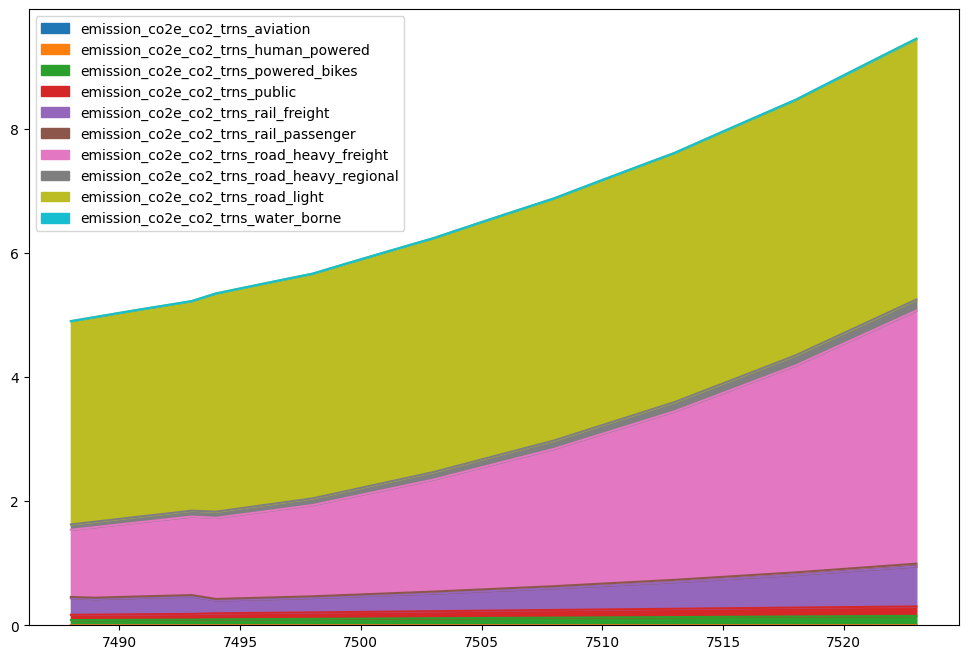

In [6]:
df_plot = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["guatemala"])
][[x for x in df_out.columns if x.startswith("emission_co2e_co2") and ("trns" in x)]]

fig, ax = plt.subplots(figsize = (12, 8))
df_plot.plot.area(ax = ax)

In [8]:
df_try = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["brazil"])
];

In [37]:
subsec = "Industrial Energy"
dict_repl = {
    "Carbon Capture and Sequestration": "CCSQ",
    "Stationary Combustion and Other Energy": "SCOE"
}

for subsec in ["Carbon Capture and Sequestration", "Industrial Energy", "Stationary Combustion and Other Energy", "Transportation"]:
    #sisepuede.model_attributes.get_standard_variables(
    #    df_try,
        #"Energy Demand by Fuel in Industrial Energy"
    #    "Energy Consumption from Transportation"
    #)
    
    snm = dict_repl.get(subsec, subsec)
    
    vl_1 = sisepuede.model_attributes.build_varlist(
        subsec, f"Energy Consumption from {snm}"
    )
    vl_2 = sisepuede.model_attributes.build_varlist(
        "Energy Fuels", f"Energy Demand by Fuel in {snm}"
    )
    
    print(subsec)
    print("-"*len(subsec) + "\n")
    
    str_print = " +\n".join(vl_1) + "\n = \n" + " +\n".join(vl_2) + "\n\n\n"
    
    print(str_print)



Carbon Capture and Sequestration
--------------------------------

energy_consumption_ccsq_direct_air_capture
 = 
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_furnace +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_petroleum_liquid +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gasoline +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_geothermal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydrogen +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_nat

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [8]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
71,1,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
107,2,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
143,1001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
179,2001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
215,3001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
251,3002,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
287,3003,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
323,3004,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
359,3005,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0


In [7]:
df_try

,future_id,time_period,strategy_id,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,0,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.625305,0.928300,2.714180,1.650240,4.404067,1.053567,5.752500,74.202600,16.945400,23.352171
1,0,1,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,18.450614,0.908800,1.923760,1.561520,4.602733,1.558033,5.464300,75.176300,17.112775,24.085471
2,0,2,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.820124,0.938300,2.034620,1.704260,5.412067,1.330933,6.213100,74.455900,17.432550,24.498743
3,0,3,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.747876,0.869200,2.256860,1.743060,5.181767,1.568433,6.307400,74.575900,17.414775,25.249429
4,0,4,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.682295,0.875600,1.987220,1.608520,5.488767,1.762200,6.063300,74.657000,17.579100,25.731600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,31,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,33.595444,1.494550,3.391959,2.745561,9.368702,3.007875,10.349365,127.431024,30.005528,43.920920
1256,0,32,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.267352,1.524441,3.459798,2.800472,9.556076,3.068033,10.556352,129.979644,30.605639,44.799338
1257,0,33,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.952699,1.554930,3.528994,2.856482,9.747197,3.129394,10.767479,132.579237,31.217751,45.695325
1258,0,34,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,35.651753,1.586028,3.599574,2.913611,9.942141,3.191981,10.982829,135.230822,31.842106,46.609232


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

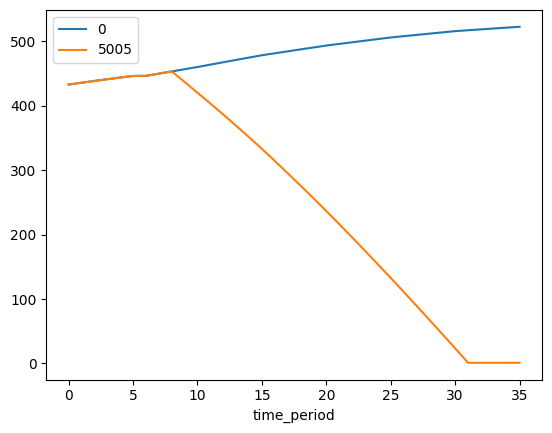

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [25]:
importlib.reload(sa)
importlib.reload(me)

model_energy = me.NonElectricEnergy(sa.model_attributes)
model_afolu = mafl.AFOLU(sa.model_attributes)
model_ippu = mi.IPPU(sa.model_attributes)
model_ce = mce.CircularEconomy(sa.model_attributes)


df_ins = df_input.copy()

# afolu
df_out_afolu = model_afolu.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_afolu,
    model_ce.integration_variables + model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# circular economy
df_out_ce = model_ce.project(df_ins)
df_ins = sa.model_attributes.transfer_df_variables(
    df_ins,
    df_out_ce,
    model_ippu.integration_variables + model_energy.integration_variables_non_fgtv
)

# ippu
if False:
    df_out_ippu = model_ippu.project(df_ins)
    df_ins = sa.model_attributes.transfer_df_variables(
        df_ins,
        df_out_ippu,
        model_energy.integration_variables_non_fgtv
    )

    df_out_energy = model_energy.project(df_ins)



In [95]:
#sa.model_attributes.get_subsector_variables("Carbon Capture and Sequestration")
subsec = "ccsq"

for subsec in ["ccsq", "scoe", "trns", "inen"]:
    check1 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if f"energy_demand_enfu_subsector_total_pj_{subsec}" in x]
    ].sum(axis = 1))

    check2 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
    ].sum(axis = 1))
    
    check3 = np.array(df_out_energy[
        [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" in x)]
    ].sum(axis = 1))
    
    print(f"subsec {subsec}:")
    print(check1 - check2)
    print(check1 - check3)
    print("")

subsec ccsq:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

subsec scoe:
[ 0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.27373675e-13
  0.00000000e+00 -2.27373675e-13 -2.27373675e-13  0.00000000e+00
 -2.27373675e-13  0.00000000e+00  0.00000000e+00  2.27373675e-13
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-2.27373675e-13 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  0.00000000e+00
  2.27373675e-13  2.27373675e-13  0

In [63]:
print(subsec)
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
].sum(axis = 1)

df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_consumption_{subsec}" in x) and ("total" not in x)]
]
df_out_energy[
    [x for x in df_out_energy.columns if (f"energy_demand_enfu_subsector_total_pj_{subsec}" in x)]
]

inen


,energy_demand_enfu_subsector_total_pj_inen_fuel_biofuels,energy_demand_enfu_subsector_total_pj_inen_fuel_biogas,energy_demand_enfu_subsector_total_pj_inen_fuel_biomass,energy_demand_enfu_subsector_total_pj_inen_fuel_coal,energy_demand_enfu_subsector_total_pj_inen_fuel_coke,energy_demand_enfu_subsector_total_pj_inen_fuel_diesel,energy_demand_enfu_subsector_total_pj_inen_fuel_electricity,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_furnace,energy_demand_enfu_subsector_total_pj_inen_fuel_gas_petroleum_liquid,energy_demand_enfu_subsector_total_pj_inen_fuel_gasoline,...,energy_demand_enfu_subsector_total_pj_inen_fuel_hydropower,energy_demand_enfu_subsector_total_pj_inen_fuel_kerosene,energy_demand_enfu_subsector_total_pj_inen_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_inen_fuel_nuclear,energy_demand_enfu_subsector_total_pj_inen_fuel_ocean,energy_demand_enfu_subsector_total_pj_inen_fuel_oil,energy_demand_enfu_subsector_total_pj_inen_fuel_other,energy_demand_enfu_subsector_total_pj_inen_fuel_solar,energy_demand_enfu_subsector_total_pj_inen_fuel_waste,energy_demand_enfu_subsector_total_pj_inen_fuel_wind
0,0.0,0.0,2392.550271,1156.498987,977.969437,1.795398,5660.577095,264.509709,0.126464,0.241881,...,0.0,0.0,7676.644206,0.0,0.0,6992.150941,0.0,25.121778,0.0,0.0
1,0.0,0.0,2390.047010,1155.288973,976.932265,1.802197,5654.652551,264.226550,0.126943,0.242797,...,0.0,0.0,7668.603903,0.0,0.0,6984.826270,0.0,25.095494,0.0,0.0
2,0.0,0.0,2387.535988,1154.075208,975.892071,1.801933,5648.705836,263.942613,0.126925,0.242762,...,0.0,0.0,7660.538798,0.0,0.0,6977.479001,0.0,25.069128,0.0,0.0
3,0.0,0.0,2385.017195,1152.857687,974.848951,1.807626,5642.744148,263.657947,0.127326,0.243529,...,0.0,0.0,7652.448915,0.0,0.0,6970.109206,0.0,25.042681,0.0,0.0
4,0.0,0.0,2382.490633,1151.636410,973.803042,1.810135,5636.762524,263.372617,0.127503,0.243867,...,0.0,0.0,7644.334349,0.0,0.0,6962.716958,0.0,25.016152,0.0,0.0
5,0.0,0.0,2379.956288,1150.411371,972.754439,1.848598,5630.782554,263.086672,0.130212,0.249049,...,0.0,0.0,7636.195115,0.0,0.0,6955.302400,0.0,24.989541,0.0,0.0
6,0.0,0.0,2389.686941,1155.114925,976.744397,1.888368,5653.827919,264.166795,0.133013,0.254407,...,0.0,0.0,7667.423370,0.0,0.0,6983.747337,0.0,25.091713,0.0,0.0
7,0.0,0.0,2399.293969,1159.758722,980.671442,1.929625,5676.575460,265.227176,0.135919,0.259965,...,0.0,0.0,7698.247286,0.0,0.0,7011.822795,0.0,25.192587,0.0,0.0
8,0.0,0.0,2408.786445,1164.347148,984.551620,1.972318,5699.052796,266.274868,0.138926,0.265717,...,0.0,0.0,7728.703626,0.0,0.0,7039.563453,0.0,25.292258,0.0,0.0
9,0.0,0.0,2418.167497,1168.881714,988.386211,2.016493,5721.267356,267.310219,0.142038,0.271668,...,0.0,0.0,7758.802431,0.0,0.0,7066.978456,0.0,25.390759,0.0,0.0


In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)



In [43]:
df_iar = sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)
df_oar = sq.sql_table_to_df(
    engine,
    "OutputActivityRatio"
    #"InputActivityRatio"
)
df_oar

,id,r,t,f,m,y,val
0,1,costa_rica,pp_biogas,fuel_electricity,generate,1000,1.0
1,2,costa_rica,pp_biogas,fuel_electricity,generate,1001,1.0
2,3,costa_rica,pp_biogas,fuel_electricity,generate,1002,1.0
3,4,costa_rica,pp_biogas,fuel_electricity,generate,1003,1.0
4,5,costa_rica,pp_biogas,fuel_electricity,generate,1004,1.0
...,...,...,...,...,...,...,...
967,968,costa_rica,supply_fuel_wind,fuel_wind,generate,1031,1.0
968,969,costa_rica,supply_fuel_wind,fuel_wind,generate,1032,1.0
969,970,costa_rica,supply_fuel_wind,fuel_wind,generate,1033,1.0
970,971,costa_rica,supply_fuel_wind,fuel_wind,generate,1034,1.0


In [2]:
sq.sql_table_to_df(
    engine,
    "FUELS"
    #"InputActivityRatio"
)

NameError: name 'sq' is not defined

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [9]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)
df_try.to_csv(
    os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
    encoding = "UTF-8",
    index = None
)

In [31]:
import inspect
sisepuede.odpt_primary.get_key_value(
    strategy_id = 3011,
    future_id = 0, 
    design_id = 0
)




15015

In [17]:
df_out[
    (df_out["region"] == "brazil") & 
    (df_out["time_period"].isin([4, 5])) & 
    (df_out["primary_id"].isin([0, 15015])) 
][
    [x for x in df_out.columns if ("emission_co2e" in x) and ("trns" in x)]
]


,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
940,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.122332,0.006572,1.316938,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.923724,0.047992,3.556169,0.000371,237.558203
941,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.120889,0.006596,1.322850,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.910773,0.048171,3.572172,0.000370,237.439346
1336,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.123489,0.006572,1.320636,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.935050,0.047992,3.565980,0.000371,238.819438
1337,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.122964,0.006596,1.327975,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.931073,0.048171,3.585797,0.000370,239.514858


In [25]:
df_check = df_out[
    df_out["region"].isin(["brazil"]) &
    df_out["primary_id"].isin([0])
].reset_index(drop = True)
df_check[[
    x for x in df_check.columns if ("regional" in x) and ("trde" in x)
]]


,dem_trde_regional_passenger_km
0,1.120458e+06
1,1.125540e+06
2,1.130507e+06
3,1.135304e+06
4,1.139856e+06
5,1.144110e+06
6,1.147918e+06
7,1.158527e+06
8,1.169114e+06
9,1.179678e+06


In [36]:
df_check[
    df_check["time_period"].isin([0, 2])
][[
    x for x in df_check.columns if ("emission" in x) and ("trns" in x)
]]

,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
0,4.865727e-09,0.0,1.978793e-08,0.000002,0.012289,0.000004,0.455738,0.000004,0.000005,0.000139,...,0.0,5.395002e-08,0.000012,0.828718,0.000241,1.586244,0.000032,0.000013,0.000389,95.992430
2,4.909364e-09,0.0,2.004421e-08,0.000002,0.012187,0.000004,0.087895,0.000004,0.000005,0.000138,...,0.0,5.464875e-08,0.000012,0.821786,0.000248,0.578974,0.000033,0.000013,0.000386,47.141113


In [54]:
flds = list(df_try2.columns)#[x for x in df_try2.columns if ("road_heavy_freight" in x)]
fld_check = []

for fld in flds:
    vec = np.array(df_try2[fld])
    v0, v2 = vec[0], vec[2]
    delta = np.abs(vec[2]/vec[0] - 1)
    
    if (delta > 0.05) and (("trns" in fld) or ("trde" in fld)):
        print(f"field '{fld}':\n\tv0:\t{v0}\n\tv2:\t{v2}\n")
        fld_check.append(fld)

field 'frac_trns_fuelmix_public_electricity':
	v0:	0.0014800197335964
	v2:	0.0009078529278256

field 'frac_trns_fuelmix_road_light_diesel':
	v0:	0.0273322508679524
	v2:	0.0291327470632048

field 'frac_trns_fuelmix_road_light_electricity':
	v0:	0.0002244135545786
	v2:	0.000431209084138

